# Data Preparation

## Streetlight Data Preparation

In [1]:
import pandas as pd
import numpy as np
import os
import urllib

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

1.Upload the downloaded data from https://data.cityofnewyork.us/Transportation/DOT-Street-Lights-and-Traffic-Signals-311-Service-/jwvp-gyiq

In [2]:
strlights = pd.read_csv('311_Service_Requests_from_2010_to_Present_20231114.csv')

In [3]:
strlights.head(20)

Unique Key            Created Date             Closed Date Agency  \
0     45184516  12/17/2019 01:58:00 PM  03/23/2023 08:00:00 AM    DOT   
1     45143120  12/12/2019 05:27:00 AM                     NaN    DOT   
2     39388010  06/06/2018 05:35:00 AM  10/17/2023 10:10:00 AM    DOT   
3     37830487  12/01/2017 03:22:00 PM                     NaN    DOT   
4     39890191  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
5     39890195  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
6     39899327  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
7     39893024  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
8     39893026  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
9     39893068  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
10    45071973  12/03/2019 10:24:00 PM  03/23/2023 07:59:00 AM    DOT   
11    39893664  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
12    39894297  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
13    39894298  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
14    41817271  02/26/2019 12:37:00 PM  08/25/2023 11:41:00 AM    DOT   
15    39894397  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
16    39894402  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
17    39894410  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
18    39894683  08/01/2018 12:00:00 AM  07/31/2022 12:00:00 AM    DOT   
19    53461320  02/24/2022 02:54:00 PM  04/07/2023 11:05:00 PM    DOT   

                     Agency Name            Complaint Type  \
0   Department of Transportation    Street Light Condition   
1   Department of Transportation    Street Light Condition   
2   Department of Transportation    Street Light Condition   
3   Department of Transportation    Street Light Condition   
4   Department of Transportation  Traffic Signal Condition   
5   Department of Transportation  Traffic Signal Condition   
6   Department of Transportation  Traffic Signal Condition   
7   Department of Transportation  Traffic Signal Condition   
8   Department of Transportation  Traffic Signal Condition   
9   Department of Transportation  Traffic Signal Condition   
10  Department of Transportation    Street Light Condition   
11  Department of Transportation  Traffic Signal Condition   
12  Department of Transportation  Traffic Signal Condition   
13  Department of Transportation  Traffic Signal Condition   
14  Department of Transportation    Street Light Condition   
15  Department of Transportation  Traffic Signal Condition   
16  Department of Transportation  Traffic Signal Condition   
17  Department of Transportation  Traffic Signal Condition   
18  Department of Transportation  Traffic Signal Condition   
19  Department of Transportation    Street Light Condition   

               Descriptor  Location Type  Incident Zip    Incident Address  \
0   Lamppost Knocked Down            NaN       11214.0           BELT PKWY   
1   Lamppost Knocked Down            NaN           NaN  GRAND CENTRAL PKWY   
2    Traffic Signal Light            NaN       10301.0                 NaN   
3   Lamppost Knocked Down            NaN           NaN              FDR DR   
4                   Cable            NaN       10019.0                 NaN   
5                   Cable            NaN       10065.0                 NaN   
6                   Cable            NaN       10463.0                 NaN   
7                   Cable            NaN       10009.0                 NaN   
8                   Cable            NaN       10010.0                 NaN   
9                   Cable            NaN       10016.0                 NaN   
10       Street Light Out            NaN       11235.0                 NaN   
11             In Conduit            NaN       10010.0                 NaN   
12                  Cable            NaN       10013.0                 NaN   
13                  Cable            NaN       10036.0                 NaN 

In [4]:
strlights.dtypes #get the column names with types

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                     float64
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                          float64
Facility Type                     float64
Status                             object
Due Date                          float64
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

Description:https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

In [5]:
strlights.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [6]:
strlights['Address Type'].unique()

array(['INTERSECTION', 'BLOCKFACE', 'PLACENAME', 'ADDRESS', nan],
      dtype=object)

In [7]:
strlights = strlights[strlights['Complaint Type'] == 'Street Light Condition']
strlights.shape

(1123871, 41)

2.Only keep needed columns

In [8]:
need_columns=['Unique Key', 'Created Date', 'Incident Zip','Incident Address','Street Name', 'Cross Street 1', 'Cross Street 2','Address Type','Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)','Latitude', 'Longitude', 'Location']
strlights_need = strlights[need_columns]
strlights_need.shape

(1123871, 16)

In [9]:
strlights_need.head()

Unique Key            Created Date  Incident Zip    Incident Address  \
0     45184516  12/17/2019 01:58:00 PM       11214.0           BELT PKWY   
1     45143120  12/12/2019 05:27:00 AM           NaN  GRAND CENTRAL PKWY   
2     39388010  06/06/2018 05:35:00 AM       10301.0                 NaN   
3     37830487  12/01/2017 03:22:00 PM           NaN              FDR DR   
10    45071973  12/03/2019 10:24:00 PM       11235.0                 NaN   

           Street Name    Cross Street 1          Cross Street 2  \
0            BELT PKWY       CROPSEY AVE  SAME AS FIRST CROSS ST   
1   GRAND CENTRAL PKWY     LONG ISL EXPY                     NaN   
2                  NaN  RICHMOND TERRACE            HAMILTON AVE   
3               FDR DR           23 ST E                 25 ST E   
10                 NaN               NaN                     NaN   

    Address Type        Community Board  BBL        Borough  \
0   INTERSECTION            13 BROOKLYN  NaN       BROOKLYN   
1      BLOCKFACE     Unspecified QUEENS  NaN         QUEENS   
2   INTERSECTION       01 STATEN ISLAND  NaN  STATEN ISLAND   
3      BLOCKFACE  Unspecified MANHATTAN  NaN      MANHATTAN   
10  INTERSECTION            15 BROOKLYN  NaN       BROOKLYN   

    X Coordinate (State Plane)  Y Coordinate (State Plane)   Latitude  \
0                     987728.0                    152530.0  40.585335   
1                          NaN                         NaN        NaN   
2                     962696.0                    174467.0  40.645522   
3                          NaN                         NaN        NaN   
10                    997211.0                    150323.0  40.579268   

    Longitude                                 Location  
0  -73.987478  (40.58533504641693, -73.98747829638602)  
1         NaN                                      NaN  
2  -74.077670  (40.64552202452313, -74.07767000848172)  
3         NaN                                      NaN  
10 -73.953341  (40.57926847608447, -73.95334126903937)

3.Drop empty values

In [10]:
columns_to_check = ['Latitude','Longitude','Location']
strlights_dropped = strlights_need.dropna(subset=columns_to_check)
strlights_dropped.shape

(685202, 16)

In [11]:
columns_to_check = ['Created Date']
strlights_dropped = strlights_dropped.dropna(subset=columns_to_check)
strlights_dropped.shape

(685202, 16)

In [12]:
columns_to_check = ['Unique Key']
strlights_dropped = strlights_dropped.drop_duplicates(subset=columns_to_check)
strlights_dropped.shape

(685202, 16)

In [13]:
strlights_dropped.head()

Unique Key            Created Date  Incident Zip Incident Address  \
0     45184516  12/17/2019 01:58:00 PM       11214.0        BELT PKWY   
2     39388010  06/06/2018 05:35:00 AM       10301.0              NaN   
10    45071973  12/03/2019 10:24:00 PM       11235.0              NaN   
14    41817271  02/26/2019 12:37:00 PM       10040.0              NaN   
21    40730521  11/02/2018 09:44:00 AM       11201.0              NaN   

   Street Name    Cross Street 1          Cross Street 2  Address Type  \
0    BELT PKWY       CROPSEY AVE  SAME AS FIRST CROSS ST  INTERSECTION   
2          NaN  RICHMOND TERRACE            HAMILTON AVE  INTERSECTION   
10         NaN               NaN                     NaN  INTERSECTION   
14         NaN         THAYER ST             SHERMAN AVE  INTERSECTION   
21         NaN       GALLATIN PL           LIVINGSTON ST  INTERSECTION   

     Community Board  BBL        Borough  X Coordinate (State Plane)  \
0        13 BROOKLYN  NaN       BROOKLYN                    987728.0   
2   01 STATEN ISLAND  NaN  STATEN ISLAND                    962696.0   
10       15 BROOKLYN  NaN       BROOKLYN                    997211.0   
14      12 MANHATTAN  NaN      MANHATTAN                   1004463.0   
21       02 BROOKLYN  NaN       BROOKLYN                    987827.0   

    Y Coordinate (State Plane)   Latitude  Longitude  \
0                     152530.0  40.585335 -73.987478   
2                     174467.0  40.645522 -74.077670   
10                    150323.0  40.579268 -73.953341   
14                    253787.0  40.863238 -73.926924   
21                    190722.0  40.690164 -73.987102   

                                    Location  
0    (40.58533504641693, -73.98747829638602)  
2    (40.64552202452313, -74.07767000848172)  
10   (40.57926847608447, -73.95334126903937)  
14   (40.86323822887115, -73.92692384541492)  
21  (40.690163882459025, -73.98710162412632)

In [14]:
strlights_convert = strlights_dropped
strlights_convert['Created Date'] = pd.to_datetime(strlights_convert['Created Date'],errors='coerce')
strlights_convert.shape

C:\Users\dspsh\AppData\Local\Temp\ipykernel_30484\3204948148.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  strlights_convert['Created Date'] = pd.to_datetime(strlights_convert['Created Date'],errors='coerce')


(685202, 16)

In [15]:
strlights_convert.head()

Unique Key        Created Date  Incident Zip Incident Address Street Name  \
0     45184516 2019-12-17 13:58:00       11214.0        BELT PKWY   BELT PKWY   
2     39388010 2018-06-06 05:35:00       10301.0              NaN         NaN   
10    45071973 2019-12-03 22:24:00       11235.0              NaN         NaN   
14    41817271 2019-02-26 12:37:00       10040.0              NaN         NaN   
21    40730521 2018-11-02 09:44:00       11201.0              NaN         NaN   

      Cross Street 1          Cross Street 2  Address Type   Community Board  \
0        CROPSEY AVE  SAME AS FIRST CROSS ST  INTERSECTION       13 BROOKLYN   
2   RICHMOND TERRACE            HAMILTON AVE  INTERSECTION  01 STATEN ISLAND   
10               NaN                     NaN  INTERSECTION       15 BROOKLYN   
14         THAYER ST             SHERMAN AVE  INTERSECTION      12 MANHATTAN   
21       GALLATIN PL           LIVINGSTON ST  INTERSECTION       02 BROOKLYN   

    BBL        Borough  X Coordinate (State Plane)  \
0   NaN       BROOKLYN                    987728.0   
2   NaN  STATEN ISLAND                    962696.0   
10  NaN       BROOKLYN                    997211.0   
14  NaN      MANHATTAN                   1004463.0   
21  NaN       BROOKLYN                    987827.0   

    Y Coordinate (State Plane)   Latitude  Longitude  \
0                     152530.0  40.585335 -73.987478   
2                     174467.0  40.645522 -74.077670   
10                    150323.0  40.579268 -73.953341   
14                    253787.0  40.863238 -73.926924   
21                    190722.0  40.690164 -73.987102   

                                    Location  
0    (40.58533504641693, -73.98747829638602)  
2    (40.64552202452313, -74.07767000848172)  
10   (40.57926847608447, -73.95334126903937)  
14   (40.86323822887115, -73.92692384541492)  
21  (40.690163882459025, -73.98710162412632)



4.Spatial check(with in NYC)

In [34]:
import os 
os.listdir('Data/ZIPCODE')

['ZIP_CODE_040114.dbf',
 'ZIP_CODE_040114.prj',
 'ZIP_CODE_040114.sbn',
 'ZIP_CODE_040114.sbx',
 'ZIP_CODE_040114.shp',
 'ZIP_CODE_040114.shp.xml',
 'ZIP_CODE_040114.shx']

In [35]:
zipcode = gpd.read_file('Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

<Axes: >

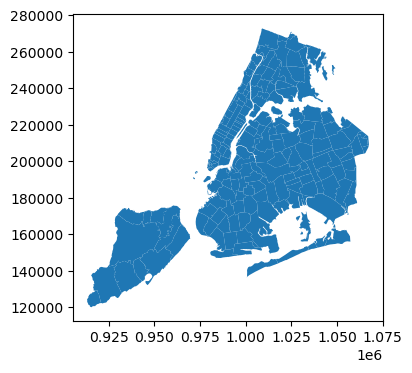

In [36]:
zipcode.plot(figsize=(4,4))

In [37]:
zipcode = zipcode.to_crs("EPSG:4326")

In [38]:
zipcode_gpd = gpd.GeoDataFrame(strlights_convert, geometry=gpd.points_from_xy(strlights_convert['Longitude'], strlights_convert['Latitude']), crs = 'EPSG:4326')

In [39]:
strlights_nyc = gpd.sjoin(zipcode_gpd, zipcode[zipcode['COUNTY'].isin(['New York', 'Kings', 'Bronx', 'Queens', 'Richmond'])], how='inner', op='within')
strlights_nyc

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Unique Key        Created Date  Incident Zip        Incident Address  \
0          45184516 2019-12-17 13:58:00       11214.0               BELT PKWY   
43         45075689 2019-12-03 11:12:00       11214.0               BELT PKWY   
995        56133192 2022-12-01 11:17:00       11214.0                     NaN   
998        56830969 2023-02-17 19:52:00       11214.0                     NaN   
1121       58457920 2023-08-09 20:25:00       11204.0  1749 BAY RIDGE PARKWAY   
...             ...                 ...           ...                     ...   
595761     25497289 2013-05-07 21:07:00       10017.0         200 PARK AVENUE   
1108012    35728693 2017-03-17 21:15:00       10004.0      200 LIBERTY ISLAND   
1456702    46086078 2020-04-28 14:34:00       10004.0       33 LIBERTY ISLAND   
1584717    51935115 2021-09-20 22:06:00       10035.0    RANDALLS ISLAND PARK   
1600289    52637601 2021-11-27 21:58:00       10035.0          TRIBORO BRIDGE   

                  Street Name     Cross Street 1          Cross Street 2  \
0                   BELT PKWY        CROPSEY AVE  SAME AS FIRST CROSS ST   
43                  BELT PKWY             27 AVE                     NaN   
995                       NaN                NaN                     NaN   
998                       NaN                NaN                     NaN   
1121        BAY RIDGE PARKWAY             17 AVE                  18 AVE   
...                       ...                ...                     ...   
595761            PARK AVENUE  VANDERBILT AVENUE             PARK AVENUE   
1108012        LIBERTY ISLAND          NONAME ST              UNNAMED ST   
1456702        LIBERTY ISLAND          NONAME ST              UNNAMED ST   
1584717  RANDALLS ISLAND PARK         EAST RIVER            HARLEM RIVER   
1600289        TRIBORO BRIDGE          NONAME ST                     NaN   

         Address Type        Community Board           BBL  ...   PO_NAME  \
0        INTERSECTION            13 BROOKLYN           NaN  ...  Brooklyn   
43       INTERSECTION            13 BROOKLYN           NaN  ...  Brooklyn   
995      INTERSECTION            11 BROOKLYN           NaN  ...  Brooklyn   
998      INTERSECTION            11 BROOKLYN           NaN  ...  Brooklyn   
1121     INTERSECTION            11 BROOKLYN  3.062150e+09  ...  Brooklyn   
...               ...                    ...           ...  ...       ...   
595761   INTERSECTION  Unspecified MANHATTAN  1.012809e+09  ...  New York   
1108012       ADDRESS           01 MANHATTAN  1.000010e+09  ...  New York   
1456702       ADDRESS           01 MANHATTAN  1.000010e+09  ...  New York   
1584717     PLACENAME           11 MANHATTAN  1.018190e+09  ...  New York   
1600289  INTERSECTION           11 MANHATTAN  1.018190e+09  ...  New York   

         POPULATION          AREA  STATE    COUNTY ST_FIPS CTY_FIPS  \
0           89061.0  6.109654e+07     NY     Kings      36      047   
43          89061.0  6.109654e+07     NY     Kings      36      047   
995         89061.0  6.109654e+07     NY     Kings      36      047   
998         89061.0  6.109654e+07     NY     Kings      36      047   
1121        89061.0  6.109654e+07     NY     Kings      36      047   
...             ...           ...    ...       ...     ...      ...   
595761          0.0  1.104386e+05     NY  New York      36      061   
1108012      2187.0  6.707080e+05     NY  New York      36      061   
1456702      2187.0  6.707080e+05     NY  New York      36      061   
1584717     34884.0  2.349487e+07     NY  New York      36      061   
1600289     34884.0  2.349487e+07     NY  New York      36      061   

                          URL SHAPE_AREA SHAPE_LEN  
0        http://www.usps.com/        0.0       0.0  
43       http://www.usps.com/        0.0       0.0  
995      http://www.usps.com/        0.0       0.0  
998      http://www.usps.com/        0.0       0.0  
1121     http://www.usps.com/        0.0       0.0  
...                       .

In [40]:
strlights_nyc.describe()

Unique Key                   Created Date   Incident Zip  \
count  6.846590e+05                         684659  684399.000000   
mean   3.463147e+07  2016-05-26 00:22:51.419582208   10969.370022   
min    1.563103e+07            2010-01-01 00:46:00   10000.000000   
25%    2.467937e+07            2012-12-28 12:50:00   10464.000000   
50%    3.271335e+07            2016-02-17 19:51:00   11214.000000   
75%    4.358565e+07            2019-08-19 12:20:00   11367.000000   
max    5.941072e+07            2023-11-13 00:03:00   11697.000000   
std    1.209825e+07                            NaN     484.801892   

                BBL  X Coordinate (State Plane)  Y Coordinate (State Plane)  \
count  1.329260e+05                6.846590e+05               684659.000000   
mean   3.254598e+09                1.007916e+06               198136.895625   
min    0.000000e+00                9.133530e+05               121152.000000   
25%    2.057840e+09                9.902465e+05               176527.000000   
50%    3.062730e+09                1.010966e+06               195445.000000   
75%    4.073110e+09                1.028814e+06               217476.000000   
max    5.270001e+09                1.067220e+06               271730.000000   
std    1.100804e+09                3.023984e+04                31754.472299   

            Latitude      Longitude    index_right     POPULATION  \
count  684659.000000  684659.000000  684659.000000  684659.000000   
mean       40.710433     -73.914559     102.132946   54753.710162   
min        40.498949     -74.254952       0.000000       0.000000   
25%        40.651150     -73.978386      45.000000   35473.000000   
50%        40.703046     -73.903566     111.000000   53404.000000   
75%        40.763497     -73.839059     149.000000   76104.000000   
max        40.912468     -73.700597     260.000000  109069.000000   
std         0.087153       0.109031      60.932689   25337.813878   

               AREA  SHAPE_AREA  SHAPE_LEN  
count  6.846590e+05    684659.0   684659.0  
mean   6.641346e+07         0.0        0.0  
min    7.172012e+04         0.0        0.0  
25%    3.515567e+07         0.0        0.0  
50%    5.016352e+07         0.0        0.0  
75%    7.183239e+07         0.0        0.0  
max    4.739857e+08         0.0        0.0  
std    6.989843e+07         0.0        0.0

In [41]:
strlights_nyc.columns

Index(['Unique Key', 'Created Date', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Latitude', 'Longitude', 'Location',
       'geometry', 'index_right', 'ZIPCODE', 'BLDGZIP', 'PO_NAME',
       'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL',
       'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [76]:
need_columns=['Unique Key', 'Created Date', 'ZIPCODE']
strlights_nyc_need = strlights_nyc[need_columns]

In [77]:
strlights_nyc_need

Unique Key        Created Date ZIPCODE
0          45184516 2019-12-17 13:58:00   11214
43         45075689 2019-12-03 11:12:00   11214
995        56133192 2022-12-01 11:17:00   11214
998        56830969 2023-02-17 19:52:00   11214
1121       58457920 2023-08-09 20:25:00   11214
...             ...                 ...     ...
595761     25497289 2013-05-07 21:07:00   10166
1108012    35728693 2017-03-17 21:15:00   10004
1456702    46086078 2020-04-28 14:34:00   10004
1584717    51935115 2021-09-20 22:06:00   10035
1600289    52637601 2021-11-27 21:58:00   10035

[684659 rows x 3 columns]

In [78]:
strlights_nyc_need.to_csv('strlights_nyc_need.csv')

5.Unify format as index=zipcode, columns=2018-2021

In [79]:
strlights_tm = strlights_nyc_need

In [80]:
strlights_tm['Year'] = strlights_tm['Created Date'].dt.year

C:\Users\dspsh\AppData\Local\Temp\ipykernel_30484\1547250467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strlights_tm['Year'] = strlights_tm['Created Date'].dt.year


In [81]:
strlights_tm = strlights_tm[(strlights_tm['Year'] >= 2018) & (strlights_tm['Year'] <= 2021)]

6.Turn original zipcodes to modified ZCTAs

Using Modified Zip Code Tabulation Areas (MODZCTA): A shapefile for mapping data by Modified Zip Code Tabulation Areas (MODZCTA) in NYC, based on the 2010 Census ZCTA shapefile. MODZCTA are being used by the NYC Department of Health & Mental Hygiene (DOHMH) for mapping COVID-19 Data.


Columns (Fields, Attributes):


MODZCTA: Modified ZIP Code tabulation area (ZCTA). Use this field for data joins. 


label: Contains a comma-delimited list of all known populated zip codes corresponding to the modified ZCTA geometry


ZCTA: Contains the Census ZCTAs that were combined to form the MODZCTA area, as a comma-delimited list.


pop_est: DOHMH population estimate for each MODZCTA, aggregated from the 2018 American Community Survey (ACS) 5-year population estimates for each ZCTA.


In [93]:
MODZCTA = pd.read_csv('https://data.cityofnewyork.us/resource/pri4-ifjk.csv')
MODZCTA.head()

modzcta         label                 zcta  pop_est  \
0    10001  10001, 10118  10001, 10119, 10199    23072   
1    10002         10002                10002    74993   
2    10003         10003                10003    54682   
3    10026         10026                10026    39363   
4    10004         10004                10004     3028   

                                            the_geom  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1  MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2  MULTIPOLYGON (((-73.98863576728334 40.72293099...  
3  MULTIPOLYGON (((-73.96200720826798 40.80550908...  
4  MULTIPOLYGON (((-74.00826694529984 40.70771979...

In [94]:
MODZCTA['zcta'] = MODZCTA['zcta'].str.split(', ')
MODZCTA = MODZCTA.explode('zcta')
MODZCTA.head()

modzcta         label   zcta  pop_est  \
0    10001  10001, 10118  10001    23072   
0    10001  10001, 10118  10119    23072   
0    10001  10001, 10118  10199    23072   
1    10002         10002  10002    74993   
2    10003         10003  10003    54682   

                                            the_geom  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1  MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2  MULTIPOLYGON (((-73.98863576728334 40.72293099...

In [101]:
mapping_series = MODZCTA.set_index('zcta')['modzcta']

strlights_tm['MODZCTA'] = strlights_tm['ZIPCODE'].map(mapping_series)
strlights_tm = strlights_tm.sort_values(by='MODZCTA')
strlights_tm.shape

(161682, 5)

In [100]:
strlights_MODZCTA = strlights_tm.dropna()
strlights_MODZCTA

Unique Key        Created Date ZIPCODE  Year  MODZCTA
13408      43768341 2019-09-12 01:01:00   10001  2019  10001.0
1595141    52414281 2021-11-04 08:38:00   10001  2021  10001.0
1595037    52410585 2021-11-03 08:16:00   10001  2021  10001.0
1594979    52408297 2021-11-03 18:22:00   10001  2021  10001.0
1599741    52606521 2021-11-23 18:52:00   10001  2021  10001.0
...             ...                 ...     ...   ...      ...
1354283    42297229 2019-04-23 13:45:00   11697  2019  11697.0
1350776    42197890 2019-04-11 14:39:00   11697  2019  11697.0
1347752    42123994 2019-04-02 11:27:00   11697  2019  11697.0
1243734    39068315 2018-04-30 09:58:00   11697  2018  11697.0
1310335    41072108 2018-11-30 19:17:00   11697  2018  11697.0

[160959 rows x 5 columns]

In [102]:
strlights_grp = strlights_MODZCTA.groupby(['MODZCTA','Year']).\
            agg({'Unique Key':'count'}).\
            reset_index()

In [104]:
strlights_cleaned = strlights_grp.pivot_table(index='MODZCTA', columns='Year', values='Unique Key', fill_value=0)
strlights_cleaned

Year      2018   2019   2020   2021
MODZCTA                            
10001.0   20.0   14.0   11.0   58.0
10002.0  285.0  318.0  327.0  410.0
10003.0   25.0   28.0   31.0   72.0
10004.0   52.0   39.0   52.0   58.0
10005.0   31.0   20.0   31.0   30.0
...        ...    ...    ...    ...
11691.0  375.0  233.0  328.0  293.0
11692.0  187.0  187.0  175.0  123.0
11693.0  175.0  137.0  145.0  144.0
11694.0  304.0  316.0  353.0  296.0
11697.0   19.0   23.0   30.0   23.0

[177 rows x 4 columns]

In [106]:
strlights_cleaned.to_csv('strlights_cleaned.csv')

## Population Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def f(x):
    return str(x)[6:]

In [ ]:
def f_nyzcta(x):
    return str(x)[4:]

In [ ]:
ny_zcta_df = pd.read_csv("/content/drive/MyDrive/zcta total.csv", names=["zcta", "number"], usecols=[0, 1])
ny_zcta_df["zcta"] = ny_zcta_df["zcta"].apply(f_nyzcta)
ny_zcta_df.head()

zcta  number
0  10001       1
1  10002       2
2  10003       3
3  10004       4
4  10005       5

In [ ]:
dfList = []
years = [2018, 2019, 2020, 2021]
for year in years:
        filename = "/content/drive/MyDrive/ACSDP5Y" + str(year) + ".DP05-Data.csv"
        # filename = "ACSDP5Y" + str(year) + ".DP05-Data.csv"
        if year == 2018:
            df = pd.read_csv(filename, index_col=None, usecols=["NAME", "DP05_0001E"], skiprows=[1])
        else:
            df = pd.read_csv(filename, index_col=None, usecols=["NAME", "DP05_0001E"], skiprows=[1], header=0)

        df.drop_duplicates(subset=["NAME"], inplace=True)


        df["zcta"] = df["NAME"].apply(f)
        df.drop(columns=["NAME"], inplace=True)

        df = df[df["zcta"].isin(ny_zcta_df["zcta"])]


        df.set_index(keys="zcta", inplace=True)

        df.rename(columns={"DP05_0001E": "Total_Population"}, inplace=True)

        dfList.append(df)

df = pd.concat(dfList, axis=1, ignore_index=False, keys=years)

In [ ]:
df.head()

2018             2019             2020             2021
      Total_Population Total_Population Total_Population Total_Population
zcta                                                                     
10001            22924            24117            25026            26966
10002            74993            74479            74363            76807
10003            54682            53977            54671            54447
10004             3028             3335             3310             4795
10005             8831             8701             8664             8637

In [ ]:
df.columns = df.columns.droplevel(1)

In [ ]:
df = df.sort_values(by="zcta")

In [ ]:
df

2018   2019   2020   2021
zcta                             
10001  22924  24117  25026  26966
10002  74993  74479  74363  76807
10003  54682  53977  54671  54447
10004   3028   3335   3310   4795
10005   8831   8701   8664   8637
...      ...    ...    ...    ...
11691  67094  68543  68454  70797
11692  20991  22074  22394  24639
11693  12919  12944  13029  14147
11694  21354  21202  21258  22432
11697   3540   3674   3527   3782

[177 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 10001 to 11697
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2018    177 non-null    int64
 1   2019    177 non-null    int64
 2   2020    177 non-null    int64
 3   2021    177 non-null    int64
dtypes: int64(4)
memory usage: 6.9+ KB


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 10001 to 11697
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2018    177 non-null    int64
 1   2019    177 non-null    int64
 2   2020    177 non-null    int64
 3   2021    177 non-null    int64
dtypes: int64(4)
memory usage: 6.9+ KB


In [ ]:
df

2018   2019   2020   2021
zcta                             
10001  22924  24117  25026  26966
10002  74993  74479  74363  76807
10003  54682  53977  54671  54447
10004   3028   3335   3310   4795
10005   8831   8701   8664   8637
...      ...    ...    ...    ...
11691  67094  68543  68454  70797
11692  20991  22074  22394  24639
11693  12919  12944  13029  14147
11694  21354  21202  21258  22432
11697   3540   3674   3527   3782

[177 rows x 4 columns]

## Crime Data Preparation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

In [3]:
#import urllib.request
#urllib.request.urlretrieve ("https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD", 
                            #"NYPD_data.csv")

In [4]:
data = pd.read_csv('NYPD_data.csv')
data.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  ADDR_PCT_CD  \
0   10600119   01/01/2002     11:00:00   02/25/2006     11:00:00          NaN   
1   11052575   04/22/2005     02:00:00          NaN       (null)          NaN   
2   10832306   07/11/2005     20:00:00   03/29/2006     12:00:00          NaN   
3   10107192   10/19/2005     20:30:00          NaN       (null)          NaN   
4   23893731   12/04/2005     09:00:00   08/09/2006     17:00:00          NaN   

       RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ... SUSP_SEX  \
0  03/06/2006    104                            RAPE  157.0  ...        M   
1  04/22/2006    110  GRAND LARCENY OF MOTOR VEHICLE  441.0  ...   (null)   
2  03/29/2006    353   UNAUTHORIZED USE OF A VEHICLE  462.0  ...        M   
3  01/13/2006    126         MISCELLANEOUS PENAL LAW  461.0  ...        F   
4  08/09/2006    109                   GRAND LARCENY  405.0  ...   (null)   

  TRANSIT_DISTRICT Latitude Longitude Lat_Lon PATROL_BORO STATION_NAME  \
0              NaN      NaN       NaN     NaN      (null)       (null)   
1              NaN      NaN       NaN     NaN      (null)       (null)   
2              NaN      NaN       NaN     NaN      (null)       (null)   
3              NaN      NaN       NaN     NaN      (null)       (null)   
4              NaN      NaN       NaN     NaN      (null)       (null)   

   VIC_AGE_GROUP VIC_RACE VIC_SEX  
0          18-24    WHITE       F  
1          25-44    BLACK       M  
2          45-64    WHITE       M  
3          25-44    BLACK       F  
4          25-44    WHITE       F  

[5 rows x 35 columns]

In [5]:
data = data.replace('(null)', np.nan)

In [6]:
data.shape

(8353049, 35)

In [7]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [8]:
data = data[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude', 'Longitude']]

In [9]:
data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
0         10600119   01/01/2002     11:00:00                            RAPE   
1         11052575   04/22/2005     02:00:00  GRAND LARCENY OF MOTOR VEHICLE   
2         10832306   07/11/2005     20:00:00   UNAUTHORIZED USE OF A VEHICLE   
3         10107192   10/19/2005     20:30:00         MISCELLANEOUS PENAL LAW   
4         23893731   12/04/2005     09:00:00                   GRAND LARCENY   
...            ...          ...          ...                             ...   
8353044  261171983   12/30/2022     12:31:00                   PETIT LARCENY   
8353045  261175492   12/31/2022     11:56:00  OFFENSES AGAINST PUBLIC ADMINI   
8353046  261147482   12/30/2022     17:20:00    ASSAULT 3 & RELATED OFFENSES   
8353047  261179651   12/31/2022     20:20:00        VEHICLE AND TRAFFIC LAWS   
8353048  261157928   12/31/2022     04:00:00                  FELONY ASSAULT   

           BORO_NM   Latitude  Longitude  
0        MANHATTAN        NaN        NaN  
1            BRONX        NaN        NaN  
2         BROOKLYN        NaN        NaN  
3            BRONX        NaN        NaN  
4            BRONX        NaN        NaN  
...            ...        ...        ...  
8353044     QUEENS  40.675259 -73.854501  
8353045      BRONX  40.829632 -73.915209  
8353046  MANHATTAN  40.761265 -73.968887  
8353047     QUEENS  40.725681 -73.857270  
8353048      BRONX  40.870942 -73.891499  

[8353049 rows x 7 columns]

In [10]:
data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], how='any', inplace=True)

In [11]:
data.dropna(subset=['Latitude', 'Longitude'], how='any', inplace=True)

In [12]:
data = data.dropna(subset=['BORO_NM'])

In [13]:
data = data.drop_duplicates(subset=['CMPLNT_NUM'])

In [14]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')


earliest_date = data['CMPLNT_FR_DT'].min()
latest_date = data['CMPLNT_FR_DT'].max()

print("earliest_date:", earliest_date)
print("latest_date:", latest_date)

earliest_date: 1900-03-10 00:00:00
latest_date: 2022-12-31 00:00:00


In [15]:
data = data[(data['CMPLNT_FR_DT'].dt.year >= 2018) & (data['CMPLNT_FR_DT'].dt.year < 2022)]

In [16]:
earliest_date = data['CMPLNT_FR_DT'].min()
latest_date = data['CMPLNT_FR_DT'].max()

print("earliest_date:", earliest_date)
print("latest_date:", latest_date)

earliest_date: 2018-01-01 00:00:00
latest_date: 2021-12-31 00:00:00


In [17]:
import os 
os.listdir('./Data/ZIPCODE')

['ZIP_CODE_040114.dbf',
 'ZIP_CODE_040114.prj',
 'ZIP_CODE_040114.sbn',
 'ZIP_CODE_040114.sbx',
 'ZIP_CODE_040114.shp',
 'ZIP_CODE_040114.shp.xml',
 'ZIP_CODE_040114.shx']

In [18]:
zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

In [19]:
zipcode.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<Axes: >

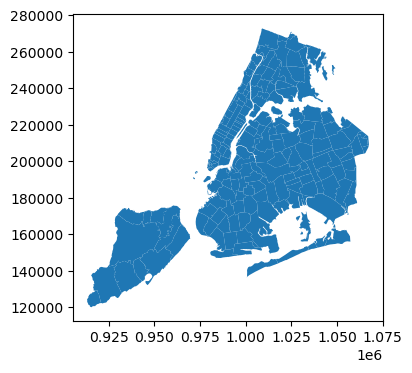

In [20]:
zipcode.plot(figsize=(4,4))

In [21]:
zipcode = zipcode.to_crs("EPSG:4326")

In [22]:
zipcode_gpd = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']), crs = 'EPSG:4326')

In [23]:
data_nyc = gpd.sjoin(zipcode_gpd, zipcode[zipcode['COUNTY'].isin(['New York', 'Kings', 'Bronx', 'Queens', 'Richmond'])], how='inner', op='within')

In [24]:
data_nyc

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                      OFNS_DESC  \
74       183871546   2018-06-15     05:04:00                           RAPE   
6039111  173152377   2018-01-01     07:00:00                     SEX CRIMES   
6039827  173148085   2018-01-01     10:00:00                        ROBBERY   
6041333  227857868   2018-01-01     01:00:00                     SEX CRIMES   
6041734  173142429   2018-01-01     00:01:00    OFFENSES AGAINST THE PERSON   
...            ...          ...          ...                            ...   
7797991  238365917   2021-12-07     09:00:00                  GRAND LARCENY   
7803750  237499008   2021-12-07     20:45:00   ASSAULT 3 & RELATED OFFENSES   
7593098  230732831   2021-07-04     15:00:00  OFF. AGNST PUB ORD SENSBLTY &   
7728628  234962272   2021-10-13     16:30:00                  HARRASSMENT 2   
7777498  236711590   2021-11-21     14:19:00  OFF. AGNST PUB ORD SENSBLTY &   

           BORO_NM   Latitude  Longitude                    geometry  \
74        BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6039111   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6039827   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6041333   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6041734   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
...            ...        ...        ...                         ...   
7797991     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)   
7803750     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)   
7593098     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)   
7728628     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)   
7777498  MANHATTAN  40.690934 -74.020666  POINT (-74.02067 40.69093)   

         index_right ZIPCODE  ...   PO_NAME POPULATION          AREA  STATE  \
74                 3   11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6039111            3   11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6039827            3   11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6041333            3   11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6041734            3   11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
...              ...     ...  ...       ...        ...           ...    ...   
7797991          144   11096  ...    Inwood      147.0  1.119737e+05     NY   
7803750          144   11096  ...    Inwood      147.0  1.119737e+05     NY   
7593098          194   11370  ...     Bronx    40591.0  1.819021e+07     NY   
7728628          194   11370  ...     Bronx    40591.0  1.819021e+07     NY   
7777498          113   10004  ...  New York     2187.0  7.679616e+06     NY   

           COUNTY ST_FIPS CTY_FIPS                   URL SHAPE_AREA  SHAPE_LEN  
74          Kings      36      047  http://www.usps.com/        0.0        0.0  
6039111     Kings      36      047  http://www.usps.com/        0.0        0.0  
6039827     Kings      36      047  http://www.usps.com/        0.0        0.0  
6041333     Kings      36      047  http://www.usps.com/        0.0        0.0  
6041734     Kings      36      047  http://www.usps.com/        0.0        0.0  
...           ...     ...      ...                   ...        ...        ...  
7797991    Queens      36      081  http://www.usps.com/        0.0        0.0  
7803750    Queens      36      081  http://www.usps.com/        0.0        0.0  
7593098     Bronx      36      005  http://www.usps.com/        0.0        0.0  
7728628     Bronx      36      005  http://www.usps.com/        0.0        0.0  
7777498  New York      36      061  http://www.usps.com/        0.0        0.0  

[1782652 rows x 21 columns]

In [25]:
data_nyc['ZIPCODE'] = data_nyc['ZIPCODE'].astype(int)
data_nyc = data_nyc[data_nyc['ZIPCODE'] > 9999]

In [26]:
data_nyc

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                      OFNS_DESC  \
74       183871546   2018-06-15     05:04:00                           RAPE   
6039111  173152377   2018-01-01     07:00:00                     SEX CRIMES   
6039827  173148085   2018-01-01     10:00:00                        ROBBERY   
6041333  227857868   2018-01-01     01:00:00                     SEX CRIMES   
6041734  173142429   2018-01-01     00:01:00    OFFENSES AGAINST THE PERSON   
...            ...          ...          ...                            ...   
7797991  238365917   2021-12-07     09:00:00                  GRAND LARCENY   
7803750  237499008   2021-12-07     20:45:00   ASSAULT 3 & RELATED OFFENSES   
7593098  230732831   2021-07-04     15:00:00  OFF. AGNST PUB ORD SENSBLTY &   
7728628  234962272   2021-10-13     16:30:00                  HARRASSMENT 2   
7777498  236711590   2021-11-21     14:19:00  OFF. AGNST PUB ORD SENSBLTY &   

           BORO_NM   Latitude  Longitude                    geometry  \
74        BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6039111   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6039827   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6041333   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
6041734   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)   
...            ...        ...        ...                         ...   
7797991     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)   
7803750     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)   
7593098     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)   
7728628     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)   
7777498  MANHATTAN  40.690934 -74.020666  POINT (-74.02067 40.69093)   

         index_right  ZIPCODE  ...   PO_NAME POPULATION          AREA  STATE  \
74                 3    11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6039111            3    11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6039827            3    11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6041333            3    11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
6041734            3    11225  ...  Brooklyn    56527.0  2.369863e+07     NY   
...              ...      ...  ...       ...        ...           ...    ...   
7797991          144    11096  ...    Inwood      147.0  1.119737e+05     NY   
7803750          144    11096  ...    Inwood      147.0  1.119737e+05     NY   
7593098          194    11370  ...     Bronx    40591.0  1.819021e+07     NY   
7728628          194    11370  ...     Bronx    40591.0  1.819021e+07     NY   
7777498          113    10004  ...  New York     2187.0  7.679616e+06     NY   

           COUNTY ST_FIPS CTY_FIPS                   URL SHAPE_AREA  SHAPE_LEN  
74          Kings      36      047  http://www.usps.com/        0.0        0.0  
6039111     Kings      36      047  http://www.usps.com/        0.0        0.0  
6039827     Kings      36      047  http://www.usps.com/        0.0        0.0  
6041333     Kings      36      047  http://www.usps.com/        0.0        0.0  
6041734     Kings      36      047  http://www.usps.com/        0.0        0.0  
...           ...     ...      ...                   ...        ...        ...  
7797991    Queens      36      081  http://www.usps.com/        0.0        0.0  
7803750    Queens      36      081  http://www.usps.com/        0.0        0.0  
7593098     Bronx      36      005  http://www.usps.com/        0.0        0.0  
7728628     Bronx      36      005  http://www.usps.com/        0.0        0.0  
7777498  New York      36      061  http://www.usps.com/        0.0        0.0  

[1781531 rows x 21 columns]

In [27]:
data_nyc = data_nyc[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude', 'Longitude', 'geometry' ,'ZIPCODE']]

In [28]:
#desired_columns = ['CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude' , 'Longitude', 'geometry' ,'ZIPCODE']
#new_data_nyc_selected = new_data_nyc[desired_columns]

In [29]:
data_nyc

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                      OFNS_DESC  \
74       183871546   2018-06-15     05:04:00                           RAPE   
6039111  173152377   2018-01-01     07:00:00                     SEX CRIMES   
6039827  173148085   2018-01-01     10:00:00                        ROBBERY   
6041333  227857868   2018-01-01     01:00:00                     SEX CRIMES   
6041734  173142429   2018-01-01     00:01:00    OFFENSES AGAINST THE PERSON   
...            ...          ...          ...                            ...   
7797991  238365917   2021-12-07     09:00:00                  GRAND LARCENY   
7803750  237499008   2021-12-07     20:45:00   ASSAULT 3 & RELATED OFFENSES   
7593098  230732831   2021-07-04     15:00:00  OFF. AGNST PUB ORD SENSBLTY &   
7728628  234962272   2021-10-13     16:30:00                  HARRASSMENT 2   
7777498  236711590   2021-11-21     14:19:00  OFF. AGNST PUB ORD SENSBLTY &   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  
74        BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225  
6039111   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225  
6039827   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225  
6041333   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225  
6041734   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225  
...            ...        ...        ...                         ...      ...  
7797991     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)    11096  
7803750     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)    11096  
7593098     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370  
7728628     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370  
7777498  MANHATTAN  40.690934 -74.020666  POINT (-74.02067 40.69093)    10004  

[1781531 rows x 9 columns]

In [30]:
#new_data_nyc_selected.to_csv('new_data_nyc_selected.csv')

In [31]:
data_nyc['Year'] = data_nyc['CMPLNT_FR_DT'].dt.year

In [32]:
data_nyc

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                      OFNS_DESC  \
74       183871546   2018-06-15     05:04:00                           RAPE   
6039111  173152377   2018-01-01     07:00:00                     SEX CRIMES   
6039827  173148085   2018-01-01     10:00:00                        ROBBERY   
6041333  227857868   2018-01-01     01:00:00                     SEX CRIMES   
6041734  173142429   2018-01-01     00:01:00    OFFENSES AGAINST THE PERSON   
...            ...          ...          ...                            ...   
7797991  238365917   2021-12-07     09:00:00                  GRAND LARCENY   
7803750  237499008   2021-12-07     20:45:00   ASSAULT 3 & RELATED OFFENSES   
7593098  230732831   2021-07-04     15:00:00  OFF. AGNST PUB ORD SENSBLTY &   
7728628  234962272   2021-10-13     16:30:00                  HARRASSMENT 2   
7777498  236711590   2021-11-21     14:19:00  OFF. AGNST PUB ORD SENSBLTY &   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  \
74        BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6039111   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6039827   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6041333   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6041734   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
...            ...        ...        ...                         ...      ...   
7797991     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)    11096   
7803750     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)    11096   
7593098     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370   
7728628     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370   
7777498  MANHATTAN  40.690934 -74.020666  POINT (-74.02067 40.69093)    10004   

         Year  
74       2018  
6039111  2018  
6039827  2018  
6041333  2018  
6041734  2018  
...       ...  
7797991  2021  
7803750  2021  
7593098  2021  
7728628  2021  
7777498  2021  

[1781531 rows x 10 columns]

In [33]:
crimedata_zipcode_year = data_nyc.groupby(['ZIPCODE', 'Year']).size().unstack(fill_value=0)

In [34]:
crimedata_zipcode_year

Year     2018  2019  2020  2021
ZIPCODE                        
10001     183   166   264  4920
10002    4048  4211  3875  6182
10003    4966  4893  4164  3667
10004       1     8     4   260
10005       0     4    18   432
...       ...   ...   ...   ...
11691    4434  4460  4385  4021
11692      14    28    79   927
11693    2415  2744  2497  1080
11694       2     4    35   609
11697       0     0     6    46

[193 rows x 4 columns]

In [35]:
crimedata_zipcode_year.to_csv("NYC_Crime_Data_zipcode_year.csv", index = True)

In [36]:
MODZCTA = pd.read_csv('https://data.cityofnewyork.us/resource/pri4-ifjk.csv')
MODZCTA.head()

modzcta         label                 zcta  pop_est  \
0    10001  10001, 10118  10001, 10119, 10199    23072   
1    10002         10002                10002    74993   
2    10003         10003                10003    54682   
3    10026         10026                10026    39363   
4    10004         10004                10004     3028   

                                            the_geom  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1  MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2  MULTIPOLYGON (((-73.98863576728334 40.72293099...  
3  MULTIPOLYGON (((-73.96200720826798 40.80550908...  
4  MULTIPOLYGON (((-74.00826694529984 40.70771979...

In [37]:
MODZCTA['zcta'] = MODZCTA['zcta'].str.split(', ')
MODZCTA = MODZCTA.explode('zcta')
MODZCTA.head()

modzcta         label   zcta  pop_est  \
0    10001  10001, 10118  10001    23072   
0    10001  10001, 10118  10119    23072   
0    10001  10001, 10118  10199    23072   
1    10002         10002  10002    74993   
2    10003         10003  10003    54682   

                                            the_geom  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
0  MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1  MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2  MULTIPOLYGON (((-73.98863576728334 40.72293099...

In [38]:
mapping_series = MODZCTA.set_index('zcta')['modzcta']

In [39]:
mapping_series 

zcta
10001    10001
10119    10001
10199    10001
10002    10002
10003    10003
         ...  
11434    11434
11435    11435
11694    11694
11697    11697
99999    99999
Name: modzcta, Length: 215, dtype: int64

In [40]:
data_nyc['MODZCTA'] = data_nyc['ZIPCODE'].astype(str).map(mapping_series)

In [41]:
data_nyc

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                      OFNS_DESC  \
74       183871546   2018-06-15     05:04:00                           RAPE   
6039111  173152377   2018-01-01     07:00:00                     SEX CRIMES   
6039827  173148085   2018-01-01     10:00:00                        ROBBERY   
6041333  227857868   2018-01-01     01:00:00                     SEX CRIMES   
6041734  173142429   2018-01-01     00:01:00    OFFENSES AGAINST THE PERSON   
...            ...          ...          ...                            ...   
7797991  238365917   2021-12-07     09:00:00                  GRAND LARCENY   
7803750  237499008   2021-12-07     20:45:00   ASSAULT 3 & RELATED OFFENSES   
7593098  230732831   2021-07-04     15:00:00  OFF. AGNST PUB ORD SENSBLTY &   
7728628  234962272   2021-10-13     16:30:00                  HARRASSMENT 2   
7777498  236711590   2021-11-21     14:19:00  OFF. AGNST PUB ORD SENSBLTY &   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  \
74        BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6039111   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6039827   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6041333   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6041734   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
...            ...        ...        ...                         ...      ...   
7797991     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)    11096   
7803750     QUEENS  40.611703 -73.748010  POINT (-73.74801 40.61170)    11096   
7593098     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370   
7728628     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370   
7777498  MANHATTAN  40.690934 -74.020666  POINT (-74.02067 40.69093)    10004   

         Year  MODZCTA  
74       2018  11225.0  
6039111  2018  11225.0  
6039827  2018  11225.0  
6041333  2018  11225.0  
6041734  2018  11225.0  
...       ...      ...  
7797991  2021      NaN  
7803750  2021      NaN  
7593098  2021  11370.0  
7728628  2021  11370.0  
7777498  2021  10004.0  

[1781531 rows x 11 columns]

In [42]:
data_nyc_MODZCTA = data_nyc.dropna()
data_nyc_MODZCTA

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                      OFNS_DESC  \
74       183871546   2018-06-15     05:04:00                           RAPE   
6039111  173152377   2018-01-01     07:00:00                     SEX CRIMES   
6039827  173148085   2018-01-01     10:00:00                        ROBBERY   
6041333  227857868   2018-01-01     01:00:00                     SEX CRIMES   
6041734  173142429   2018-01-01     00:01:00    OFFENSES AGAINST THE PERSON   
...            ...          ...          ...                            ...   
7829265  238391928   2021-12-29     06:15:00   ASSAULT 3 & RELATED OFFENSES   
7829550  238301047   2021-12-24     16:00:00                  GRAND LARCENY   
7593098  230732831   2021-07-04     15:00:00  OFF. AGNST PUB ORD SENSBLTY &   
7728628  234962272   2021-10-13     16:30:00                  HARRASSMENT 2   
7777498  236711590   2021-11-21     14:19:00  OFF. AGNST PUB ORD SENSBLTY &   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  \
74        BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6039111   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6039827   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6041333   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
6041734   BROOKLYN  40.664121 -73.947765  POINT (-73.94776 40.66412)    11225   
...            ...        ...        ...                         ...      ...   
7829265  MANHATTAN  40.759377 -73.978219  POINT (-73.97822 40.75938)    10111   
7829550  MANHATTAN  40.759377 -73.978219  POINT (-73.97822 40.75938)    10111   
7593098     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370   
7728628     QUEENS  40.792948 -73.884165  POINT (-73.88416 40.79295)    11370   
7777498  MANHATTAN  40.690934 -74.020666  POINT (-74.02067 40.69093)    10004   

         Year  MODZCTA  
74       2018  11225.0  
6039111  2018  11225.0  
6039827  2018  11225.0  
6041333  2018  11225.0  
6041734  2018  11225.0  
...       ...      ...  
7829265  2021  10019.0  
7829550  2021  10019.0  
7593098  2021  11370.0  
7728628  2021  11370.0  
7777498  2021  10004.0  

[1779726 rows x 11 columns]

In [43]:
data_nyc_grp = data_nyc_MODZCTA.groupby(['MODZCTA','Year']).\
               agg({'CMPLNT_NUM':'count'}).\
               reset_index()

In [44]:
crimedata_modzcta_year = data_nyc_grp.pivot_table(index='MODZCTA', columns='Year', values='CMPLNT_NUM', fill_value=0)
crimedata_modzcta_year

Year     2018  2019  2020  2021
MODZCTA                        
10001.0   183   166   264  4920
10002.0  4048  4211  3875  6182
10003.0  4966  4893  4164  3667
10004.0     1     8     4   260
10005.0     0     4    18   432
...       ...   ...   ...   ...
11691.0  4434  4459  4385  4021
11692.0    14    28    79   927
11693.0  2415  2744  2497  1080
11694.0     2     4    35   609
11697.0     0     0     6    46

[177 rows x 4 columns]

In [45]:
crimedata_modzcta_year.to_csv("crimedata_modzcta_year.csv", index = True)

## Merge data

In [1]:
import pandas as pd
import numpy as np
import os
import urllib

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

In [2]:
strlights = pd.read_csv('strlights_cleaned.xls')

In [3]:
strlights

MODZCTA   2018   2019   2020   2021
0    10001.0   20.0   14.0   11.0   58.0
1    10002.0  285.0  318.0  327.0  410.0
2    10003.0   25.0   28.0   31.0   72.0
3    10004.0   52.0   39.0   52.0   58.0
4    10005.0   31.0   20.0   31.0   30.0
..       ...    ...    ...    ...    ...
172  11691.0  375.0  233.0  328.0  293.0
173  11692.0  187.0  187.0  175.0  123.0
174  11693.0  175.0  137.0  145.0  144.0
175  11694.0  304.0  316.0  353.0  296.0
176  11697.0   19.0   23.0   30.0   23.0

[177 rows x 5 columns]

In [4]:
strlights_column_mapping = {'2018': '2018_strlights', '2019': '2019_strlights', '2020': '2020_strlights', '2021': '2021_strlights'}

In [5]:
strlights = strlights.rename(columns=strlights_column_mapping)

In [6]:
strlights

MODZCTA  2018_strlights  2019_strlights  2020_strlights  2021_strlights
0    10001.0            20.0            14.0            11.0            58.0
1    10002.0           285.0           318.0           327.0           410.0
2    10003.0            25.0            28.0            31.0            72.0
3    10004.0            52.0            39.0            52.0            58.0
4    10005.0            31.0            20.0            31.0            30.0
..       ...             ...             ...             ...             ...
172  11691.0           375.0           233.0           328.0           293.0
173  11692.0           187.0           187.0           175.0           123.0
174  11693.0           175.0           137.0           145.0           144.0
175  11694.0           304.0           316.0           353.0           296.0
176  11697.0            19.0            23.0            30.0            23.0

[177 rows x 5 columns]

In [7]:
strlights.rename(columns={'MODZCTA': 'zcta'}, inplace=True)

In [8]:
strlights['zcta'] = strlights['zcta'].astype(int)

In [9]:
crime = pd.read_csv('crimedata_modzcta_year.csv')

In [10]:
crime

MODZCTA  2018  2019  2020  2021
0    10001.0   183   166   264  4920
1    10002.0  4048  4211  3875  6182
2    10003.0  4966  4893  4164  3667
3    10004.0     1     8     4   260
4    10005.0     0     4    18   432
..       ...   ...   ...   ...   ...
172  11691.0  4434  4459  4385  4021
173  11692.0    14    28    79   927
174  11693.0  2415  2744  2497  1080
175  11694.0     2     4    35   609
176  11697.0     0     0     6    46

[177 rows x 5 columns]

In [11]:
crime_column_mapping = {'2018': '2018_crime', '2019': '2019_crime', '2020': '2020_crime', '2021': '2021_crime'}

In [12]:
crime = crime.rename(columns=crime_column_mapping)

In [13]:
crime.rename(columns={'MODZCTA': 'zcta'}, inplace=True)

In [14]:
crime['zcta'] = crime['zcta'].astype(int)

In [15]:
crime

zcta  2018_crime  2019_crime  2020_crime  2021_crime
0    10001         183         166         264        4920
1    10002        4048        4211        3875        6182
2    10003        4966        4893        4164        3667
3    10004           1           8           4         260
4    10005           0           4          18         432
..     ...         ...         ...         ...         ...
172  11691        4434        4459        4385        4021
173  11692          14          28          79         927
174  11693        2415        2744        2497        1080
175  11694           2           4          35         609
176  11697           0           0           6          46

[177 rows x 5 columns]

In [16]:
population = pd.read_csv('pop_cleaned.csv')

In [17]:
population

zcta   2018   2019   2020   2021
0    10001  22924  24117  25026  26966
1    10002  74993  74479  74363  76807
2    10003  54682  53977  54671  54447
3    10004   3028   3335   3310   4795
4    10005   8831   8701   8664   8637
..     ...    ...    ...    ...    ...
172  11691  67094  68543  68454  70797
173  11692  20991  22074  22394  24639
174  11693  12919  12944  13029  14147
175  11694  21354  21202  21258  22432
176  11697   3540   3674   3527   3782

[177 rows x 5 columns]

In [18]:
population_column_mapping = {'2018': '2018_population', '2019': '2019_population', '2020': '2020_population', '2021': '2021_population'}

In [19]:
population = population.rename(columns=population_column_mapping)

In [20]:
population

zcta  2018_population  2019_population  2020_population  2021_population
0    10001            22924            24117            25026            26966
1    10002            74993            74479            74363            76807
2    10003            54682            53977            54671            54447
3    10004             3028             3335             3310             4795
4    10005             8831             8701             8664             8637
..     ...              ...              ...              ...              ...
172  11691            67094            68543            68454            70797
173  11692            20991            22074            22394            24639
174  11693            12919            12944            13029            14147
175  11694            21354            21202            21258            22432
176  11697             3540             3674             3527             3782

[177 rows x 5 columns]

In [21]:
crime_pop_data = pd.merge(crime, population, on='zcta')

In [22]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  
0              24117            25026            26966  
1              74479            74363            76807  
2              53977            54671            54447  
3               3335             3310             4795  
4               8701             8664             8637  
..               ...              ...              ...  
172            68543            68454            70797  
173            22074            22394            24639  
174            12944            13029            14147  
175            21202            21258            22432  
176             3674             3527             3782  

[177 rows x 9 columns]

In [23]:
crime_pop_data['2018_normalized'] = (crime_pop_data['2018_crime'] / crime_pop_data['2018_population'])

In [24]:
crime_pop_data['2019_normalized'] = (crime_pop_data['2019_crime'] / crime_pop_data['2019_population'])

In [25]:
crime_pop_data['2020_normalized'] = (crime_pop_data['2020_crime'] / crime_pop_data['2020_population'])

In [26]:
crime_pop_data['2021_normalized'] = (crime_pop_data['2021_crime'] / crime_pop_data['2021_population'])

In [27]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  2018_normalized  \
0              24117            25026            26966         0.007983   
1              74479            74363            76807         0.053978   
2              53977            54671            54447         0.090816   
3               3335             3310             4795         0.000330   
4               8701             8664             8637         0.000000   
..               ...              ...              ...              ...   
172            68543            68454            70797         0.066086   
173            22074            22394            24639         0.000667   
174            12944            13029            14147         0.186934   
175            21202            21258            22432         0.000094   
176             3674             3527             3782         0.000000   

     2019_normalized  2020_normalized  2021_normalized  
0           0.006883         0.010549         0.182452  
1           0.056539         0.052109         0.080487  
2           0.090650         0.076165         0.067350  
3           0.002399         0.001208         0.054223  
4           0.000460         0.002078         0.050017  
..               ...              ...              ...  
172         0.065054         0.064058         0.056796  
173         0.001268         0.003528         0.037623  
174         0.211990         0.191649         0.076341  
175         0.000189         0.001646         0.027149  
176         0.000000         0.001701         0.012163  

[177 rows x 13 columns]

In [28]:
crime_pop_data_norm = crime_pop_data[['zcta', '2018_normalized', '2019_normalized', '2020_normalized', '2021_normalized']]

In [29]:
crime_pop_data_norm

zcta  2018_normalized  2019_normalized  2020_normalized  2021_normalized
0    10001         0.007983         0.006883         0.010549         0.182452
1    10002         0.053978         0.056539         0.052109         0.080487
2    10003         0.090816         0.090650         0.076165         0.067350
3    10004         0.000330         0.002399         0.001208         0.054223
4    10005         0.000000         0.000460         0.002078         0.050017
..     ...              ...              ...              ...              ...
172  11691         0.066086         0.065054         0.064058         0.056796
173  11692         0.000667         0.001268         0.003528         0.037623
174  11693         0.186934         0.211990         0.191649         0.076341
175  11694         0.000094         0.000189         0.001646         0.027149
176  11697         0.000000         0.000000         0.001701         0.012163

[177 rows x 5 columns]

In [30]:
crime_pop_strlight_data = pd.merge(crime_pop_data_norm, strlights, on='zcta')

In [31]:
crime_pop_strlight_data

zcta  2018_normalized  2019_normalized  2020_normalized  \
0    10001         0.007983         0.006883         0.010549   
1    10002         0.053978         0.056539         0.052109   
2    10003         0.090816         0.090650         0.076165   
3    10004         0.000330         0.002399         0.001208   
4    10005         0.000000         0.000460         0.002078   
..     ...              ...              ...              ...   
172  11691         0.066086         0.065054         0.064058   
173  11692         0.000667         0.001268         0.003528   
174  11693         0.186934         0.211990         0.191649   
175  11694         0.000094         0.000189         0.001646   
176  11697         0.000000         0.000000         0.001701   

     2021_normalized  2018_strlights  2019_strlights  2020_strlights  \
0           0.182452            20.0            14.0            11.0   
1           0.080487           285.0           318.0           327.0   
2           0.067350            25.0            28.0            31.0   
3           0.054223            52.0            39.0            52.0   
4           0.050017            31.0            20.0            31.0   
..               ...             ...             ...             ...   
172         0.056796           375.0           233.0           328.0   
173         0.037623           187.0           187.0           175.0   
174         0.076341           175.0           137.0           145.0   
175         0.027149           304.0           316.0           353.0   
176         0.012163            19.0            23.0            30.0   

     2021_strlights  
0              58.0  
1             410.0  
2              72.0  
3              58.0  
4              30.0  
..              ...  
172           293.0  
173           123.0  
174           144.0  
175           296.0  
176            23.0  

[177 rows x 9 columns]

In [34]:
correlation = crime_pop_strlight_data['2021_normalized'].corr(crime_pop_strlight_data['2021_strlights'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.06660374351817734


# Visualization

In [1]:
import pandas as pd
import numpy as np
import os
import urllib

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

In [2]:
strlights = pd.read_csv('strlights_cleaned.csv')

In [3]:
strlights

MODZCTA   2018   2019   2020   2021
0    10001.0   20.0   14.0   11.0   58.0
1    10002.0  285.0  318.0  327.0  410.0
2    10003.0   25.0   28.0   31.0   72.0
3    10004.0   52.0   39.0   52.0   58.0
4    10005.0   31.0   20.0   31.0   30.0
..       ...    ...    ...    ...    ...
172  11691.0  375.0  233.0  328.0  293.0
173  11692.0  187.0  187.0  175.0  123.0
174  11693.0  175.0  137.0  145.0  144.0
175  11694.0  304.0  316.0  353.0  296.0
176  11697.0   19.0   23.0   30.0   23.0

[177 rows x 5 columns]

In [4]:
strlights_column_mapping = {'2018': '2018_strlights', '2019': '2019_strlights', '2020': '2020_strlights', '2021': '2021_strlights'}

In [5]:
strlights = strlights.rename(columns=strlights_column_mapping)

In [6]:
strlights

MODZCTA  2018_strlights  2019_strlights  2020_strlights  2021_strlights
0    10001.0            20.0            14.0            11.0            58.0
1    10002.0           285.0           318.0           327.0           410.0
2    10003.0            25.0            28.0            31.0            72.0
3    10004.0            52.0            39.0            52.0            58.0
4    10005.0            31.0            20.0            31.0            30.0
..       ...             ...             ...             ...             ...
172  11691.0           375.0           233.0           328.0           293.0
173  11692.0           187.0           187.0           175.0           123.0
174  11693.0           175.0           137.0           145.0           144.0
175  11694.0           304.0           316.0           353.0           296.0
176  11697.0            19.0            23.0            30.0            23.0

[177 rows x 5 columns]

In [7]:
strlights.rename(columns={'MODZCTA': 'zcta'}, inplace=True)

In [8]:
strlights['zcta'] = strlights['zcta'].astype(int)

<<strlights

In [9]:
crime = pd.read_csv('crimedata_modzcta_year.csv')

In [10]:
crime

MODZCTA  2018  2019  2020  2021
0    10001.0   183   166   264  4920
1    10002.0  4048  4211  3875  6182
2    10003.0  4966  4893  4164  3667
3    10004.0     1     8     4   260
4    10005.0     0     4    18   432
..       ...   ...   ...   ...   ...
172  11691.0  4434  4459  4385  4021
173  11692.0    14    28    79   927
174  11693.0  2415  2744  2497  1080
175  11694.0     2     4    35   609
176  11697.0     0     0     6    46

[177 rows x 5 columns]

In [11]:
crime_column_mapping = {'2018': '2018_crime', '2019': '2019_crime', '2020': '2020_crime', '2021': '2021_crime'}

In [12]:
crime = crime.rename(columns=crime_column_mapping)

In [13]:
crime.rename(columns={'MODZCTA': 'zcta'}, inplace=True)

In [14]:
crime['zcta'] = crime['zcta'].astype(int)

In [15]:
crime

zcta  2018_crime  2019_crime  2020_crime  2021_crime
0    10001         183         166         264        4920
1    10002        4048        4211        3875        6182
2    10003        4966        4893        4164        3667
3    10004           1           8           4         260
4    10005           0           4          18         432
..     ...         ...         ...         ...         ...
172  11691        4434        4459        4385        4021
173  11692          14          28          79         927
174  11693        2415        2744        2497        1080
175  11694           2           4          35         609
176  11697           0           0           6          46

[177 rows x 5 columns]

<<< crime

In [16]:
population = pd.read_csv('pop_cleaned.csv')

In [17]:
population

zcta   2018   2019   2020   2021
0    10001  22924  24117  25026  26966
1    10002  74993  74479  74363  76807
2    10003  54682  53977  54671  54447
3    10004   3028   3335   3310   4795
4    10005   8831   8701   8664   8637
..     ...    ...    ...    ...    ...
172  11691  67094  68543  68454  70797
173  11692  20991  22074  22394  24639
174  11693  12919  12944  13029  14147
175  11694  21354  21202  21258  22432
176  11697   3540   3674   3527   3782

[177 rows x 5 columns]

In [18]:
population_column_mapping = {'2018': '2018_population', '2019': '2019_population', '2020': '2020_population', '2021': '2021_population'}

In [19]:
population = population.rename(columns=population_column_mapping)

In [20]:
population

zcta  2018_population  2019_population  2020_population  2021_population
0    10001            22924            24117            25026            26966
1    10002            74993            74479            74363            76807
2    10003            54682            53977            54671            54447
3    10004             3028             3335             3310             4795
4    10005             8831             8701             8664             8637
..     ...              ...              ...              ...              ...
172  11691            67094            68543            68454            70797
173  11692            20991            22074            22394            24639
174  11693            12919            12944            13029            14147
175  11694            21354            21202            21258            22432
176  11697             3540             3674             3527             3782

[177 rows x 5 columns]

<<< population

In [21]:
crime_pop_data = pd.merge(crime, population, on='zcta')

In [22]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  
0              24117            25026            26966  
1              74479            74363            76807  
2              53977            54671            54447  
3               3335             3310             4795  
4               8701             8664             8637  
..               ...              ...              ...  
172            68543            68454            70797  
173            22074            22394            24639  
174            12944            13029            14147  
175            21202            21258            22432  
176             3674             3527             3782  

[177 rows x 9 columns]

In [23]:
crime_pop_data['2018_normalized'] = (crime_pop_data['2018_crime'] / crime_pop_data['2018_population'])

In [24]:
crime_pop_data['2019_normalized'] = (crime_pop_data['2019_crime'] / crime_pop_data['2019_population'])

In [25]:
crime_pop_data['2020_normalized'] = (crime_pop_data['2020_crime'] / crime_pop_data['2020_population'])

In [26]:
crime_pop_data['2021_normalized'] = (crime_pop_data['2021_crime'] / crime_pop_data['2021_population'])

In [27]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  2018_normalized  \
0              24117            25026            26966         0.007983   
1              74479            74363            76807         0.053978   
2              53977            54671            54447         0.090816   
3               3335             3310             4795         0.000330   
4               8701             8664             8637         0.000000   
..               ...              ...              ...              ...   
172            68543            68454            70797         0.066086   
173            22074            22394            24639         0.000667   
174            12944            13029            14147         0.186934   
175            21202            21258            22432         0.000094   
176             3674             3527             3782         0.000000   

     2019_normalized  2020_normalized  2021_normalized  
0           0.006883         0.010549         0.182452  
1           0.056539         0.052109         0.080487  
2           0.090650         0.076165         0.067350  
3           0.002399         0.001208         0.054223  
4           0.000460         0.002078         0.050017  
..               ...              ...              ...  
172         0.065054         0.064058         0.056796  
173         0.001268         0.003528         0.037623  
174         0.211990         0.191649         0.076341  
175         0.000189         0.001646         0.027149  
176         0.000000         0.001701         0.012163  

[177 rows x 13 columns]

In [28]:
crime_pop_data_norm = crime_pop_data[['zcta', '2018_normalized', '2019_normalized', '2020_normalized', '2021_normalized']]

In [29]:
crime_pop_data_norm

zcta  2018_normalized  2019_normalized  2020_normalized  2021_normalized
0    10001         0.007983         0.006883         0.010549         0.182452
1    10002         0.053978         0.056539         0.052109         0.080487
2    10003         0.090816         0.090650         0.076165         0.067350
3    10004         0.000330         0.002399         0.001208         0.054223
4    10005         0.000000         0.000460         0.002078         0.050017
..     ...              ...              ...              ...              ...
172  11691         0.066086         0.065054         0.064058         0.056796
173  11692         0.000667         0.001268         0.003528         0.037623
174  11693         0.186934         0.211990         0.191649         0.076341
175  11694         0.000094         0.000189         0.001646         0.027149
176  11697         0.000000         0.000000         0.001701         0.012163

[177 rows x 5 columns]

<< crime_pop_data_norm

In [30]:
crime_pop_strlight_data = pd.merge(crime_pop_data_norm, strlights, on='zcta')

In [31]:
crime_pop_strlight_data

zcta  2018_normalized  2019_normalized  2020_normalized  \
0    10001         0.007983         0.006883         0.010549   
1    10002         0.053978         0.056539         0.052109   
2    10003         0.090816         0.090650         0.076165   
3    10004         0.000330         0.002399         0.001208   
4    10005         0.000000         0.000460         0.002078   
..     ...              ...              ...              ...   
172  11691         0.066086         0.065054         0.064058   
173  11692         0.000667         0.001268         0.003528   
174  11693         0.186934         0.211990         0.191649   
175  11694         0.000094         0.000189         0.001646   
176  11697         0.000000         0.000000         0.001701   

     2021_normalized  2018_strlights  2019_strlights  2020_strlights  \
0           0.182452            20.0            14.0            11.0   
1           0.080487           285.0           318.0           327.0   
2           0.067350            25.0            28.0            31.0   
3           0.054223            52.0            39.0            52.0   
4           0.050017            31.0            20.0            31.0   
..               ...             ...             ...             ...   
172         0.056796           375.0           233.0           328.0   
173         0.037623           187.0           187.0           175.0   
174         0.076341           175.0           137.0           145.0   
175         0.027149           304.0           316.0           353.0   
176         0.012163            19.0            23.0            30.0   

     2021_strlights  
0              58.0  
1             410.0  
2              72.0  
3              58.0  
4              30.0  
..              ...  
172           293.0  
173           123.0  
174           144.0  
175           296.0  
176            23.0  

[177 rows x 9 columns]

In [32]:
correlation = crime_pop_strlight_data['2021_normalized'].corr(crime_pop_strlight_data['2021_strlights'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.06660374351817733


In [34]:
NYZipArea = pd.read_csv('ZIPCODENY.csv')
NYZipArea

MODZCTA         label                 ZCTA pop_est  \
0      10001  10001, 10118  10001, 10119, 10199  23,072   
1      10002         10002                10002  74,993   
2      10003         10003                10003  54,682   
3      10026         10026                10026  39,363   
4      10004         10004                10004   3,028   
..       ...           ...                  ...     ...   
173    11434         11434         11430, 11434  65,989   
174    11435         11435                11435  59,296   
175    11694         11694                11694  21,354   
176    11697         11697                11697   3,540   
177    99999           NaN                99999       0   

                                              the_geom  
0    MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1    MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2    MULTIPOLYGON (((-73.98863576728334 40.72293099...  
3    MULTIPOLYGON (((-73.96200720826798 40.80550908...  
4    MULTIPOLYGON (((-74.00826694529984 40.70771979...  
..                                                 ...  
173  MULTIPOLYGON (((-73.75460907012868 40.64719952...  
174  MULTIPOLYGON (((-73.8057700022681 40.682930109...  
175  MULTIPOLYGON (((-73.86495602260939 40.56663006...  
176  MULTIPOLYGON (((-73.86288509369598 40.57605877...  
177  MULTIPOLYGON (((-74.21416669251056 40.55659003...  

[178 rows x 5 columns]

In [35]:
NYZipArea = NYZipArea.iloc[:-1]
NYZipArea

MODZCTA         label                 ZCTA pop_est  \
0      10001  10001, 10118  10001, 10119, 10199  23,072   
1      10002         10002                10002  74,993   
2      10003         10003                10003  54,682   
3      10026         10026                10026  39,363   
4      10004         10004                10004   3,028   
..       ...           ...                  ...     ...   
172    11433         11433         11433, 11451  36,489   
173    11434         11434         11430, 11434  65,989   
174    11435         11435                11435  59,296   
175    11694         11694                11694  21,354   
176    11697         11697                11697   3,540   

                                              the_geom  
0    MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1    MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2    MULTIPOLYGON (((-73.98863576728334 40.72293099...  
3    MULTIPOLYGON (((-73.96200720826798 40.80550908...  
4    MULTIPOLYGON (((-74.00826694529984 40.70771979...  
..                                                 ...  
172  MULTIPOLYGON (((-73.79437143341872 40.68691219...  
173  MULTIPOLYGON (((-73.75460907012868 40.64719952...  
174  MULTIPOLYGON (((-73.8057700022681 40.682930109...  
175  MULTIPOLYGON (((-73.86495602260939 40.56663006...  
176  MULTIPOLYGON (((-73.86288509369598 40.57605877...  

[177 rows x 5 columns]

In [36]:
NYZipArea.rename(columns = {'the_geom':'Geometry'}, inplace = True)

C:\Users\dspsh\AppData\Local\Temp\ipykernel_11968\473327213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYZipArea.rename(columns = {'the_geom':'Geometry'}, inplace = True)


In [37]:
NYZipArea = NYZipArea[['MODZCTA','Geometry']]
NYZipArea

MODZCTA                                           Geometry
0      10001  MULTIPOLYGON (((-73.98774438827894 40.74406551...
1      10002  MULTIPOLYGON (((-73.99750380833868 40.71407144...
2      10003  MULTIPOLYGON (((-73.98863576728334 40.72293099...
3      10026  MULTIPOLYGON (((-73.96200720826798 40.80550908...
4      10004  MULTIPOLYGON (((-74.00826694529984 40.70771979...
..       ...                                                ...
172    11433  MULTIPOLYGON (((-73.79437143341872 40.68691219...
173    11434  MULTIPOLYGON (((-73.75460907012868 40.64719952...
174    11435  MULTIPOLYGON (((-73.8057700022681 40.682930109...
175    11694  MULTIPOLYGON (((-73.86495602260939 40.56663006...
176    11697  MULTIPOLYGON (((-73.86288509369598 40.57605877...

[177 rows x 2 columns]

In [38]:
Merged = NYZipArea.merge(crime_pop_strlight_data, left_on='MODZCTA', right_on='zcta', how='inner')
Merged

MODZCTA                                           Geometry   zcta  \
0      10001  MULTIPOLYGON (((-73.98774438827894 40.74406551...  10001   
1      10002  MULTIPOLYGON (((-73.99750380833868 40.71407144...  10002   
2      10003  MULTIPOLYGON (((-73.98863576728334 40.72293099...  10003   
3      10026  MULTIPOLYGON (((-73.96200720826798 40.80550908...  10026   
4      10004  MULTIPOLYGON (((-74.00826694529984 40.70771979...  10004   
..       ...                                                ...    ...   
172    11433  MULTIPOLYGON (((-73.79437143341872 40.68691219...  11433   
173    11434  MULTIPOLYGON (((-73.75460907012868 40.64719952...  11434   
174    11435  MULTIPOLYGON (((-73.8057700022681 40.682930109...  11435   
175    11694  MULTIPOLYGON (((-73.86495602260939 40.56663006...  11694   
176    11697  MULTIPOLYGON (((-73.86288509369598 40.57605877...  11697   

     2018_normalized  2019_normalized  2020_normalized  2021_normalized  \
0           0.007983         0.006883         0.010549         0.182452   
1           0.053978         0.056539         0.052109         0.080487   
2           0.090816         0.090650         0.076165         0.067350   
3           0.000025         0.000778         0.003621         0.052714   
4           0.000330         0.002399         0.001208         0.054223   
..               ...              ...              ...              ...   
172         0.000082         0.000297         0.003629         0.052396   
173         0.109270         0.116929         0.105256         0.069960   
174         0.000051         0.000235         0.002290         0.034072   
175         0.000094         0.000189         0.001646         0.027149   
176         0.000000         0.000000         0.001701         0.012163   

     2018_strlights  2019_strlights  2020_strlights  2021_strlights  
0              20.0            14.0            11.0            58.0  
1             285.0           318.0           327.0           410.0  
2              25.0            28.0            31.0            72.0  
3              11.0            13.0             4.0            70.0  
4              52.0            39.0            52.0            58.0  
..              ...             ...             ...             ...  
172           380.0           291.0           235.0           159.0  
173           503.0           415.0           314.0           209.0  
174           346.0           308.0           247.0           128.0  
175           304.0           316.0           353.0           296.0  
176            19.0            23.0            30.0            23.0  

[177 rows x 11 columns]

Text(0.5, 1.0, 'Streetlights Data from 2018 to 2021')

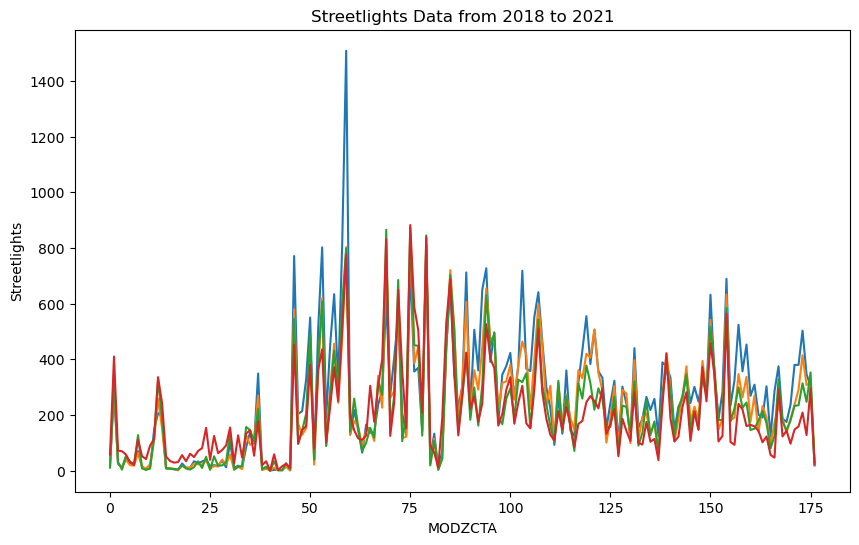

In [39]:
plt.figure(figsize=(10, 6))
for year in ['2018_strlights', '2019_strlights', '2020_strlights', '2021_strlights']:
    plt.plot(Merged[year], label=year)
plt.xlabel('MODZCTA')
plt.ylabel('Streetlights')
plt.title('Streetlights Data from 2018 to 2021')

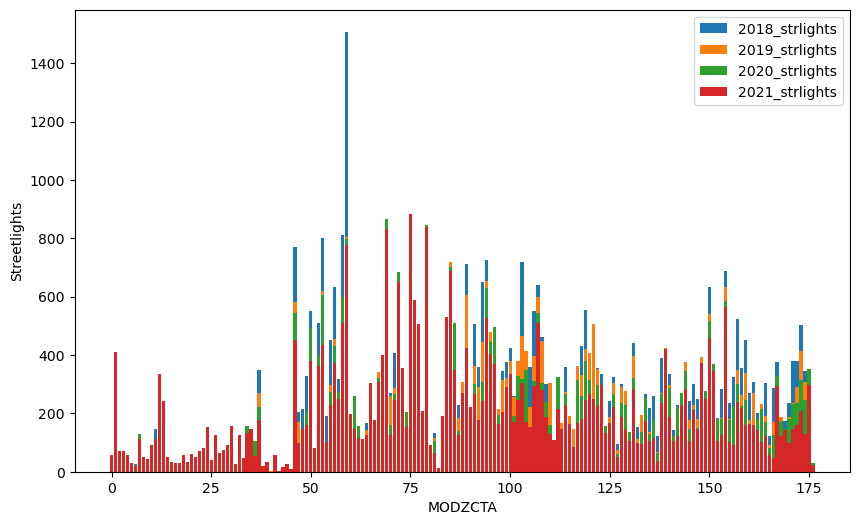

In [40]:
plt.figure(figsize=(10, 6))
for year in ['2018_strlights', '2019_strlights', '2020_strlights', '2021_strlights']:
    plt.bar(Merged.index, Merged[year], label=year)
plt.legend()
plt.xlabel('MODZCTA')
plt.ylabel('Streetlights')
plt.show()

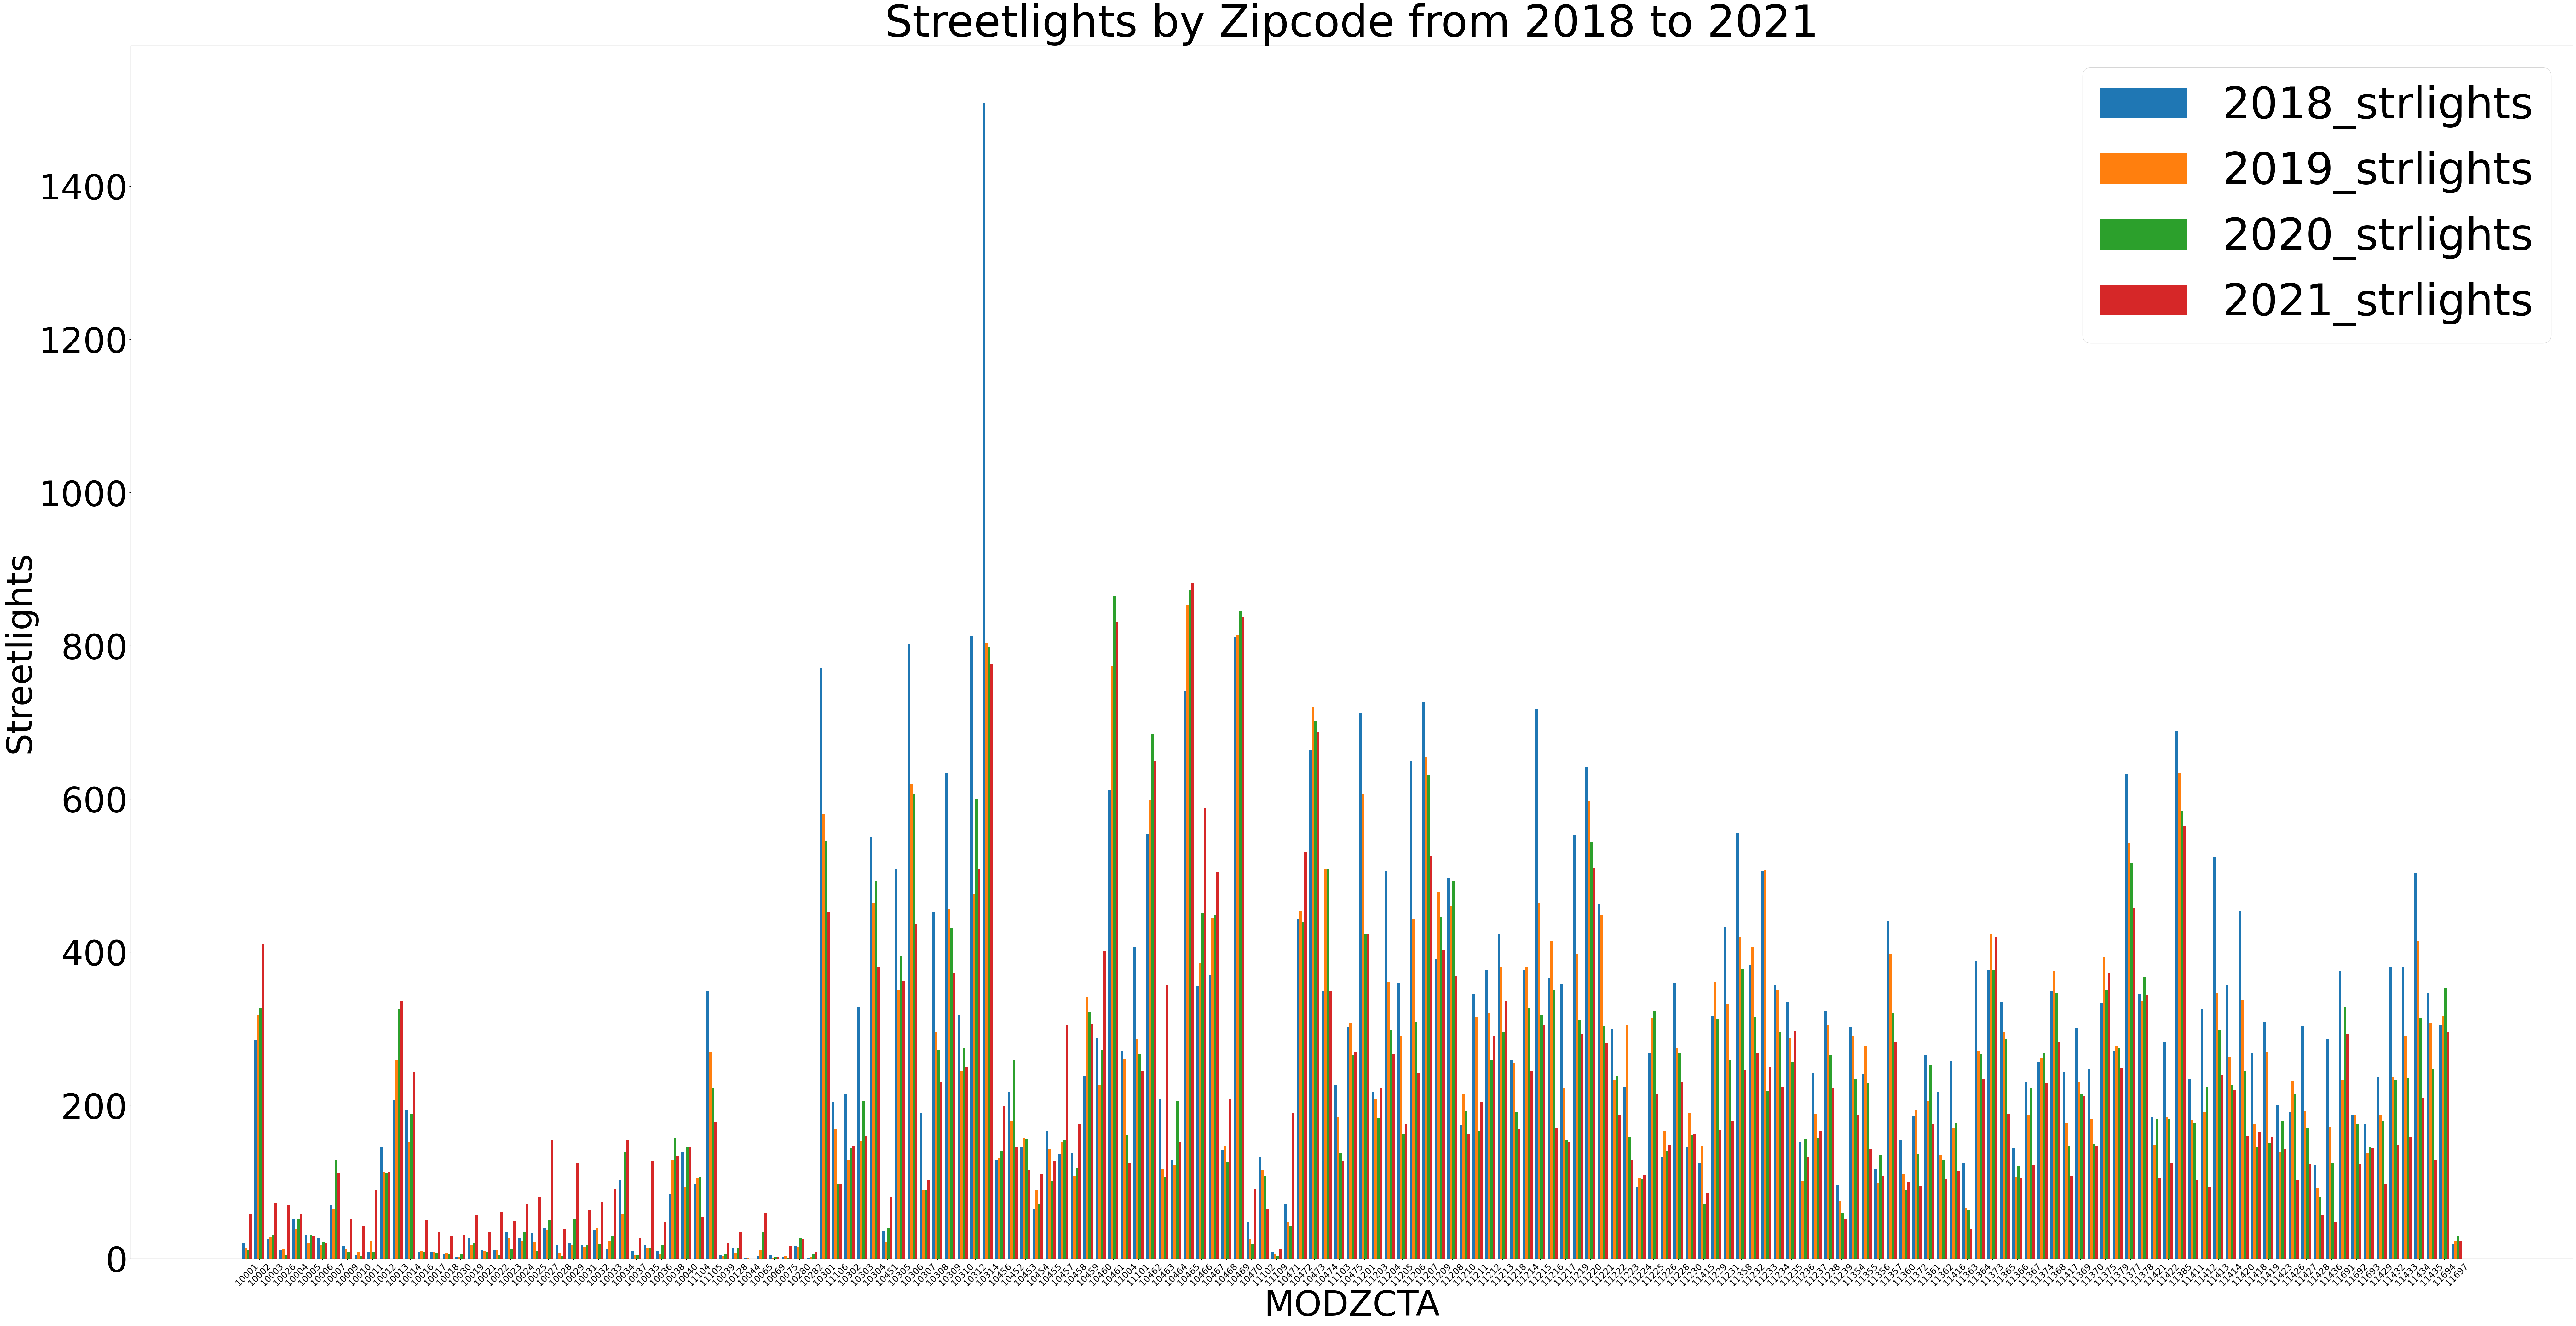

In [41]:
plt.figure(figsize=(100, 50))
width = 0.2
indices = range(len(Merged))

for i, year in enumerate(['2018_strlights', '2019_strlights', '2020_strlights', '2021_strlights']):
    plt.bar([x + width*i for x in indices], Merged[year], width=width, label=year)

plt.xlabel('MODZCTA', fontsize=80)
plt.ylabel('Streetlights', fontsize=80)
plt.title('Streetlights by Zipcode from 2018 to 2021', fontsize=100)
plt.xticks([x + width*1.5 for x in indices], Merged['MODZCTA'], fontsize=20, rotation=45)
plt.yticks(fontsize=80)
plt.legend(fontsize=100)

Text(0.5, 1.0, 'Heatmap for 2018 crimedata normalized by population')

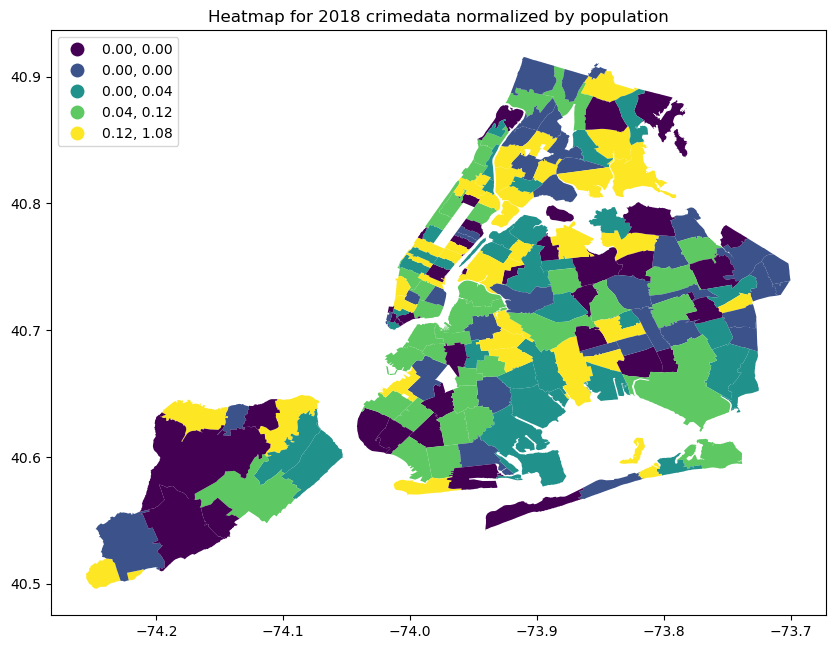

In [42]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='2018_normalized', k=5, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2018 crimedata normalized by population")

Text(0.5, 1.0, 'Heatmap for 2019 crimedata normalized by population')

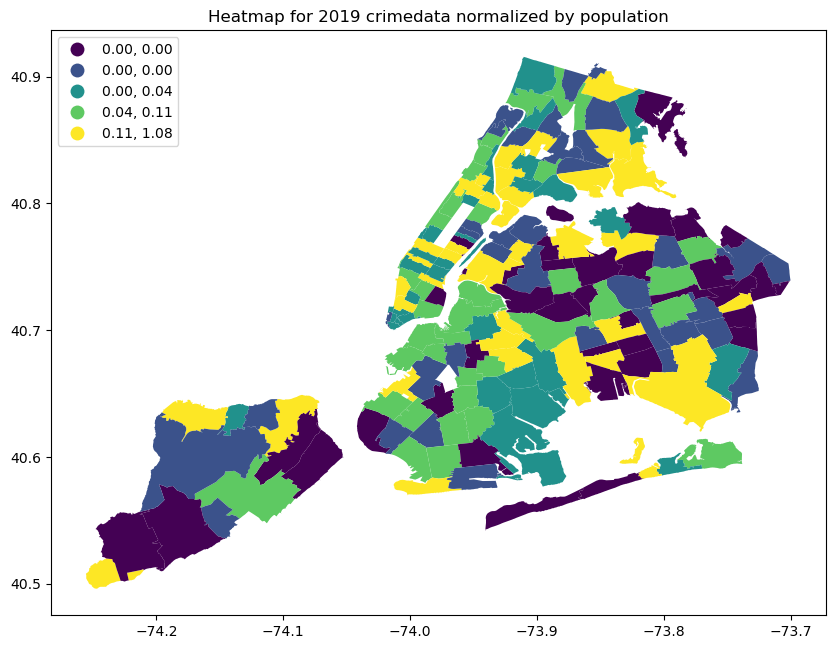

In [43]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='2019_normalized', k=5, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2019 crimedata normalized by population")

Text(0.5, 1.0, 'Heatmap for 2020 crimedata normalized by population')

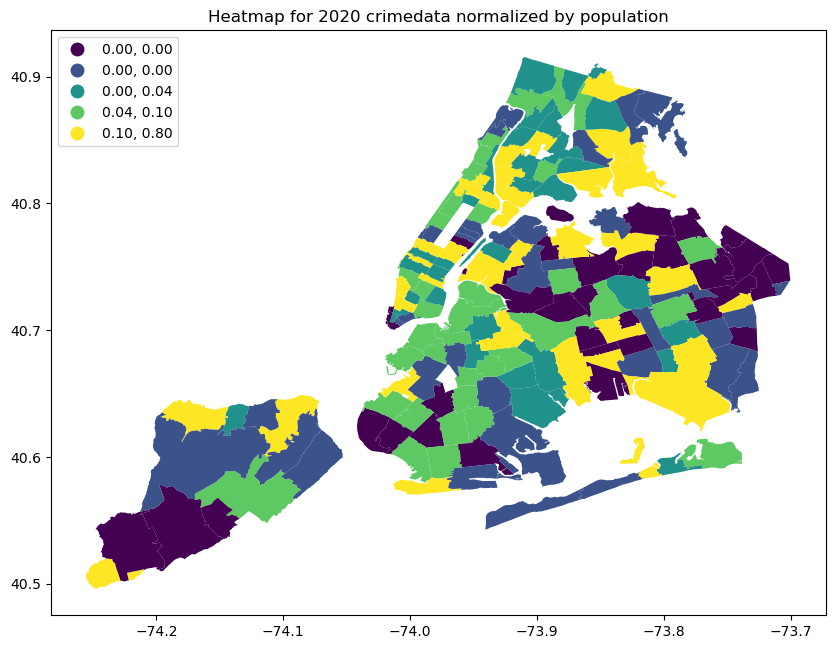

In [44]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='2020_normalized', k=5, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2020 crimedata normalized by population")

Text(0.5, 1.0, 'Heatmap for 2021 crimedata normalized by population')

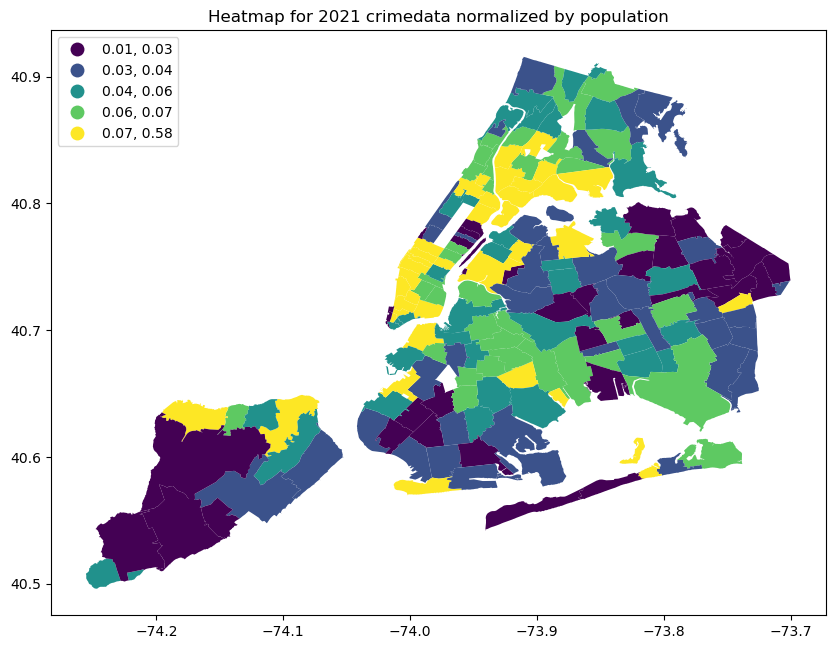

In [45]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='2021_normalized', k=5, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2021 crimedata normalized by population")

Text(0.5, 1.0, 'Heatmap for 2018 Streetlights')

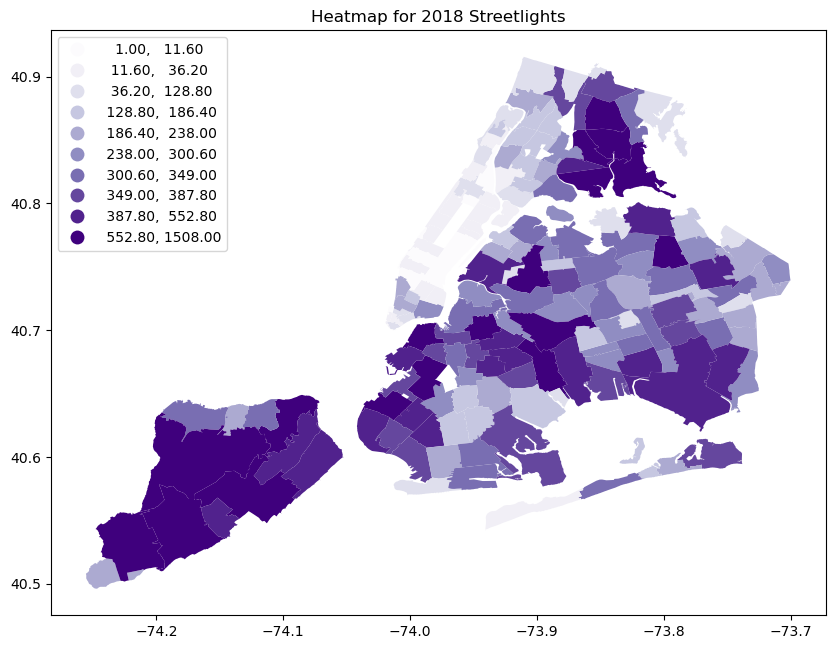

In [46]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
cmap_choice = 'Purples' 
gdf.plot(ax=ax, column='2018_strlights', k=10, scheme='Quantiles', legend=True, cmap=cmap_choice, legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2018 Streetlights")

Text(0.5, 1.0, 'Heatmap for 2019 Streetlights')

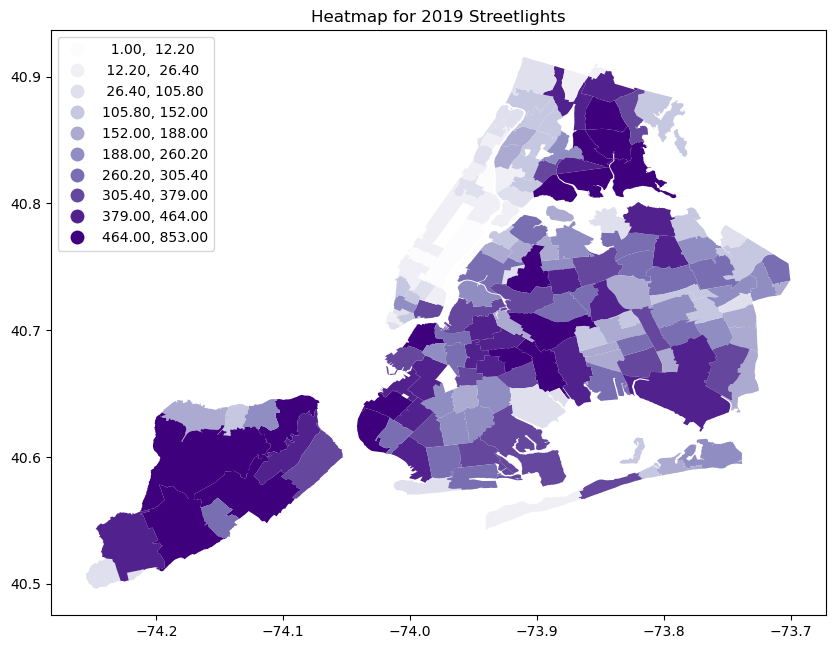

In [47]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
cmap_choice = 'Purples' 
gdf.plot(ax=ax, column='2019_strlights', k=10, scheme='Quantiles', legend=True, cmap=cmap_choice, legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2019 Streetlights")

Text(0.5, 1.0, 'Heatmap for 2020 Streetlights')

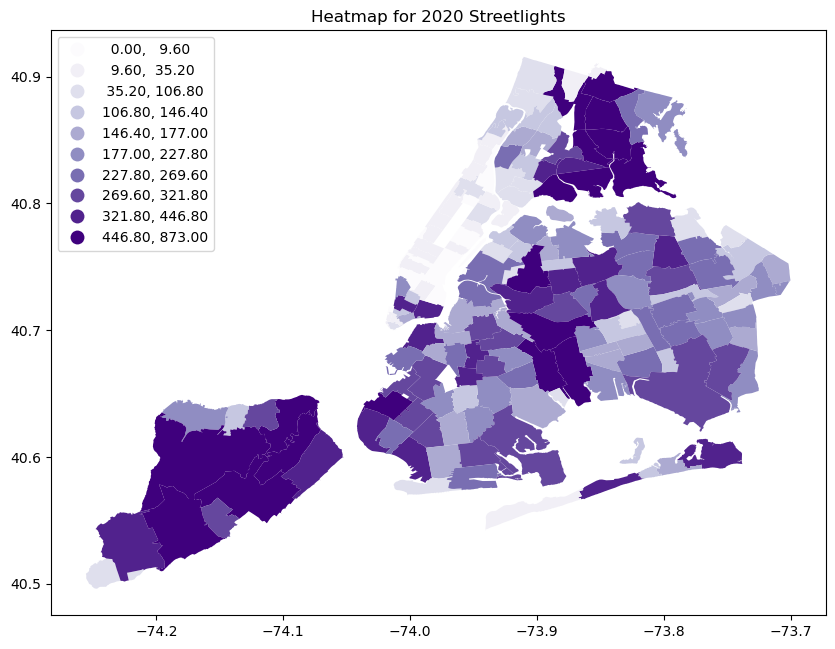

In [48]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
cmap_choice = 'Purples' 
gdf.plot(ax=ax, column='2020_strlights', k=10, scheme='Quantiles', legend=True, cmap=cmap_choice, legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2020 Streetlights")

Text(0.5, 1.0, 'Heatmap for 2021 Streetlights')

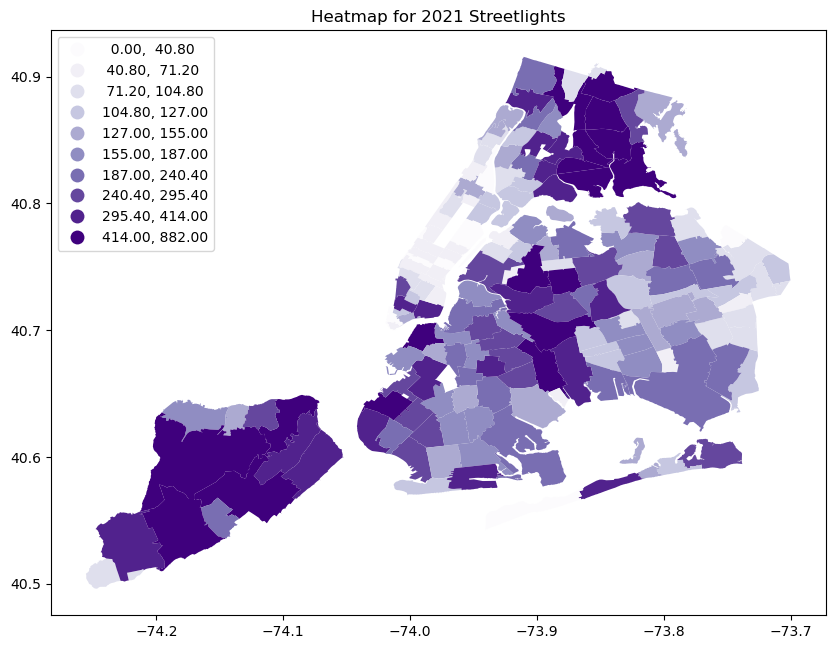

In [49]:
gdf = gpd.GeoDataFrame(Merged, geometry=gpd.GeoSeries.from_wkt(Merged['Geometry']))
fig, ax = plt.subplots(1, figsize=(10,10))
cmap_choice = 'Purples' 
gdf.plot(ax=ax, column='2021_strlights', k=10, scheme='Quantiles', legend=True, cmap=cmap_choice, legend_kwds={'loc': 'upper left'})
ax.set_title("Heatmap for 2021 Streetlights")

# Analysis 

## Regression Analysis for Population, Crime and Streetlights

In [260]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [268]:
# Using melt to convert columns into rows
melted_pop = pd.melt(population, id_vars=['zcta'], var_name='Year', value_name='population')
melted_pop

zcta             Year  population
0    10001  2018_population       22924
1    10002  2018_population       74993
2    10003  2018_population       54682
3    10004  2018_population        3028
4    10005  2018_population        8831
..     ...              ...         ...
703  11691  2021_population       70797
704  11692  2021_population       24639
705  11693  2021_population       14147
706  11694  2021_population       22432
707  11697  2021_population        3782

[708 rows x 3 columns]

In [269]:
melted_crm = pd.melt(crime, id_vars=['zcta'], var_name='Year', value_name='crime')
melted_crm

zcta        Year  crime
0    10001  2018_crime    183
1    10002  2018_crime   4048
2    10003  2018_crime   4966
3    10004  2018_crime      1
4    10005  2018_crime      0
..     ...         ...    ...
703  11691  2021_crime   4021
704  11692  2021_crime    927
705  11693  2021_crime   1080
706  11694  2021_crime    609
707  11697  2021_crime     46

[708 rows x 3 columns]

In [270]:
melted_str = pd.melt(strlights, id_vars=['zcta'], var_name='Year', value_name='strlights')
melted_str

zcta            Year  strlights
0    10001  2018_strlights       20.0
1    10002  2018_strlights      285.0
2    10003  2018_strlights       25.0
3    10004  2018_strlights       52.0
4    10005  2018_strlights       31.0
..     ...             ...        ...
703  11691  2021_strlights      293.0
704  11692  2021_strlights      123.0
705  11693  2021_strlights      144.0
706  11694  2021_strlights      296.0
707  11697  2021_strlights       23.0

[708 rows x 3 columns]

In [271]:
merged_df2 = pd.merge(melted_crm, melted_pop, left_index=True, right_index=True)
merged_df2 = pd.merge(merged_df2, melted_str, left_index=True, right_index=True)
merged_df2 = merged_df2[['population', 'crime', 'strlights']]
merged_df2

population  crime  strlights
0         22924    183       20.0
1         74993   4048      285.0
2         54682   4966       25.0
3          3028      1       52.0
4          8831      0       31.0
..          ...    ...        ...
703       70797   4021      293.0
704       24639    927      123.0
705       14147   1080      144.0
706       22432    609      296.0
707        3782     46       23.0

[708 rows x 3 columns]

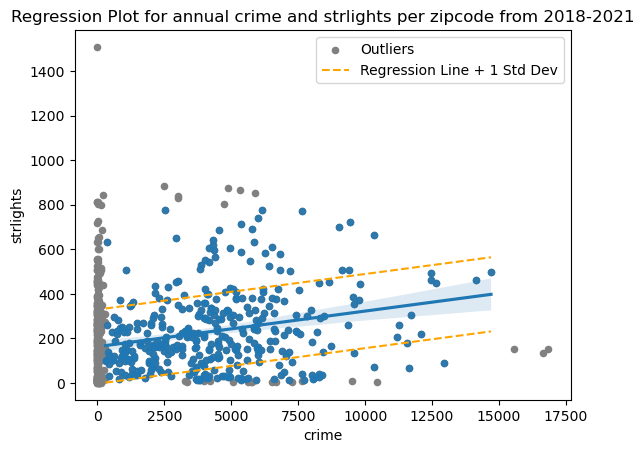

Points without outliers take up 51.13%


In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot with a regression line
fig, ax = plt.subplots()  # get axis to plot on
merged_df2.plot(ax=ax, kind='scatter', x='crime', y='strlights', s=20, color='grey', label='Outliers')  # show the data

# Filter out points with 'strlights' values outside the specified range
filtered_df = merged_df2[(merged_df2['crime'] > 300) & (merged_df2['crime'] < 15000) & (merged_df2['strlights'] > 10) & (merged_df2['strlights'] < 800)]

# Plot the regression line for the filtered data
reg_plot = sns.regplot(x='crime', y='strlights', data=filtered_df, scatter_kws={'s': 20})

# Extract the regression line data
x_line = reg_plot.get_lines()[0].get_xdata()
y_line = reg_plot.get_lines()[0].get_ydata()

# Calculate the residuals
residuals = filtered_df['strlights'] - np.interp(filtered_df['crime'], x_line, y_line)

# Calculate the standard deviation of residuals
std_dev_residuals = residuals.std()

# Calculate the upper and lower bounds for the interval (one standard deviation away)
upper_bound_std_dev = y_line + std_dev_residuals
lower_bound_std_dev = y_line - std_dev_residuals

# Plot the regression line one standard deviation away
plt.plot(x_line, upper_bound_std_dev, color='orange', linestyle='--', label='Regression Line + 1 Std Dev')
plt.plot(x_line, lower_bound_std_dev, color='orange', linestyle='--')

# Add title
plt.title('Regression Plot for annual crime and strlights per zipcode from 2018-2021')

# Show the plot
plt.legend()
plt.show()

# Calculate the percentage of points without outliers
percentage_without_outliers = len(filtered_df) / len(merged_df2) * 100

# Display the percentage
print(f'Points without outliers take up {percentage_without_outliers:.2f}%')


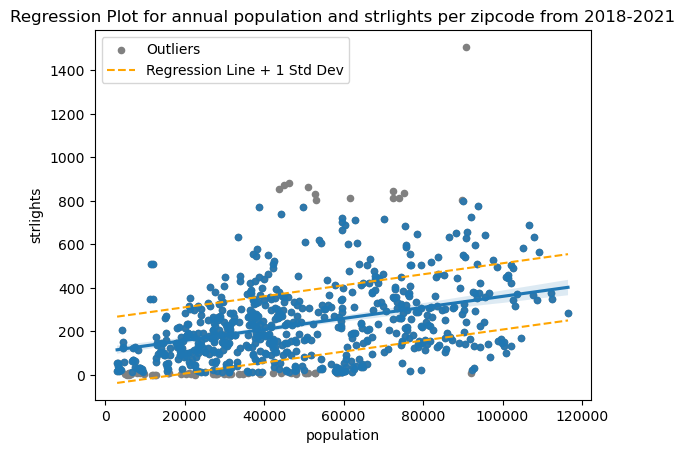

Points without outliers take up 90.68%


In [285]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot with a regression line
fig, ax = plt.subplots()  # get axis to plot on
merged_df2.plot(ax=ax, kind='scatter', x='population', y='strlights', s=20, color='grey', label='Outliers')  # show the data

# Filter out points with 'strlights' values outside the specified range
filtered_df = merged_df2[(merged_df2['strlights'] > 10) & (merged_df2['strlights'] < 800)]

# Plot the regression line for the filtered data
reg_plot = sns.regplot(x='population', y='strlights', data=filtered_df, scatter_kws={'s': 20})

# Extract the regression line data
x_line = reg_plot.get_lines()[0].get_xdata()
y_line = reg_plot.get_lines()[0].get_ydata()

# Calculate the residuals
residuals = filtered_df['strlights'] - np.interp(filtered_df['population'], x_line, y_line)

# Calculate the standard deviation of residuals
std_dev_residuals = residuals.std()

# Calculate the upper and lower bounds for the interval (one standard deviation away)
upper_bound_std_dev = y_line + std_dev_residuals
lower_bound_std_dev = y_line - std_dev_residuals

# Plot the regression line one standard deviation away
plt.plot(x_line, upper_bound_std_dev, color='orange', linestyle='--', label='Regression Line + 1 Std Dev')
plt.plot(x_line, lower_bound_std_dev, color='orange', linestyle='--')

# Add title
plt.title('Regression Plot for annual population and strlights per zipcode from 2018-2021')

# Show the plot
plt.legend()
plt.show()

# Calculate the percentage of points without outliers
percentage_without_outliers = len(filtered_df) / len(merged_df2) * 100

# Display the percentage
print(f'Points without outliers take up {percentage_without_outliers:.2f}%')


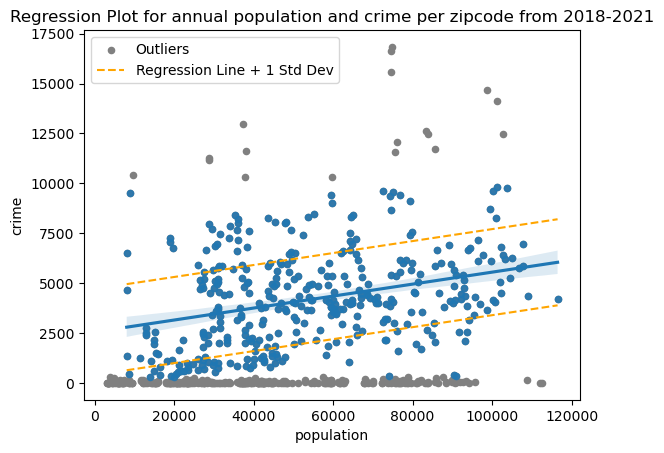

Points without outliers take up 51.98%


In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot with a regression line
fig, ax = plt.subplots()  # get axis to plot on
merged_df2.plot(ax=ax, kind='scatter', x='population', y='crime', s=20, color='grey', label='Outliers')  # show the data

# Filter out points with crime values outside the specified range
filtered_df = merged_df2[(merged_df2['crime'] > 300) & (merged_df2['crime'] < 10000)]

# Plot the regression line for the filtered data
reg_plot = sns.regplot(x='population', y='crime', data=filtered_df, scatter_kws={'s': 20})

# Extract the regression line data
x_line = reg_plot.get_lines()[0].get_xdata()
y_line = reg_plot.get_lines()[0].get_ydata()

# Calculate the residuals
residuals = filtered_df['crime'] - np.interp(filtered_df['population'], x_line, y_line)

# Calculate the standard deviation of residuals
std_dev_residuals = residuals.std()

# Calculate the upper and lower bounds for the interval (one standard deviation away)
upper_bound_std_dev = y_line + std_dev_residuals
lower_bound_std_dev = y_line - std_dev_residuals

# Plot the regression line one standard deviation away
plt.plot(x_line, upper_bound_std_dev, color='orange', linestyle='--', label='Regression Line + 1 Std Dev')
plt.plot(x_line, lower_bound_std_dev, color='orange', linestyle='--')

# Add title
plt.title('Regression Plot for annual population and crime per zipcode from 2018-2021')

# Show the plot
plt.legend()
plt.show()

# Calculate the percentage of points without outliers
percentage_without_outliers = len(filtered_df) / len(merged_df2) * 100

# Display the percentage
print(f'Points without outliers take up {percentage_without_outliers:.2f}%')


### Correlation between Streetlights and Female Crime

## Type 1 Crimes Analysis

In [31]:
crime_pop_strlight_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  2018_normalized  \
0              24117            25026            26966         0.007983   
1              74479            74363            76807         0.053978   
2              53977            54671            54447         0.090816   
3               3335             3310             4795         0.000330   
4               8701             8664             8637         0.000000   
..               ...              ...              ...              ...   
172            68543            68454            70797         0.066086   
173            22074            22394            24639         0.000667   
174            12944            13029            14147         0.186934   
175            21202            21258            22432         0.000094   
176             3674             3527             3782         0.000000   

     2019_normalized  2020_normalized  2021_normalized  2018_strlights  \
0           0.006883         0.010549         0.182452            20.0   
1           0.056539         0.052109         0.080487           285.0   
2           0.090650         0.076165         0.067350            25.0   
3           0.002399         0.001208         0.054223            52.0   
4           0.000460         0.002078         0.050017            31.0   
..               ...              ...              ...             ...   
172         0.065054         0.064058         0.056796           375.0   
173         0.001268         0.003528         0.037623           187.0   
174         0.211990         0.191649         0.076341           175.0   
175         0.000189         0.001646         0.027149           304.0   
176         0.000000         0.001701         0.012163            19.0   

     2019_strlights  2020_strlights  2021_strlights  
0              14.0            11.0            58.0  
1             318.0           327.0           410.0  
2              28.0            31.0            72.0  
3              39.0            52.0            58.0  
4              20.0            31.0            30.0  
..              ...             ...             ...  
172           233.0           328.0           293.0  
173           187.0           175.0           123.0  
174           137.0           145.0           144.0  
175           316.0           353.0           296.0  
176            23.0            30.0            23.0  

[177 rows x 17 columns]

In [33]:
import scipy.stats

# Assuming crime_pop_strlight_data['2021_normalized'] and crime_pop_strlight_data['2021_strlights'] are your two variables
x = crime_pop_strlight_data['2021_normalized']
y = crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient, p-value, and R-squared
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)
r_squared = correlation_coefficient**2

print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')

Correlation coefficient: -0.06660374351817733
R-squared value: 0.004436058650635149
p-value: 0.3784231122226633


In [34]:
type1_crime = pd.read_csv('crimedata_nyc_MODZCTA_type1_year.csv')
type1_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_type1_crime'}
type1_crime = type1_crime.rename(columns=type1_crime_column_mapping)
type1_crime['zcta'] = type1_crime['zcta'].astype(int)
type1_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, type1_crime, on='zcta')
type1_crime_pop_strlight_data['2021_type1_normalized'] = (type1_crime_pop_strlight_data['2021_type1_crime'] / type1_crime_pop_strlight_data['2021_population'])

In [36]:
import scipy.stats

# Assuming crime_pop_strlight_data['2021_normalized'] and crime_pop_strlight_data['2021_strlights'] are your two variables
x = type1_crime_pop_strlight_data['2021_type1_normalized']
y = type1_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient, p-value, and R-squared
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)
r_squared = correlation_coefficient**2

print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')

Correlation coefficient: -0.07222346549938279
R-squared value: 0.0052162289687405355
p-value: 0.3394204433930695


In [37]:
arson_crime = pd.read_csv('crimedata_nyc_MODZCTA_arson_year.csv')
arson_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_arson_crime'}
arson_crime = arson_crime.rename(columns=arson_crime_column_mapping)
arson_crime['zcta'] = arson_crime['zcta'].astype(int)
arson_crime
arson_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, arson_crime, on='zcta')
arson_crime_pop_strlight_data['2021_arson_normalized'] = (arson_crime_pop_strlight_data['2021_arson_crime'] / arson_crime_pop_strlight_data['2021_population'])

In [39]:
import scipy.stats

# Assuming arson_crime_pop_strlight_data['2021_arson_normalized'] and arson_crime_pop_strlight_data['2021_strlights'] are your two variables
x = arson_crime_pop_strlight_data['2021_arson_normalized']
y = arson_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient, p-value, and R-squared
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)
r_squared = correlation_coefficient**2

print(f'Arson correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Arson correlation coefficient: 0.05093839983034412
R-squared value: 0.002594720577276002
p-value: 0.5529582110724495


In [40]:
burglary_crime = pd.read_csv('crimedata_nyc_MODZCTA_burglary_year.csv')
burglary_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_burglary_crime'}
burglary_crime = burglary_crime.rename(columns=burglary_crime_column_mapping)
burglary_crime['zcta'] = burglary_crime['zcta'].astype(int)
burglary_crime
burglary_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, burglary_crime, on='zcta')
burglary_crime_pop_strlight_data['2021_burglary_normalized'] = (burglary_crime_pop_strlight_data['2021_burglary_crime'] / burglary_crime_pop_strlight_data['2021_population'])

In [42]:
import scipy.stats

# Assuming burglary_crime_pop_strlight_data['2021_burglary_normalized'] and burglary_crime_pop_strlight_data['2021_strlights'] are your two variables
x = burglary_crime_pop_strlight_data['2021_burglary_normalized']
y = burglary_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Burglary correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Burglary correlation coefficient: -0.11029259249251042
R-squared value: 0.012164455958718965
p-value: 0.1439020401502219


In [43]:
felony_crime = pd.read_csv('crimedata_nyc_MODZCTA_felony_year.csv')
felony_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_felony_crime'}
felony_crime = felony_crime.rename(columns=felony_crime_column_mapping)
felony_crime['zcta'] = felony_crime['zcta'].astype(int)
felony_crime
felony_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, felony_crime, on='zcta')
felony_crime_pop_strlight_data['2021_felony_normalized'] = (felony_crime_pop_strlight_data['2021_felony_crime'] / felony_crime_pop_strlight_data['2021_population'])

In [45]:
import scipy.stats

# Assuming felony_crime_pop_strlight_data['2021_felony_normalized'] and felony_crime_pop_strlight_data['2021_strlights'] are your two variables
x = felony_crime_pop_strlight_data['2021_felony_normalized']
y = felony_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Felony correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Felony correlation coefficient: -0.004529286762565629
R-squared value: 2.0514438577552236e-05
p-value: 0.9525636260602516


In [46]:
grand_crime = pd.read_csv('crimedata_nyc_MODZCTA_grand_year.csv')
grand_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_grand_crime'}
grand_crime = grand_crime.rename(columns=grand_crime_column_mapping)
grand_crime['zcta'] = grand_crime['zcta'].astype(int)
grand_crime
grand_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, grand_crime, on='zcta')
grand_crime_pop_strlight_data['2021_grand_normalized'] = (grand_crime_pop_strlight_data['2021_grand_crime'] / grand_crime_pop_strlight_data['2021_population'])

In [48]:
import scipy.stats

# Assuming grand_crime_pop_strlight_data['2021_grand_normalized'] and grand_crime_pop_strlight_data['2021_strlights'] are your two variables
x = grand_crime_pop_strlight_data['2021_grand_normalized']
y = grand_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Grand correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Grand correlation coefficient: -0.1547455642140852
R-squared value: 0.023946189643935564
p-value: 0.03972723226799194


In [49]:
motor_crime = pd.read_csv('crimedata_nyc_MODZCTA_motor_year.csv')
motor_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_motor_crime'}
motor_crime = motor_crime.rename(columns=motor_crime_column_mapping)
motor_crime['zcta'] = motor_crime['zcta'].astype(int)
motor_crime
motor_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, motor_crime, on='zcta')
motor_crime_pop_strlight_data['2021_motor_normalized'] = (motor_crime_pop_strlight_data['2021_motor_crime'] / motor_crime_pop_strlight_data['2021_population'])

In [51]:
import scipy.stats

# Assuming motor_crime_pop_strlight_data['2021_motor_normalized'] and motor_crime_pop_strlight_data['2021_strlights'] are your two variables
x = motor_crime_pop_strlight_data['2021_motor_normalized']
y = motor_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Motor correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Motor correlation coefficient: 0.3513263289972695
R-squared value: 0.12343018944669766
p-value: 1.7446517053077593e-06


In [52]:
murder_crime = pd.read_csv('crimedata_nyc_MODZCTA_murder_year.csv')
murder_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_murder_crime'}
murder_crime = murder_crime.rename(columns=murder_crime_column_mapping)
murder_crime['zcta'] = murder_crime['zcta'].astype(int)
murder_crime
murder_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, murder_crime, on='zcta')
murder_crime_pop_strlight_data['2021_murder_normalized'] = (murder_crime_pop_strlight_data['2021_murder_crime'] / murder_crime_pop_strlight_data['2021_population'])

In [54]:
import scipy.stats

# Assuming murder_crime_pop_strlight_data['2021_murder_normalized'] and murder_crime_pop_strlight_data['2021_strlights'] are your two variables
x = murder_crime_pop_strlight_data['2021_murder_normalized']
y = murder_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Murder correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Murder correlation coefficient: -0.13883975699122783
R-squared value: 0.0192764781213832
p-value: 0.13209809044932386


In [55]:
rape_crime = pd.read_csv('crimedata_nyc_MODZCTA_rape_year.csv')
rape_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_rape_crime'}
rape_crime = rape_crime.rename(columns=rape_crime_column_mapping)
rape_crime['zcta'] = rape_crime['zcta'].astype(int)
rape_crime
rape_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, rape_crime, on='zcta')
rape_crime_pop_strlight_data['2021_rape_normalized'] = (rape_crime_pop_strlight_data['2021_rape_crime'] / rape_crime_pop_strlight_data['2021_population'])

In [57]:
import scipy.stats

# Assuming rape_crime_pop_strlight_data['2021_rape_normalized'] and rape_crime_pop_strlight_data['2021_strlights'] are your two variables
x = rape_crime_pop_strlight_data['2021_rape_normalized']
y = rape_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Rape correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')

Rape correlation coefficient: -0.1273413972118884
R-squared value: 0.016215831443875936
p-value: 0.28644008645804864


In [58]:
robbery_crime = pd.read_csv('crimedata_nyc_MODZCTA_robbery_year.csv')
robbery_crime_column_mapping = {'MODZCTA': 'zcta', '2021': '2021_robbery_crime'}
robbery_crime = robbery_crime.rename(columns=robbery_crime_column_mapping)
robbery_crime['zcta'] = robbery_crime['zcta'].astype(int)
robbery_crime
robbery_crime_pop_strlight_data = pd.merge(crime_pop_strlight_data, robbery_crime, on='zcta')
robbery_crime_pop_strlight_data['2021_robbery_normalized'] = (robbery_crime_pop_strlight_data['2021_robbery_crime'] / robbery_crime_pop_strlight_data['2021_population'])

In [60]:
import scipy.stats

# Assuming robbery_crime_pop_strlight_data['2021_robbery_normalized'] and robbery_crime_pop_strlight_data['2021_strlights'] are your two variables
x = robbery_crime_pop_strlight_data['2021_robbery_normalized']
y = robbery_crime_pop_strlight_data['2021_strlights']

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(x, y)

# Calculate R-squared value (approximated)
r_squared = correlation_coefficient**2

print(f'Robbery correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')
print(f'p-value: {p_value}')


Robbery correlation coefficient: -0.053249699005667256
R-squared value: 0.0028355304441941604
p-value: 0.4865498374175109


## Correlation by Female Crime and Streetlight 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
!pip install geopandas 

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

### you can also manually download here: 

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
crime_data = pd.read_csv('NYPD_data.csv')

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_16187/1487368918.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('NYPD_data.csv')


In [3]:
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         10600119   01/01/2002     11:00:00   02/25/2006     11:00:00   
1         11052575   04/22/2005     02:00:00          NaN       (null)   
2         10832306   07/11/2005     20:00:00   03/29/2006     12:00:00   
3         10107192   10/19/2005     20:30:00          NaN       (null)   
4         23893731   12/04/2005     09:00:00   08/09/2006     17:00:00   
...            ...          ...          ...          ...          ...   
8353044  261171983   12/30/2022     12:31:00          NaN       (null)   
8353045  261175492   12/31/2022     11:56:00   12/31/2022     17:08:00   
8353046  261147482   12/30/2022     17:20:00   12/30/2022     17:28:00   
8353047  261179651   12/31/2022     20:20:00   12/31/2022     20:26:00   
8353048  261157928   12/31/2022     04:00:00          NaN       (null)   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0                NaN  03/06/2006    104                            RAPE   
1                NaN  04/22/2006    110  GRAND LARCENY OF MOTOR VEHICLE   
2                NaN  03/29/2006    353   UNAUTHORIZED USE OF A VEHICLE   
3                NaN  01/13/2006    126         MISCELLANEOUS PENAL LAW   
4                NaN  08/09/2006    109                   GRAND LARCENY   
...              ...         ...    ...                             ...   
8353044        106.0  12/31/2022    341                   PETIT LARCENY   
8353045         44.0  12/31/2022    359  OFFENSES AGAINST PUBLIC ADMINI   
8353046         17.0  12/30/2022    344    ASSAULT 3 & RELATED OFFENSES   
8353047        112.0  12/31/2022    348        VEHICLE AND TRAFFIC LAWS   
8353048         52.0  12/31/2022    106                  FELONY ASSAULT   

         PD_CD  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        157.0  ...        M              NaN        NaN        NaN   
1        441.0  ...   (null)              NaN        NaN        NaN   
2        462.0  ...        M              NaN        NaN        NaN   
3        461.0  ...        F              NaN        NaN        NaN   
4        405.0  ...   (null)              NaN        NaN        NaN   
...        ...  ...      ...              ...        ...        ...   
8353044  349.0  ...        U              NaN  40.675259 -73.854501   
8353045  759.0  ...        F              NaN  40.829632 -73.915209   
8353046  101.0  ...        M              NaN  40.761265 -73.968887   
8353047  916.0  ...   (null)              NaN  40.725681 -73.857270   
8353048  109.0  ...        M              NaN  40.870942 -73.891499   

                             Lat_Lon               PATROL_BORO STATION_NAME  \
0                                NaN                    (null)       (null)   
1                                NaN                    (null)       (null)   
2                                NaN                    (null)       (null)   
3                                NaN                    (null)       (null)   
4                                NaN                    (null)       (null)   
...                              ...                       ...          ...   
8353044  (40.67525903, -73.85450113)  PATROL BORO QUEENS SOUTH       (null)   
8353045      (40.829632, -73.915209)         PATROL BORO BRONX       (null)   
8353046      (40.761265, -73.968887)     PATROL BORO MAN SOUTH       (null)   
8353047   (40.72568117, -73.8572701)  PATROL BORO QUEENS NORTH       (null)   
8353048      (40.870942, -73.891499)         PATROL BORO BRONX       (null)   

         VIC_AGE_GROUP                  VIC_RACE VIC_SEX  
0                18-24                     WHITE       F  
1                25-44                     BLACK       M  
2                45-64                     WHITE       M  
3                25-44                     BLACK       F  
4                25-44                     WHITE       F  
...                ...                       ...     ...  
835

In [4]:
crime_data = crime_data.dropna()

In [5]:
strlights = pd.read_csv('strlights_cleaned.xls')

In [6]:
strlights

MODZCTA   2018   2019   2020   2021
0    10001.0   20.0   14.0   11.0   58.0
1    10002.0  285.0  318.0  327.0  410.0
2    10003.0   25.0   28.0   31.0   72.0
3    10004.0   52.0   39.0   52.0   58.0
4    10005.0   31.0   20.0   31.0   30.0
..       ...    ...    ...    ...    ...
172  11691.0  375.0  233.0  328.0  293.0
173  11692.0  187.0  187.0  175.0  123.0
174  11693.0  175.0  137.0  145.0  144.0
175  11694.0  304.0  316.0  353.0  296.0
176  11697.0   19.0   23.0   30.0   23.0

[177 rows x 5 columns]

In [7]:
streetlight_data = strlights.rename(columns={'MODZCTA': 'ZIPCODE'})

In [8]:
boroughs = gpd.read_file('Borough Boundaries.geojson')

In [9]:
crime_data = pd.read_csv('NYPD_data.csv')

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_16187/1487368918.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('NYPD_data.csv')


In [10]:
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         10600119   01/01/2002     11:00:00   02/25/2006     11:00:00   
1         11052575   04/22/2005     02:00:00          NaN       (null)   
2         10832306   07/11/2005     20:00:00   03/29/2006     12:00:00   
3         10107192   10/19/2005     20:30:00          NaN       (null)   
4         23893731   12/04/2005     09:00:00   08/09/2006     17:00:00   
...            ...          ...          ...          ...          ...   
8353044  261171983   12/30/2022     12:31:00          NaN       (null)   
8353045  261175492   12/31/2022     11:56:00   12/31/2022     17:08:00   
8353046  261147482   12/30/2022     17:20:00   12/30/2022     17:28:00   
8353047  261179651   12/31/2022     20:20:00   12/31/2022     20:26:00   
8353048  261157928   12/31/2022     04:00:00          NaN       (null)   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0                NaN  03/06/2006    104                            RAPE   
1                NaN  04/22/2006    110  GRAND LARCENY OF MOTOR VEHICLE   
2                NaN  03/29/2006    353   UNAUTHORIZED USE OF A VEHICLE   
3                NaN  01/13/2006    126         MISCELLANEOUS PENAL LAW   
4                NaN  08/09/2006    109                   GRAND LARCENY   
...              ...         ...    ...                             ...   
8353044        106.0  12/31/2022    341                   PETIT LARCENY   
8353045         44.0  12/31/2022    359  OFFENSES AGAINST PUBLIC ADMINI   
8353046         17.0  12/30/2022    344    ASSAULT 3 & RELATED OFFENSES   
8353047        112.0  12/31/2022    348        VEHICLE AND TRAFFIC LAWS   
8353048         52.0  12/31/2022    106                  FELONY ASSAULT   

         PD_CD  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        157.0  ...        M              NaN        NaN        NaN   
1        441.0  ...   (null)              NaN        NaN        NaN   
2        462.0  ...        M              NaN        NaN        NaN   
3        461.0  ...        F              NaN        NaN        NaN   
4        405.0  ...   (null)              NaN        NaN        NaN   
...        ...  ...      ...              ...        ...        ...   
8353044  349.0  ...        U              NaN  40.675259 -73.854501   
8353045  759.0  ...        F              NaN  40.829632 -73.915209   
8353046  101.0  ...        M              NaN  40.761265 -73.968887   
8353047  916.0  ...   (null)              NaN  40.725681 -73.857270   
8353048  109.0  ...        M              NaN  40.870942 -73.891499   

                             Lat_Lon               PATROL_BORO STATION_NAME  \
0                                NaN                    (null)       (null)   
1                                NaN                    (null)       (null)   
2                                NaN                    (null)       (null)   
3                                NaN                    (null)       (null)   
4                                NaN                    (null)       (null)   
...                              ...                       ...          ...   
8353044  (40.67525903, -73.85450113)  PATROL BORO QUEENS SOUTH       (null)   
8353045      (40.829632, -73.915209)         PATROL BORO BRONX       (null)   
8353046      (40.761265, -73.968887)     PATROL BORO MAN SOUTH       (null)   
8353047   (40.72568117, -73.8572701)  PATROL BORO QUEENS NORTH       (null)   
8353048      (40.870942, -73.891499)         PATROL BORO BRONX       (null)   

         VIC_AGE_GROUP                  VIC_RACE VIC_SEX  
0                18-24                     WHITE       F  
1                25-44                     BLACK       M  
2                45-64                     WHITE       M  
3                25-44                     BLACK       F  
4                25-44                     WHITE       F  
...                ...                       ...     ...  
835

In [11]:
data = crime_data[['VIC_RACE', 'OFNS_DESC','CMPLNT_NUM', 'CMPLNT_FR_DT','VIC_SEX', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude', 'Longitude']]
data

VIC_RACE                       OFNS_DESC CMPLNT_NUM  \
0                           WHITE                            RAPE   10600119   
1                           BLACK  GRAND LARCENY OF MOTOR VEHICLE   11052575   
2                           WHITE   UNAUTHORIZED USE OF A VEHICLE   10832306   
3                           BLACK         MISCELLANEOUS PENAL LAW   10107192   
4                           WHITE                   GRAND LARCENY   23893731   
...                           ...                             ...        ...   
8353044  ASIAN / PACIFIC ISLANDER                   PETIT LARCENY  261171983   
8353045            BLACK HISPANIC  OFFENSES AGAINST PUBLIC ADMINI  261175492   
8353046                     BLACK    ASSAULT 3 & RELATED OFFENSES  261147482   
8353047                     WHITE        VEHICLE AND TRAFFIC LAWS  261179651   
8353048                     BLACK                  FELONY ASSAULT  261157928   

        CMPLNT_FR_DT VIC_SEX CMPLNT_FR_TM                       OFNS_DESC  \
0         01/01/2002       F     11:00:00                            RAPE   
1         04/22/2005       M     02:00:00  GRAND LARCENY OF MOTOR VEHICLE   
2         07/11/2005       M     20:00:00   UNAUTHORIZED USE OF A VEHICLE   
3         10/19/2005       F     20:30:00         MISCELLANEOUS PENAL LAW   
4         12/04/2005       F     09:00:00                   GRAND LARCENY   
...              ...     ...          ...                             ...   
8353044   12/30/2022       F     12:31:00                   PETIT LARCENY   
8353045   12/31/2022       M     11:56:00  OFFENSES AGAINST PUBLIC ADMINI   
8353046   12/30/2022       M     17:20:00    ASSAULT 3 & RELATED OFFENSES   
8353047   12/31/2022       F     20:20:00        VEHICLE AND TRAFFIC LAWS   
8353048   12/31/2022       M     04:00:00                  FELONY ASSAULT   

           BORO_NM   Latitude  Longitude  
0        MANHATTAN        NaN        NaN  
1            BRONX        NaN        NaN  
2         BROOKLYN        NaN        NaN  
3            BRONX        NaN        NaN  
4            BRONX        NaN        NaN  
...            ...        ...        ...  
8353044     QUEENS  40.675259 -73.854501  
8353045      BRONX  40.829632 -73.915209  
8353046  MANHATTAN  40.761265 -73.968887  
8353047     QUEENS  40.725681 -73.857270  
8353048      BRONX  40.870942 -73.891499  

[8353049 rows x 10 columns]

In [12]:
data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], how='any', inplace=True)
data.dropna(subset=['Latitude', 'Longitude'], how='any', inplace=True)
data = data.dropna(subset=['BORO_NM'])
data = data.drop_duplicates(subset=['CMPLNT_NUM'])
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')


/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_16187/1549809760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], how='any', inplace=True)
/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_16187/1549809760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Latitude', 'Longitude'], how='any', inplace=True)


In [13]:
earliest_date = data['CMPLNT_FR_DT'].min()
latest_date = data['CMPLNT_FR_DT'].max()

print("earliest_date:", earliest_date)
print("latest_date:", latest_date)


earliest_date: 1900-03-10 00:00:00
latest_date: 2022-12-31 00:00:00


earliest_date: 2017-01-01 00:00:00
latest_date: 2022-12-31 00:00:00


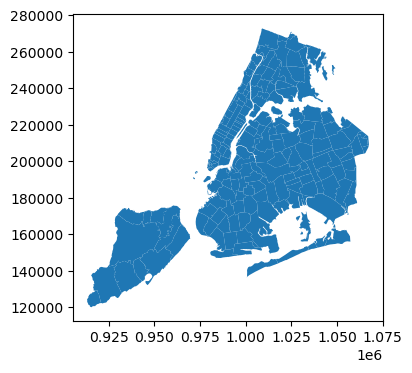

In [14]:
data = data[(data['CMPLNT_FR_DT'].dt.year >= 2017) & (data['CMPLNT_FR_DT'].dt.year < 2023)]

earliest_date = data['CMPLNT_FR_DT'].min()
latest_date = data['CMPLNT_FR_DT'].max()

print("earliest_date:", earliest_date)
print("latest_date:", latest_date)

import os 
os.listdir('./Data/ZIPCODE')

zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

zipcode.COUNTY.unique()

zipcode.plot(figsize=(4,4))

zipcode = zipcode.to_crs("EPSG:4326")

zipcode_gpd = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']), crs = 'EPSG:4326')

In [15]:
data_nyc = gpd.sjoin(zipcode_gpd, zipcode[zipcode['COUNTY'].isin(['New York', 'Kings', 'Bronx', 'Queens', 'Richmond'])], how='inner', op='within')

/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [16]:
data_nyc['ZIPCODE'] = data_nyc['ZIPCODE'].astype(int)
data_nyc = data_nyc[data_nyc['ZIPCODE'] > 9999]

In [17]:
data_nyc = data_nyc[['VIC_RACE', 'OFNS_DESC','CMPLNT_NUM', 'CMPLNT_FR_DT','VIC_SEX', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude', 'Longitude','ZIPCODE']]

In [18]:
data_nyc['Year'] = data_nyc['CMPLNT_FR_DT'].dt.year

In [19]:
data_nyc

VIC_RACE                       OFNS_DESC  \
73                        UNKNOWN                         ROBBERY   
78                          BLACK                   HARRASSMENT 2   
92                 WHITE HISPANIC    ASSAULT 3 & RELATED OFFENSES   
5579048            BLACK HISPANIC                      SEX CRIMES   
5579180            WHITE HISPANIC                   PETIT LARCENY   
...                           ...                             ...   
8137046                   UNKNOWN                   HARRASSMENT 2   
7782673                     WHITE                   PETIT LARCENY   
8078911  ASIAN / PACIFIC ISLANDER        VEHICLE AND TRAFFIC LAWS   
8234420  ASIAN / PACIFIC ISLANDER                   GRAND LARCENY   
8343327                     BLACK  CRIMINAL MISCHIEF & RELATED OF   

                              OFNS_DESC CMPLNT_NUM CMPLNT_FR_DT VIC_SEX  \
73                              ROBBERY  171216196   2017-11-04       M   
78                        HARRASSMENT 2  194802520   2019-03-17       M   
92         ASSAULT 3 & RELATED OFFENSES  221846475   2020-12-11       M   
5579048                      SEX CRIMES  212841631   2017-01-01       M   
5579180                   PETIT LARCENY  159954909   2017-01-04       M   
...                                 ...        ...          ...     ...   
8137046                   HARRASSMENT 2  249027142   2022-08-03       D   
7782673                   PETIT LARCENY  238225125   2021-11-16       M   
8078911        VEHICLE AND TRAFFIC LAWS  247077910   2022-06-23       M   
8234420                   GRAND LARCENY  252320181   2022-10-10       M   
8343327  CRIMINAL MISCHIEF & RELATED OF  260517738   2022-12-24       F   

        CMPLNT_FR_TM                       OFNS_DESC  \
73          13:20:00                         ROBBERY   
78          10:26:00                   HARRASSMENT 2   
92          22:00:00    ASSAULT 3 & RELATED OFFENSES   
5579048     00:01:00                      SEX CRIMES   
5579180     06:00:00                   PETIT LARCENY   
...              ...                             ...   
8137046     20:00:00                   HARRASSMENT 2   
7782673     17:49:00                   PETIT LARCENY   
8078911     15:08:00        VEHICLE AND TRAFFIC LAWS   
8234420     15:00:00                   GRAND LARCENY   
8343327     07:00:00  CRIMINAL MISCHIEF & RELATED OF   

                              OFNS_DESC    BORO_NM   Latitude  Longitude  \
73                              ROBBERY      BRONX  40.837842 -73.919628   
78                        HARRASSMENT 2      BRONX  40.837842 -73.919628   
92         ASSAULT 3 & RELATED OFFENSES      BRONX  40.837842 -73.919628   
5579048                      SEX CRIMES      BRONX  40.837842 -73.919628   
5579180                   PETIT LARCENY      BRONX  40.837842 -73.919628   
...                                 ...        ...        ...        ...   
8137046                   HARRASSMENT 2  MANHATTAN  40.692663 -74.014765   
7782673                   PETIT LARCENY     (null)  40.811139 -73.963539   
8078911        VEHICLE AND TRAFFIC LAWS     QUEENS  40.699716 -73.798685   
8234420                   GRAND LARCENY     QUEENS  40.699716 -73.798685   
8343327  CRIMINAL MISCHIEF & RELATED OF     QUEENS  40.701214 -73.801573   

         ZIPCODE  Year  
73         10452  2017  
78         10452  2019  
92         10452  2020  
5579048    10452  2017  
5579180    10452  2017  
...          ...   ...  
8137046    10004  2022  
7782673    10115  2021  
8078911    11451  2022  
8234420    11451  2022  
8343327    11451  2022  

[2770161 rows x 14 columns]

In [20]:
crimedata_zipcode_year = data_nyc.groupby(['ZIPCODE', 'Year']).size().unstack(fill_value=0)

In [21]:
crimedata_zipcode_year = data_nyc.groupby(['ZIPCODE', 'Year']).size().unstack(fill_value=0)

In [22]:
crimedata_zipcode_year

Year     2017  2018  2019  2020  2021  2022
ZIPCODE                                    
10001     149   183   166   264  4926  6634
10002    4310  4048  4211  3877  6227  7549
10003    5083  4966  4893  4164  3727  4431
10004       0     1     8     4   261   400
10005       2     0     4    19   434  1208
...       ...   ...   ...   ...   ...   ...
11691    4362  4434  4460  4385  4021  3817
11692      21    14    28    79   927  1084
11693    2710  2415  2744  2498  1080  1081
11694       0     2     4    35   609   952
11697       0     0     0     6    46    31

[195 rows x 6 columns]

In [23]:
zcta_mapping_data = pd.read_csv('zcta.csv')


In [24]:
zcta_mapping_data

modzcta         label                 zcta  pop_est  \
0      10001  10001, 10118  10001, 10119, 10199    23072   
1      10002         10002                10002    74993   
2      10003         10003                10003    54682   
3      10026         10026                10026    39363   
4      10004         10004                10004     3028   
..       ...           ...                  ...      ...   
173    11434         11434         11430, 11434    65989   
174    11435         11435                11435    59296   
175    11694         11694                11694    21354   
176    11697         11697                11697     3540   
177    99999           NaN                99999        0   

                                              the_geom  
0    MULTIPOLYGON (((-73.98774438827894 40.74406551...  
1    MULTIPOLYGON (((-73.99750380833868 40.71407144...  
2    MULTIPOLYGON (((-73.98863576728334 40.72293099...  
3    MULTIPOLYGON (((-73.96200720826798 40.80550908...  
4    MULTIPOLYGON (((-74.00826694529984 40.70771979...  
..                                                 ...  
173  MULTIPOLYGON (((-73.75460907012868 40.64719952...  
174  MULTIPOLYGON (((-73.8057700022681 40.682930109...  
175  MULTIPOLYGON (((-73.86495602260939 40.56663006...  
176  MULTIPOLYGON (((-73.86288509369598 40.57605877...  
177  MULTIPOLYGON (((-74.21416669251056 40.55659003...  

[178 rows x 5 columns]

In [25]:
# zipcode_to_zcta_mapping 딕셔너리 생성
zipcode_to_zcta_mapping = dict(zip(zcta_mapping_data['modzcta'], zcta_mapping_data['zcta']))

In [26]:
# 'ZIPCODE' 열을 'zcta'로 변환하는 함수 정의
def convert_zipcode_to_zcta(zipcode):
    return zipcode_to_zcta_mapping.get(zipcode, zipcode)

In [27]:
# 'ZIPCODE'를 'zcta'로 변환
data_nyc['zcta'] = data_nyc['ZIPCODE'].apply(convert_zipcode_to_zcta)

In [28]:
# 변환된 데이터 확인
data_nyc[['ZIPCODE', 'zcta']]

ZIPCODE   zcta
73         10452  10452
78         10452  10452
92         10452  10452
5579048    10452  10452
5579180    10452  10452
...          ...    ...
8137046    10004  10004
7782673    10115  10115
8078911    11451  11451
8234420    11451  11451
8343327    11451  11451

[2770161 rows x 2 columns]

In [29]:
data_nyc

VIC_RACE                       OFNS_DESC  \
73                        UNKNOWN                         ROBBERY   
78                          BLACK                   HARRASSMENT 2   
92                 WHITE HISPANIC    ASSAULT 3 & RELATED OFFENSES   
5579048            BLACK HISPANIC                      SEX CRIMES   
5579180            WHITE HISPANIC                   PETIT LARCENY   
...                           ...                             ...   
8137046                   UNKNOWN                   HARRASSMENT 2   
7782673                     WHITE                   PETIT LARCENY   
8078911  ASIAN / PACIFIC ISLANDER        VEHICLE AND TRAFFIC LAWS   
8234420  ASIAN / PACIFIC ISLANDER                   GRAND LARCENY   
8343327                     BLACK  CRIMINAL MISCHIEF & RELATED OF   

                              OFNS_DESC CMPLNT_NUM CMPLNT_FR_DT VIC_SEX  \
73                              ROBBERY  171216196   2017-11-04       M   
78                        HARRASSMENT 2  194802520   2019-03-17       M   
92         ASSAULT 3 & RELATED OFFENSES  221846475   2020-12-11       M   
5579048                      SEX CRIMES  212841631   2017-01-01       M   
5579180                   PETIT LARCENY  159954909   2017-01-04       M   
...                                 ...        ...          ...     ...   
8137046                   HARRASSMENT 2  249027142   2022-08-03       D   
7782673                   PETIT LARCENY  238225125   2021-11-16       M   
8078911        VEHICLE AND TRAFFIC LAWS  247077910   2022-06-23       M   
8234420                   GRAND LARCENY  252320181   2022-10-10       M   
8343327  CRIMINAL MISCHIEF & RELATED OF  260517738   2022-12-24       F   

        CMPLNT_FR_TM                       OFNS_DESC  \
73          13:20:00                         ROBBERY   
78          10:26:00                   HARRASSMENT 2   
92          22:00:00    ASSAULT 3 & RELATED OFFENSES   
5579048     00:01:00                      SEX CRIMES   
5579180     06:00:00                   PETIT LARCENY   
...              ...                             ...   
8137046     20:00:00                   HARRASSMENT 2   
7782673     17:49:00                   PETIT LARCENY   
8078911     15:08:00        VEHICLE AND TRAFFIC LAWS   
8234420     15:00:00                   GRAND LARCENY   
8343327     07:00:00  CRIMINAL MISCHIEF & RELATED OF   

                              OFNS_DESC    BORO_NM   Latitude  Longitude  \
73                              ROBBERY      BRONX  40.837842 -73.919628   
78                        HARRASSMENT 2      BRONX  40.837842 -73.919628   
92         ASSAULT 3 & RELATED OFFENSES      BRONX  40.837842 -73.919628   
5579048                      SEX CRIMES      BRONX  40.837842 -73.919628   
5579180                   PETIT LARCENY      BRONX  40.837842 -73.919628   
...                                 ...        ...        ...        ...   
8137046                   HARRASSMENT 2  MANHATTAN  40.692663 -74.014765   
7782673                   PETIT LARCENY     (null)  40.811139 -73.963539   
8078911        VEHICLE AND TRAFFIC LAWS     QUEENS  40.699716 -73.798685   
8234420                   GRAND LARCENY     QUEENS  40.699716 -73.798685   
8343327  CRIMINAL MISCHIEF & RELATED OF     QUEENS  40.701214 -73.801573   

         ZIPCODE  Year   zcta  
73         10452  2017  10452  
78         10452  2019  10452  
92         10452  2020  10452  
5579048    10452  2017  10452  
5579180    10452  2017  10452  
...          ...   ...    ...  
8137046    10004  2022  10004  
7782673    10115  2021  10115  
8078911    11451  2022  11451  
8234420    11451  2022  11451  
8343327    11451  2022  11451  

[2770161 rows x 15 columns]

In [30]:
data_nyc.columns

Index(['VIC_RACE', 'OFNS_DESC', 'OFNS_DESC', 'CMPLNT_NUM', 'CMPLNT_FR_DT',
       'VIC_SEX', 'CMPLNT_FR_TM', 'OFNS_DESC', 'OFNS_DESC', 'BORO_NM',
       'Latitude', 'Longitude', 'ZIPCODE', 'Year', 'zcta'],
      dtype='object')

In [31]:
data_nyc

VIC_RACE                       OFNS_DESC  \
73                        UNKNOWN                         ROBBERY   
78                          BLACK                   HARRASSMENT 2   
92                 WHITE HISPANIC    ASSAULT 3 & RELATED OFFENSES   
5579048            BLACK HISPANIC                      SEX CRIMES   
5579180            WHITE HISPANIC                   PETIT LARCENY   
...                           ...                             ...   
8137046                   UNKNOWN                   HARRASSMENT 2   
7782673                     WHITE                   PETIT LARCENY   
8078911  ASIAN / PACIFIC ISLANDER        VEHICLE AND TRAFFIC LAWS   
8234420  ASIAN / PACIFIC ISLANDER                   GRAND LARCENY   
8343327                     BLACK  CRIMINAL MISCHIEF & RELATED OF   

                              OFNS_DESC CMPLNT_NUM CMPLNT_FR_DT VIC_SEX  \
73                              ROBBERY  171216196   2017-11-04       M   
78                        HARRASSMENT 2  194802520   2019-03-17       M   
92         ASSAULT 3 & RELATED OFFENSES  221846475   2020-12-11       M   
5579048                      SEX CRIMES  212841631   2017-01-01       M   
5579180                   PETIT LARCENY  159954909   2017-01-04       M   
...                                 ...        ...          ...     ...   
8137046                   HARRASSMENT 2  249027142   2022-08-03       D   
7782673                   PETIT LARCENY  238225125   2021-11-16       M   
8078911        VEHICLE AND TRAFFIC LAWS  247077910   2022-06-23       M   
8234420                   GRAND LARCENY  252320181   2022-10-10       M   
8343327  CRIMINAL MISCHIEF & RELATED OF  260517738   2022-12-24       F   

        CMPLNT_FR_TM                       OFNS_DESC  \
73          13:20:00                         ROBBERY   
78          10:26:00                   HARRASSMENT 2   
92          22:00:00    ASSAULT 3 & RELATED OFFENSES   
5579048     00:01:00                      SEX CRIMES   
5579180     06:00:00                   PETIT LARCENY   
...              ...                             ...   
8137046     20:00:00                   HARRASSMENT 2   
7782673     17:49:00                   PETIT LARCENY   
8078911     15:08:00        VEHICLE AND TRAFFIC LAWS   
8234420     15:00:00                   GRAND LARCENY   
8343327     07:00:00  CRIMINAL MISCHIEF & RELATED OF   

                              OFNS_DESC    BORO_NM   Latitude  Longitude  \
73                              ROBBERY      BRONX  40.837842 -73.919628   
78                        HARRASSMENT 2      BRONX  40.837842 -73.919628   
92         ASSAULT 3 & RELATED OFFENSES      BRONX  40.837842 -73.919628   
5579048                      SEX CRIMES      BRONX  40.837842 -73.919628   
5579180                   PETIT LARCENY      BRONX  40.837842 -73.919628   
...                                 ...        ...        ...        ...   
8137046                   HARRASSMENT 2  MANHATTAN  40.692663 -74.014765   
7782673                   PETIT LARCENY     (null)  40.811139 -73.963539   
8078911        VEHICLE AND TRAFFIC LAWS     QUEENS  40.699716 -73.798685   
8234420                   GRAND LARCENY     QUEENS  40.699716 -73.798685   
8343327  CRIMINAL MISCHIEF & RELATED OF     QUEENS  40.701214 -73.801573   

         ZIPCODE  Year   zcta  
73         10452  2017  10452  
78         10452  2019  10452  
92         10452  2020  10452  
5579048    10452  2017  10452  
5579180    10452  2017  10452  
...          ...   ...    ...  
8137046    10004  2022  10004  
7782673    10115  2021  10115  
8078911    11451  2022  11451  
8234420    11451  2022  11451  
8343327    11451  2022  11451  

[2770161 rows x 15 columns]

In [32]:
data_nyc = data_nyc.dropna(subset=['VIC_SEX', 'OFNS_DESC'])

In [33]:
data_nyc = data_nyc.loc[:,~data_nyc.columns.duplicated()]


In [34]:
data_nyc.replace(["", "None", -999], pd.NA, inplace=True)

# 'VIC_SEX'와 'OFNS_DESC' 열에서 NaN 값 제거
data_nyc.dropna(subset=['VIC_SEX', 'OFNS_DESC'], inplace=True)

# 인덱스 리셋
data_nyc.reset_index(drop=True, inplace=True)

In [35]:
data_nyc.replace('(null)', pd.NA, inplace=True)

# 이제 NaN 값을 제거
data_nyc.dropna(subset=['VIC_SEX'], inplace=True)

# 다시 데이터 확인
print(data_nyc['VIC_SEX'].unique())

['M' 'F' 'E' 'D' 'L']


In [36]:
# CMPLNT_FR_DT 열을 datetime 형식으로 변환
data_nyc['CMPLNT_FR_DT'] = pd.to_datetime(data_nyc['CMPLNT_FR_DT'])

# 2018-2019년과 2020-2021년 사이의 여성 범죄 데이터 필터링
female_crimes_2018_2019 = data_nyc[(data_nyc['CMPLNT_FR_DT'].dt.year.isin([2018, 2019])) & (data_nyc['VIC_SEX'] == 'F')]
female_crimes_2020_2021 = data_nyc[(data_nyc['CMPLNT_FR_DT'].dt.year.isin([2020, 2021])) & (data_nyc['VIC_SEX'] == 'F')]

# 결과 확인
print(female_crimes_2018_2019.head())
print(female_crimes_2020_2021.head())

             VIC_RACE                       OFNS_DESC CMPLNT_NUM CMPLNT_FR_DT  \
11402  WHITE HISPANIC                  FELONY ASSAULT  173134517   2018-01-01   
11413           BLACK                   GRAND LARCENY  173161933   2018-01-01   
11449           BLACK                   GRAND LARCENY  174471969   2018-01-01   
11462  BLACK HISPANIC  CRIMINAL MISCHIEF & RELATED OF  173148904   2018-01-01   
11464  WHITE HISPANIC   OFF. AGNST PUB ORD SENSBLTY &  173853143   2018-01-01   

      VIC_SEX CMPLNT_FR_TM BORO_NM   Latitude  Longitude  ZIPCODE  Year   zcta  
11402       F     04:55:00   BRONX  40.837842 -73.919628    10452  2018  10452  
11413       F     02:40:00   BRONX  40.837842 -73.919628    10452  2018  10452  
11449       F     16:00:00   BRONX  40.837842 -73.919628    10452  2018  10452  
11462       F     05:40:00   BRONX  40.837842 -73.919628    10452  2018  10452  
11464       F     17:00:00   BRONX  40.837842 -73.919628    10452  2018  10452  
             VIC_RACE      

In [37]:
# 2018-2019년 및 2020-2021년 동안의 여성 범죄 데이터를 ZIPCODE별로 카운트

# 2018-2019년 ZIPCODE별 여성 범죄 카운트
female_crimes_count_2018_2019 = female_crimes_2018_2019.groupby('ZIPCODE').size().reset_index(name='Count_2018_2019')

# 2020-2021년 ZIPCODE별 여성 범죄 카운트
female_crimes_count_2020_2021 = female_crimes_2020_2021.groupby('ZIPCODE').size().reset_index(name='Count_2020_2021')

# 결과 데이터프레임 출력
female_crimes_count_2018_2019.head(), female_crimes_count_2020_2021.head()



(   ZIPCODE  Count_2018_2019
 0    10001              115
 1    10002             3269
 2    10003             3833
 3    10004                4
 4    10005                1,
    ZIPCODE  Count_2020_2021
 0    10001             1237
 1    10002             3815
 2    10003             2713
 3    10004               70
 4    10005              123)

In [38]:
female_crimes_count_2018_2019

ZIPCODE  Count_2018_2019
0      10001              115
1      10002             3269
2      10003             3833
3      10004                4
4      10005                1
..       ...              ...
169    11436                4
170    11691             4696
171    11692               25
172    11693             2342
173    11694                2

[174 rows x 2 columns]

In [39]:
female_crimes_count_2020_2021

ZIPCODE  Count_2020_2021
0      10001             1237
1      10002             3815
2      10003             2713
3      10004               70
4      10005              123
..       ...              ...
187    11691             4576
188    11692              556
189    11693             1691
190    11694              295
191    11697               18

[192 rows x 2 columns]

In [40]:
# 두 데이터셋을 ZIPCODE를 기준으로 outer 조인으로 결합
combined_female_crimes_count = pd.merge(female_crimes_count_2018_2019, female_crimes_count_2020_2021, on='ZIPCODE', how='outer')

# 결측치를 0으로 채우기
combined_female_crimes_count.fillna(0, inplace=True)

# 결과 데이터프레임 출력
combined_female_crimes_count

ZIPCODE  Count_2018_2019  Count_2020_2021
0      10001            115.0           1237.0
1      10002           3269.0           3815.0
2      10003           3833.0           2713.0
3      10004              4.0             70.0
4      10005              1.0            123.0
..       ...              ...              ...
188    11360              0.0            151.0
189    11363              0.0             64.0
190    11370              0.0            345.0
191    11430              0.0              5.0
192    11697              0.0             18.0

[193 rows x 3 columns]

In [41]:
# 스트릿라이트 데이터와 결합
merged_data = pd.merge(combined_female_crimes_count, streetlight_data, on='ZIPCODE', how='left')

# 결과 출력
merged_data

ZIPCODE  Count_2018_2019  Count_2020_2021   2018   2019   2020   2021
0      10001            115.0           1237.0   20.0   14.0   11.0   58.0
1      10002           3269.0           3815.0  285.0  318.0  327.0  410.0
2      10003           3833.0           2713.0   25.0   28.0   31.0   72.0
3      10004              4.0             70.0   52.0   39.0   52.0   58.0
4      10005              1.0            123.0   31.0   20.0   31.0   30.0
..       ...              ...              ...    ...    ...    ...    ...
188    11360              0.0            151.0  154.0  111.0   90.0  100.0
189    11363              0.0             64.0  124.0   66.0   63.0   38.0
190    11370              0.0            345.0  248.0  182.0  149.0  147.0
191    11430              0.0              5.0    NaN    NaN    NaN    NaN
192    11697              0.0             18.0   19.0   23.0   30.0   23.0

[193 rows x 7 columns]

In [47]:
import statsmodels.api as sm

# 결측치 제거
merged_data_cleaned = merged_data.dropna(subset=['Count_2018_2019', '2019'])

# '2019' 열 이름 확인 필요 - 여기서는 'Streetlight_Count_2019'로 가정
# OLS 회귀 모델 생성
X = sm.add_constant(merged_data_cleaned['2019'])  # 상수항 추가
y = merged_data_cleaned['Count_2018_2019']

# 결측치 또는 무한값이 없는지 확인
if not (X.isna().any().any() or np.isinf(X).any().any()):
    model = sm.OLS(y, X).fit()
    model_summary = model.summary()
    print(model_summary)
else:
    print("Data contains NaN or infinite values which cannot be used in regression.")

# 상관관계 분석
correlation = merged_data_cleaned['Count_2018_2019'].corr(merged_data_cleaned['2019'])
print("Correlation between Streetlight Count and Female Crimes Count (2018-2019):", correlation)


                            OLS Regression Results                            
Dep. Variable:        Count_2018_2019   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.787
Date:                Fri, 08 Dec 2023   Prob (F-statistic):             0.0533
Time:                        22:40:52   Log-Likelihood:                -1663.5
No. Observations:                 177   AIC:                             3331.
Df Residuals:                     175   BIC:                             3337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1549.2399    345.891      4.479      0.0

In [46]:
# 결측치 제거
merged_data_cleaned = merged_data.dropna(subset=['Count_2020_2021', '2021'])

# '2019' 열 이름 확인 필요 - 여기서는 'Streetlight_Count_2019'로 가정
# OLS 회귀 모델 생성
X = sm.add_constant(merged_data_cleaned['2021'])  # 상수항 추가
y = merged_data_cleaned['Count_2020_2021']

# 결측치 또는 무한값이 없는지 확인
if not (X.isna().any().any() or np.isinf(X).any().any()):
    model = sm.OLS(y, X).fit()
    model_summary = model.summary()
    print(model_summary)
else:
    print("Data contains NaN or infinite values which cannot be used in regression.")

# 상관관계 분석
correlation = merged_data_cleaned['Count_2020_2021'].corr(merged_data_cleaned['2021'])
print("Correlation between Streetlight Count and Female Crimes Count (2020_2021):", correlation)


                            OLS Regression Results                            
Dep. Variable:        Count_2020_2021   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     18.63
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           2.65e-05
Time:                        22:40:39   Log-Likelihood:                -1576.3
No. Observations:                 177   AIC:                             3157.
Df Residuals:                     175   BIC:                             3163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.1919    211.383      5.839      0.0

## Correlation before & after Covid 

In [1]:
import pandas as pd
import numpy as np
import os
import urllib
!pip install geopandas

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

In [2]:
strlights = pd.read_csv('strlights_cleaned.xls')

In [3]:
strlights

MODZCTA   2018   2019   2020   2021
0    10001.0   20.0   14.0   11.0   58.0
1    10002.0  285.0  318.0  327.0  410.0
2    10003.0   25.0   28.0   31.0   72.0
3    10004.0   52.0   39.0   52.0   58.0
4    10005.0   31.0   20.0   31.0   30.0
..       ...    ...    ...    ...    ...
172  11691.0  375.0  233.0  328.0  293.0
173  11692.0  187.0  187.0  175.0  123.0
174  11693.0  175.0  137.0  145.0  144.0
175  11694.0  304.0  316.0  353.0  296.0
176  11697.0   19.0   23.0   30.0   23.0

[177 rows x 5 columns]

In [4]:
strlights_column_mapping = {'2018': '2018_strlights', '2019': '2019_strlights', '2020': '2020_strlights', '2021': '2021_strlights'}

In [5]:
strlights = strlights.rename(columns=strlights_column_mapping)

In [6]:
strlights

MODZCTA  2018_strlights  2019_strlights  2020_strlights  2021_strlights
0    10001.0            20.0            14.0            11.0            58.0
1    10002.0           285.0           318.0           327.0           410.0
2    10003.0            25.0            28.0            31.0            72.0
3    10004.0            52.0            39.0            52.0            58.0
4    10005.0            31.0            20.0            31.0            30.0
..       ...             ...             ...             ...             ...
172  11691.0           375.0           233.0           328.0           293.0
173  11692.0           187.0           187.0           175.0           123.0
174  11693.0           175.0           137.0           145.0           144.0
175  11694.0           304.0           316.0           353.0           296.0
176  11697.0            19.0            23.0            30.0            23.0

[177 rows x 5 columns]

In [7]:
strlights.rename(columns={'MODZCTA': 'zcta'}, inplace=True)

In [8]:
strlights['zcta'] = strlights['zcta'].astype(int)

In [9]:
crime = pd.read_csv('crimedata_modzcta_year.csv')

In [10]:
crime

MODZCTA  2018  2019  2020  2021
0      10001   183   166   264  4920
1      10002  4048  4211  3875  6182
2      10003  4966  4893  4164  3667
3      10004     1     8     4   260
4      10005     0     4    18   432
..       ...   ...   ...   ...   ...
172    11691  4434  4459  4385  4021
173    11692    14    28    79   927
174    11693  2415  2744  2497  1080
175    11694     2     4    35   609
176    11697     0     0     6    46

[177 rows x 5 columns]

In [11]:
crime_column_mapping = {'2018': '2018_crime', '2019': '2019_crime', '2020': '2020_crime', '2021': '2021_crime'}

In [12]:
crime = crime.rename(columns=crime_column_mapping)

In [13]:
crime.rename(columns={'MODZCTA': 'zcta'}, inplace=True)

In [14]:
crime['zcta'] = crime['zcta'].astype(int)

In [15]:
crime

zcta  2018_crime  2019_crime  2020_crime  2021_crime
0    10001         183         166         264        4920
1    10002        4048        4211        3875        6182
2    10003        4966        4893        4164        3667
3    10004           1           8           4         260
4    10005           0           4          18         432
..     ...         ...         ...         ...         ...
172  11691        4434        4459        4385        4021
173  11692          14          28          79         927
174  11693        2415        2744        2497        1080
175  11694           2           4          35         609
176  11697           0           0           6          46

[177 rows x 5 columns]

In [16]:
population = pd.read_csv('pop_cleaned.csv')

In [17]:
population

zcta   2018   2019   2020   2021
0    10001  22924  24117  25026  26966
1    10002  74993  74479  74363  76807
2    10003  54682  53977  54671  54447
3    10004   3028   3335   3310   4795
4    10005   8831   8701   8664   8637
..     ...    ...    ...    ...    ...
172  11691  67094  68543  68454  70797
173  11692  20991  22074  22394  24639
174  11693  12919  12944  13029  14147
175  11694  21354  21202  21258  22432
176  11697   3540   3674   3527   3782

[177 rows x 5 columns]

In [18]:
population_column_mapping = {'2018': '2018_population', '2019': '2019_population', '2020': '2020_population', '2021': '2021_population'}

In [19]:
population = population.rename(columns=population_column_mapping)

In [20]:
population

zcta  2018_population  2019_population  2020_population  2021_population
0    10001            22924            24117            25026            26966
1    10002            74993            74479            74363            76807
2    10003            54682            53977            54671            54447
3    10004             3028             3335             3310             4795
4    10005             8831             8701             8664             8637
..     ...              ...              ...              ...              ...
172  11691            67094            68543            68454            70797
173  11692            20991            22074            22394            24639
174  11693            12919            12944            13029            14147
175  11694            21354            21202            21258            22432
176  11697             3540             3674             3527             3782

[177 rows x 5 columns]

In [21]:
crime_pop_data = pd.merge(crime, population, on='zcta')

In [22]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  
0              24117            25026            26966  
1              74479            74363            76807  
2              53977            54671            54447  
3               3335             3310             4795  
4               8701             8664             8637  
..               ...              ...              ...  
172            68543            68454            70797  
173            22074            22394            24639  
174            12944            13029            14147  
175            21202            21258            22432  
176             3674             3527             3782  

[177 rows x 9 columns]

In [23]:
crime_pop_data['2018_normalized'] = (crime_pop_data['2018_crime'] / crime_pop_data['2018_population'])

In [24]:
crime_pop_data['2019_normalized'] = (crime_pop_data['2019_crime'] / crime_pop_data['2019_population'])

In [25]:
crime_pop_data['2020_normalized'] = (crime_pop_data['2020_crime'] / crime_pop_data['2020_population'])

In [26]:
crime_pop_data['2021_normalized'] = (crime_pop_data['2021_crime'] / crime_pop_data['2021_population'])

In [27]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  2018_normalized  \
0              24117            25026            26966         0.007983   
1              74479            74363            76807         0.053978   
2              53977            54671            54447         0.090816   
3               3335             3310             4795         0.000330   
4               8701             8664             8637         0.000000   
..               ...              ...              ...              ...   
172            68543            68454            70797         0.066086   
173            22074            22394            24639         0.000667   
174            12944            13029            14147         0.186934   
175            21202            21258            22432         0.000094   
176             3674             3527             3782         0.000000   

     2019_normalized  2020_normalized  2021_normalized  
0           0.006883         0.010549         0.182452  
1           0.056539         0.052109         0.080487  
2           0.090650         0.076165         0.067350  
3           0.002399         0.001208         0.054223  
4           0.000460         0.002078         0.050017  
..               ...              ...              ...  
172         0.065054         0.064058         0.056796  
173         0.001268         0.003528         0.037623  
174         0.211990         0.191649         0.076341  
175         0.000189         0.001646         0.027149  
176         0.000000         0.001701         0.012163  

[177 rows x 13 columns]

In [28]:
crime_pop_data_norm = crime_pop_data[['zcta', '2018_normalized', '2019_normalized', '2020_normalized', '2021_normalized']]

In [29]:
crime_pop_data_norm

zcta  2018_normalized  2019_normalized  2020_normalized  2021_normalized
0    10001         0.007983         0.006883         0.010549         0.182452
1    10002         0.053978         0.056539         0.052109         0.080487
2    10003         0.090816         0.090650         0.076165         0.067350
3    10004         0.000330         0.002399         0.001208         0.054223
4    10005         0.000000         0.000460         0.002078         0.050017
..     ...              ...              ...              ...              ...
172  11691         0.066086         0.065054         0.064058         0.056796
173  11692         0.000667         0.001268         0.003528         0.037623
174  11693         0.186934         0.211990         0.191649         0.076341
175  11694         0.000094         0.000189         0.001646         0.027149
176  11697         0.000000         0.000000         0.001701         0.012163

[177 rows x 5 columns]

In [30]:
crime_pop_strlight_data = pd.merge(crime_pop_data_norm, strlights, on='zcta')

In [31]:
crime_pop_strlight_data

zcta  2018_normalized  2019_normalized  2020_normalized  \
0    10001         0.007983         0.006883         0.010549   
1    10002         0.053978         0.056539         0.052109   
2    10003         0.090816         0.090650         0.076165   
3    10004         0.000330         0.002399         0.001208   
4    10005         0.000000         0.000460         0.002078   
..     ...              ...              ...              ...   
172  11691         0.066086         0.065054         0.064058   
173  11692         0.000667         0.001268         0.003528   
174  11693         0.186934         0.211990         0.191649   
175  11694         0.000094         0.000189         0.001646   
176  11697         0.000000         0.000000         0.001701   

     2021_normalized  2018_strlights  2019_strlights  2020_strlights  \
0           0.182452            20.0            14.0            11.0   
1           0.080487           285.0           318.0           327.0   
2           0.067350            25.0            28.0            31.0   
3           0.054223            52.0            39.0            52.0   
4           0.050017            31.0            20.0            31.0   
..               ...             ...             ...             ...   
172         0.056796           375.0           233.0           328.0   
173         0.037623           187.0           187.0           175.0   
174         0.076341           175.0           137.0           145.0   
175         0.027149           304.0           316.0           353.0   
176         0.012163            19.0            23.0            30.0   

     2021_strlights  
0              58.0  
1             410.0  
2              72.0  
3              58.0  
4              30.0  
..              ...  
172           293.0  
173           123.0  
174           144.0  
175           296.0  
176            23.0  

[177 rows x 9 columns]

In [32]:
crime_pop_strlight_data['2018_str_normalized'] = (crime_pop_strlight_data['2018_strlights'] / 1000)

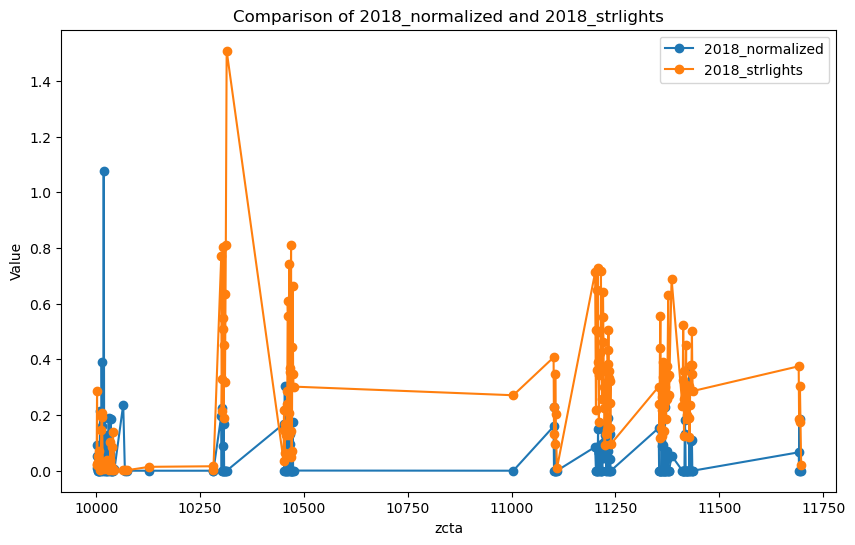

In [33]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 선 그래프: 2018_normalized
plt.plot(crime_pop_strlight_data['zcta'], crime_pop_strlight_data['2018_normalized'], label='2018_normalized', marker='o')

# 선 그래프: 2018_strlights
plt.plot(crime_pop_strlight_data['zcta'], crime_pop_strlight_data['2018_str_normalized'], label='2018_strlights', marker='o')

# 축 및 제목 설정
plt.xlabel('zcta')
plt.ylabel('Value')
plt.title('Comparison of 2018_normalized and 2018_strlights')
plt.legend()  # 범례 추가

# 그래프 표시
plt.show()



In [34]:
# crime with strlight

In [35]:
crime_pop_data

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_population  \
0    10001         183         166         264        4920            22924   
1    10002        4048        4211        3875        6182            74993   
2    10003        4966        4893        4164        3667            54682   
3    10004           1           8           4         260             3028   
4    10005           0           4          18         432             8831   
..     ...         ...         ...         ...         ...              ...   
172  11691        4434        4459        4385        4021            67094   
173  11692          14          28          79         927            20991   
174  11693        2415        2744        2497        1080            12919   
175  11694           2           4          35         609            21354   
176  11697           0           0           6          46             3540   

     2019_population  2020_population  2021_population  2018_normalized  \
0              24117            25026            26966         0.007983   
1              74479            74363            76807         0.053978   
2              53977            54671            54447         0.090816   
3               3335             3310             4795         0.000330   
4               8701             8664             8637         0.000000   
..               ...              ...              ...              ...   
172            68543            68454            70797         0.066086   
173            22074            22394            24639         0.000667   
174            12944            13029            14147         0.186934   
175            21202            21258            22432         0.000094   
176             3674             3527             3782         0.000000   

     2019_normalized  2020_normalized  2021_normalized  
0           0.006883         0.010549         0.182452  
1           0.056539         0.052109         0.080487  
2           0.090650         0.076165         0.067350  
3           0.002399         0.001208         0.054223  
4           0.000460         0.002078         0.050017  
..               ...              ...              ...  
172         0.065054         0.064058         0.056796  
173         0.001268         0.003528         0.037623  
174         0.211990         0.191649         0.076341  
175         0.000189         0.001646         0.027149  
176         0.000000         0.001701         0.012163  

[177 rows x 13 columns]

In [36]:
crime_pop_data.columns

Index(['zcta', '2018_crime', '2019_crime', '2020_crime', '2021_crime',
       '2018_population', '2019_population', '2020_population',
       '2021_population', '2018_normalized', '2019_normalized',
       '2020_normalized', '2021_normalized'],
      dtype='object')

In [37]:
strlights = strlights.rename(columns=strlights_column_mapping)

In [38]:
strlights

zcta  2018_strlights  2019_strlights  2020_strlights  2021_strlights
0    10001            20.0            14.0            11.0            58.0
1    10002           285.0           318.0           327.0           410.0
2    10003            25.0            28.0            31.0            72.0
3    10004            52.0            39.0            52.0            58.0
4    10005            31.0            20.0            31.0            30.0
..     ...             ...             ...             ...             ...
172  11691           375.0           233.0           328.0           293.0
173  11692           187.0           187.0           175.0           123.0
174  11693           175.0           137.0           145.0           144.0
175  11694           304.0           316.0           353.0           296.0
176  11697            19.0            23.0            30.0            23.0

[177 rows x 5 columns]

In [39]:
crime

zcta  2018_crime  2019_crime  2020_crime  2021_crime
0    10001         183         166         264        4920
1    10002        4048        4211        3875        6182
2    10003        4966        4893        4164        3667
3    10004           1           8           4         260
4    10005           0           4          18         432
..     ...         ...         ...         ...         ...
172  11691        4434        4459        4385        4021
173  11692          14          28          79         927
174  11693        2415        2744        2497        1080
175  11694           2           4          35         609
176  11697           0           0           6          46

[177 rows x 5 columns]

In [40]:
merged_df = crime.merge(strlights, on='zcta')


In [56]:
# strlights 2018+2019
merged_df['untill2019_strlights'] = strlights['2019_strlights']

# strlights 2020 + 2021
merged_df['until2021_strlights'] = strlights['2021_strlights']

In [57]:
merged_df['2018_2019_crime'] = merged_df['2018_crime'] + merged_df['2019_crime']


In [58]:
merged_df['2020_2021_crime'] = merged_df['2020_crime'] + merged_df['2021_crime']


In [59]:
merged_df

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_strlights  \
0    10001         183         166         264        4920            20.0   
1    10002        4048        4211        3875        6182           285.0   
2    10003        4966        4893        4164        3667            25.0   
3    10004           1           8           4         260            52.0   
4    10005           0           4          18         432            31.0   
..     ...         ...         ...         ...         ...             ...   
172  11691        4434        4459        4385        4021           375.0   
173  11692          14          28          79         927           187.0   
174  11693        2415        2744        2497        1080           175.0   
175  11694           2           4          35         609           304.0   
176  11697           0           0           6          46            19.0   

     2019_strlights  2020_strlights  2021_strlights  untill2019_strlights  \
0              14.0            11.0            58.0                  14.0   
1             318.0           327.0           410.0                 318.0   
2              28.0            31.0            72.0                  28.0   
3              39.0            52.0            58.0                  39.0   
4              20.0            31.0            30.0                  20.0   
..              ...             ...             ...                   ...   
172           233.0           328.0           293.0                 233.0   
173           187.0           175.0           123.0                 187.0   
174           137.0           145.0           144.0                 137.0   
175           316.0           353.0           296.0                 316.0   
176            23.0            30.0            23.0                  23.0   

     util2021_strlights  2018_2019_crime  2020_2021_crime  until2021_strlights  
0                  58.0              349             5184                 58.0  
1                 410.0             8259            10057                410.0  
2                  72.0             9859             7831                 72.0  
3                  58.0                9              264                 58.0  
4                  30.0                4              450                 30.0  
..                  ...              ...              ...                  ...  
172               293.0             8893             8406                293.0  
173               123.0               42             1006                123.0  
174               144.0             5159             3577                144.0  
175               296.0                6              644                296.0  
176                23.0                0               52                 23.0  

[177 rows x 14 columns]

In [60]:
merged_df.columns


Index(['zcta', '2018_crime', '2019_crime', '2020_crime', '2021_crime',
       '2018_strlights', '2019_strlights', '2020_strlights', '2021_strlights',
       'untill2019_strlights', 'util2021_strlights', '2018_2019_crime',
       '2020_2021_crime', 'until2021_strlights'],
      dtype='object')

In [61]:
selected_bf_covid = merged_df.rename(columns={'untill2019_strlights': 'prestreetlight', '2018_2019_crime': 'precrime'})


In [62]:
selected_af_covid = merged_df.rename(columns={'until2021_strlights': 'poststreetlight', '2020_2021_crime': 'postcrime'})


In [63]:
selected_bf_covid

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_strlights  \
0    10001         183         166         264        4920            20.0   
1    10002        4048        4211        3875        6182           285.0   
2    10003        4966        4893        4164        3667            25.0   
3    10004           1           8           4         260            52.0   
4    10005           0           4          18         432            31.0   
..     ...         ...         ...         ...         ...             ...   
172  11691        4434        4459        4385        4021           375.0   
173  11692          14          28          79         927           187.0   
174  11693        2415        2744        2497        1080           175.0   
175  11694           2           4          35         609           304.0   
176  11697           0           0           6          46            19.0   

     2019_strlights  2020_strlights  2021_strlights  prestreetlight  \
0              14.0            11.0            58.0            14.0   
1             318.0           327.0           410.0           318.0   
2              28.0            31.0            72.0            28.0   
3              39.0            52.0            58.0            39.0   
4              20.0            31.0            30.0            20.0   
..              ...             ...             ...             ...   
172           233.0           328.0           293.0           233.0   
173           187.0           175.0           123.0           187.0   
174           137.0           145.0           144.0           137.0   
175           316.0           353.0           296.0           316.0   
176            23.0            30.0            23.0            23.0   

     util2021_strlights  precrime  2020_2021_crime  until2021_strlights  
0                  58.0       349             5184                 58.0  
1                 410.0      8259            10057                410.0  
2                  72.0      9859             7831                 72.0  
3                  58.0         9              264                 58.0  
4                  30.0         4              450                 30.0  
..                  ...       ...              ...                  ...  
172               293.0      8893             8406                293.0  
173               123.0        42             1006                123.0  
174               144.0      5159             3577                144.0  
175               296.0         6              644                296.0  
176                23.0         0               52                 23.0  

[177 rows x 14 columns]

In [64]:
before_covid = selected_bf_covid[['prestreetlight', 'precrime']]

In [65]:
before_covid

prestreetlight  precrime
0              14.0       349
1             318.0      8259
2              28.0      9859
3              39.0         9
4              20.0         4
..              ...       ...
172           233.0      8893
173           187.0        42
174           137.0      5159
175           316.0         6
176            23.0         0

[177 rows x 2 columns]

In [66]:
selected_af_covid

zcta  2018_crime  2019_crime  2020_crime  2021_crime  2018_strlights  \
0    10001         183         166         264        4920            20.0   
1    10002        4048        4211        3875        6182           285.0   
2    10003        4966        4893        4164        3667            25.0   
3    10004           1           8           4         260            52.0   
4    10005           0           4          18         432            31.0   
..     ...         ...         ...         ...         ...             ...   
172  11691        4434        4459        4385        4021           375.0   
173  11692          14          28          79         927           187.0   
174  11693        2415        2744        2497        1080           175.0   
175  11694           2           4          35         609           304.0   
176  11697           0           0           6          46            19.0   

     2019_strlights  2020_strlights  2021_strlights  untill2019_strlights  \
0              14.0            11.0            58.0                  14.0   
1             318.0           327.0           410.0                 318.0   
2              28.0            31.0            72.0                  28.0   
3              39.0            52.0            58.0                  39.0   
4              20.0            31.0            30.0                  20.0   
..              ...             ...             ...                   ...   
172           233.0           328.0           293.0                 233.0   
173           187.0           175.0           123.0                 187.0   
174           137.0           145.0           144.0                 137.0   
175           316.0           353.0           296.0                 316.0   
176            23.0            30.0            23.0                  23.0   

     util2021_strlights  2018_2019_crime  postcrime  poststreetlight  
0                  58.0              349       5184             58.0  
1                 410.0             8259      10057            410.0  
2                  72.0             9859       7831             72.0  
3                  58.0                9        264             58.0  
4                  30.0                4        450             30.0  
..                  ...              ...        ...              ...  
172               293.0             8893       8406            293.0  
173               123.0               42       1006            123.0  
174               144.0             5159       3577            144.0  
175               296.0                6        644            296.0  
176                23.0                0         52             23.0  

[177 rows x 14 columns]

In [67]:
after_covid = selected_af_covid[['poststreetlight', 'postcrime']]

In [68]:
after_covid

poststreetlight  postcrime
0               58.0       5184
1              410.0      10057
2               72.0       7831
3               58.0        264
4               30.0        450
..               ...        ...
172            293.0       8406
173            123.0       1006
174            144.0       3577
175            296.0        644
176             23.0         52

[177 rows x 2 columns]

In [69]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [70]:
before_covid

prestreetlight  precrime
0              14.0       349
1             318.0      8259
2              28.0      9859
3              39.0         9
4              20.0         4
..              ...       ...
172           233.0      8893
173           187.0        42
174           137.0      5159
175           316.0         6
176            23.0         0

[177 rows x 2 columns]

In [71]:
after_covid

poststreetlight  postcrime
0               58.0       5184
1              410.0      10057
2               72.0       7831
3               58.0        264
4               30.0        450
..               ...        ...
172            293.0       8406
173            123.0       1006
174            144.0       3577
175            296.0        644
176             23.0         52

[177 rows x 2 columns]

### Corrleation btw crime & streetlight before COVID 

In [72]:
lm = smf.ols('precrime~prestreetlight-1', data=before_covid).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               precrime   R-squared (uncentered):                   0.261
Model:                            OLS   Adj. R-squared (uncentered):              0.257
Method:                 Least Squares   F-statistic:                              62.20
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                    3.15e-13
Time:                        13:48:51   Log-Likelihood:                         -1833.8
No. Observations:                 177   AIC:                                      3670.
Df Residuals:                     176   BIC:                                      3673.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
prestreetlight    15.2861      1.938      7.886      0.000      11.461      19.111
==============================================================================
Omnibus:                       29.673   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.005
Skew:                           1.038   Prob(JB):                     3.39e-09
Kurtosis:                       3.989   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


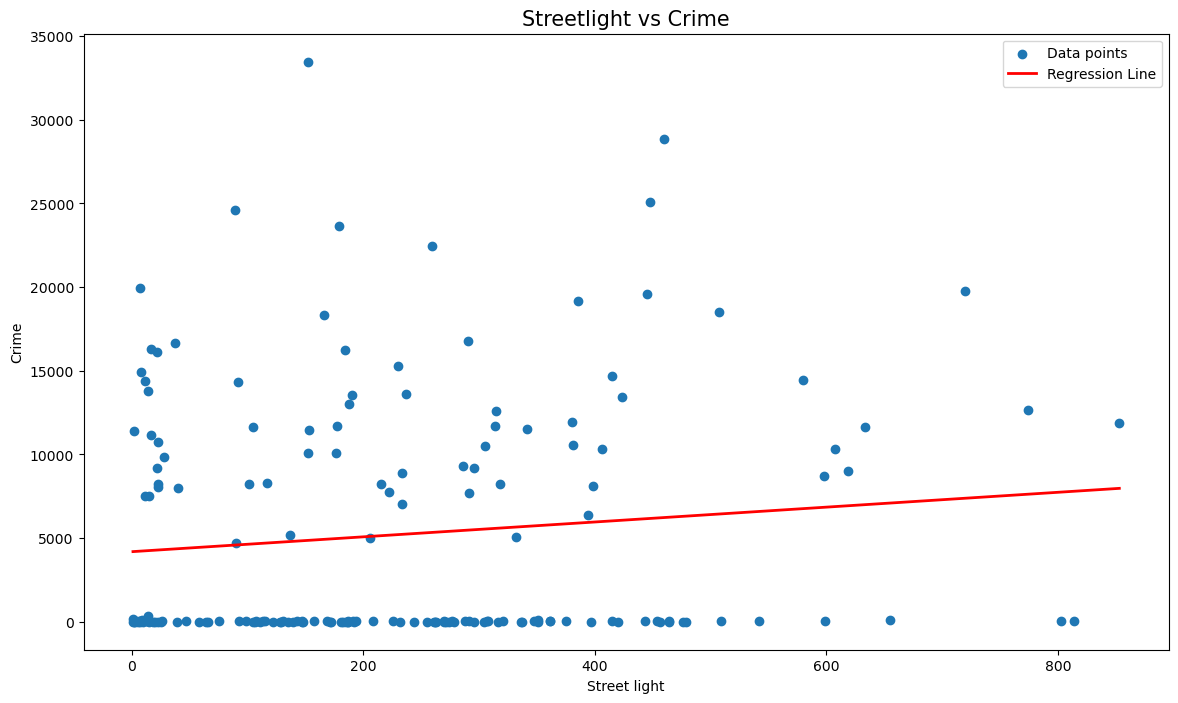

In [73]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Fitting the regression model
X = before_covid[['prestreetlight']]  # Independent variable (Explanatory variable)
y = before_covid['precrime']          # Dependent variable (Response variable)
lm = LinearRegression()
lm.fit(X, y)

# Generating predicted values for the regression line
x_pred = np.linspace(X.min(), X.max(), 100)  # Dividing the range from minimum to maximum of X into 100 parts
y_pred = lm.predict(x_pred.reshape(-1, 1))

# Visualization
plt.figure(figsize=(14, 8))
plt.scatter(before_covid['prestreetlight'], before_covid['precrime'], label='Data points')  # Data points
plt.title('Streetlight vs Crime', fontsize=15)
plt.xlabel('Street light')
plt.ylabel('Crime')
plt.plot(x_pred, y_pred, '-r', linewidth=2, label='Regression Line')  # Regression line
plt.legend()
plt.show()

### logscale 

In [74]:
before_covid['prestreetlight'] = before_covid['prestreetlight'].replace(0, 0.01)
before_covid['precrime'] = before_covid['precrime'].replace(0, 0.01)
logStrlight = np.log(before_covid['prestreetlight'])
logCrime = np.log(before_covid['precrime'])

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_6827/3754121088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid['prestreetlight'] = before_covid['prestreetlight'].replace(0, 0.01)
/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_6827/3754121088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid['precrime'] = before_covid['precrime'].replace(0, 0.01)


In [75]:
logStrlight = np.log(before_covid['prestreetlight'])
logCrime  = np.log(before_covid['precrime'])
dataLog = pd.DataFrame({'logStrlight':logStrlight, 'logCrime':logCrime})
dataLog.head()

logStrlight  logCrime
0     2.639057  5.855072
1     5.762051  9.019059
2     3.332205  9.196140
3     3.663562  2.197225
4     2.995732  1.386294

In [76]:
#Performing OLS regression
lmCrime = smf.ols('logCrime~logStrlight', data=dataLog).fit()
lmCrime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logCrime   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.245
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.136
Time:                        13:48:52   Log-Likelihood:                -481.84
No. Observations:                 177   AIC:                             967.7
Df Residuals:                     175   BIC:                             974.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8387      0.942      4.075      0.000       1.980       5.698
logStrlight     0.2813      0.188      1.498      0.136      -0.089       0.652
==============================================================================
Omnibus:                       35.404   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.092
Skew:                          -0.057   Prob(JB):                       0.0175
Kurtosis:                       1.959   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

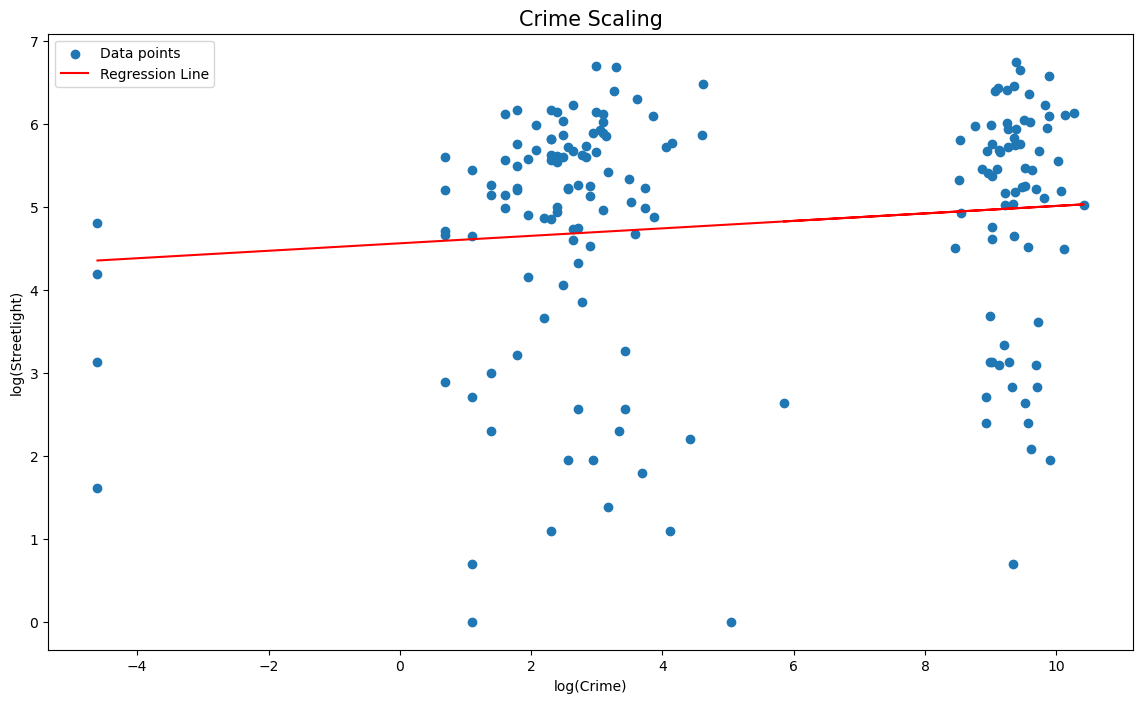

In [77]:
import statsmodels.formula.api as smf

# OLS 회귀 모델을 정의하고 피팅
lmCrime = smf.ols('logStrlight ~ logCrime', data=dataLog).fit()

# 시각화
plt.figure(figsize=(14, 8))
plt.scatter(dataLog['logCrime'], dataLog['logStrlight'], label='Data points')  # 데이터 포인트 표시
plt.title('Crime Scaling', fontsize=15)
plt.xlabel('log(Crime)')
plt.ylabel('log(Streetlight)')

# 회귀선 추가
plt.plot(dataLog['logCrime'], lmCrime.predict(dataLog), '-r', label='Regression Line')  # 회귀선 그리기

plt.legend()  # 범례 표시
plt.show()

In [78]:
lmCrime.conf_int(alpha=0.05) # 95% CI

0         1
Intercept  4.182433  4.938648
logCrime  -0.014286  0.104346

### Corrleation btw crime & streetlight after COVID 

In [79]:
lm = smf.ols('postcrime~poststreetlight-1', data=after_covid).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              postcrime   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              153.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                    1.06e-25
Time:                        13:48:52   Log-Likelihood:                         -1752.2
No. Observations:                 177   AIC:                                      3506.
Df Residuals:                     176   BIC:                                      3510.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
poststreetlight    17.1216      1.384     12.372      0.000      14.390      19.853
==============================================================================
Omnibus:                       12.302   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.495
Skew:                           0.549   Prob(JB):                      0.00117
Kurtosis:                       3.790   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


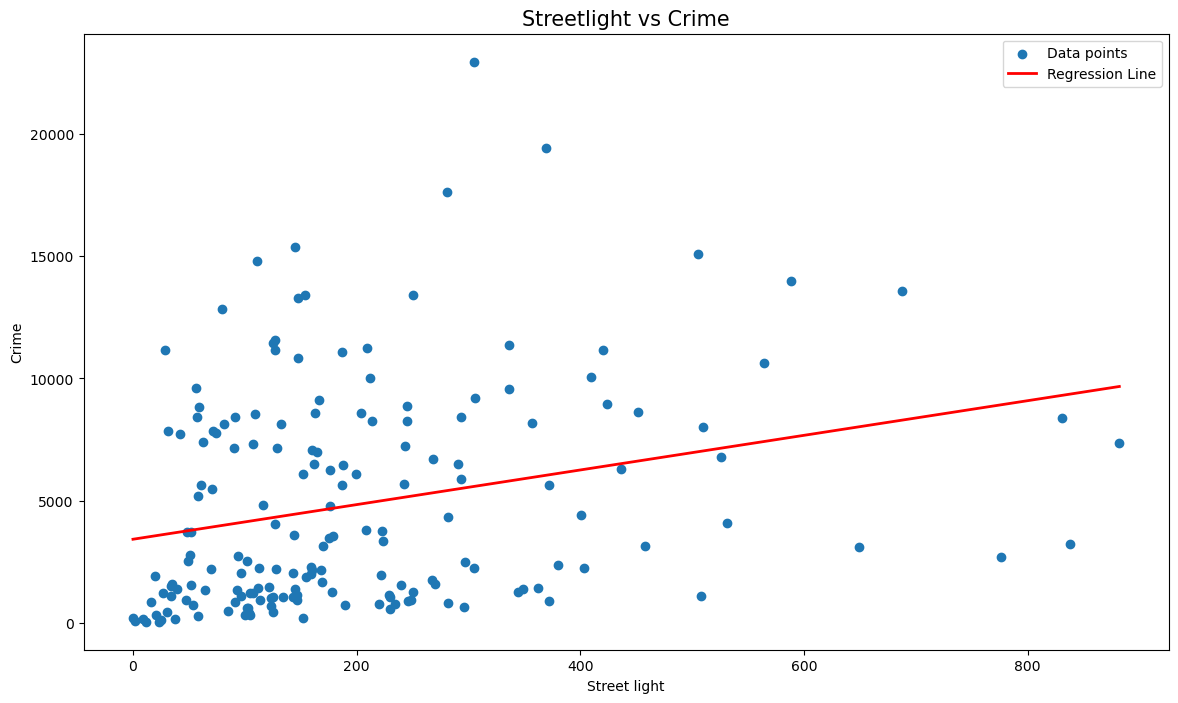

In [80]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# 회귀 모델 피팅
X = after_covid[['poststreetlight']]  # 설명 변수 (독립 변수)
y = after_covid['postcrime']          # 반응 변수 (종속 변수)
lm = LinearRegression()
lm.fit(X, y)

# 회귀선을 위한 예측값 생성
x_pred = np.linspace(X.min(), X.max(), 100)  # X의 최소값에서 최대값 사이를 100개로 나눔
y_pred = lm.predict(x_pred.reshape(-1, 1))

# 시각화
plt.figure(figsize=(14, 8))
plt.scatter(after_covid['poststreetlight'], after_covid['postcrime'], label='Data points')  # 데이터 포인트
plt.title('Streetlight vs Crime', fontsize=15)
plt.xlabel('Street light')
plt.ylabel('Crime')
plt.plot(x_pred, y_pred, '-r', linewidth=2, label='Regression Line')  # 회귀선
plt.legend()
plt.show()

### log-scale of crime and streetlight and repeat the regression, now with intercept

In [81]:
after_covid['poststreetlight'] = after_covid['poststreetlight'].replace(0, 0.01)
after_covid['postcrime'] = after_covid['postcrime'].replace(0, 0.01)
logStrlight2 = np.log(after_covid['poststreetlight'])
logCrime2 = np.log(after_covid['postcrime'])

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_6827/4148492813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_covid['poststreetlight'] = after_covid['poststreetlight'].replace(0, 0.01)
/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_6827/4148492813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_covid['postcrime'] = after_covid['postcrime'].replace(0, 0.01)


In [82]:
logStrlight2 = np.log(after_covid['poststreetlight'])
logCrime2  = np.log(after_covid['postcrime'])
dataLog = pd.DataFrame({'logCrime2':logCrime2, 'logStrlight2':logStrlight2})
dataLog.head()

logCrime2  logStrlight2
0   8.553332      4.060443
1   9.216024      6.016157
2   8.965845      4.276666
3   5.575949      4.060443
4   6.109248      3.401197

In [83]:
#Performing OLS regression
lmCrime2 = smf.ols('logCrime2~logStrlight2', data=dataLog).fit()
lmCrime2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logCrime2   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     44.37
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.39e-10
Time:                        13:48:53   Log-Likelihood:                -270.89
No. Observations:                 177   AIC:                             545.8
Df Residuals:                     175   BIC:                             552.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.5499      0.365     15.220      0.000       4.830       6.270
logStrlight2     0.4810      0.072      6.661      0.000       0.339       0.624
==============================================================================
Omnibus:                        7.711   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.082
Skew:                          -0.351   Prob(JB):                       0.0478
Kurtosis:                       2.423   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

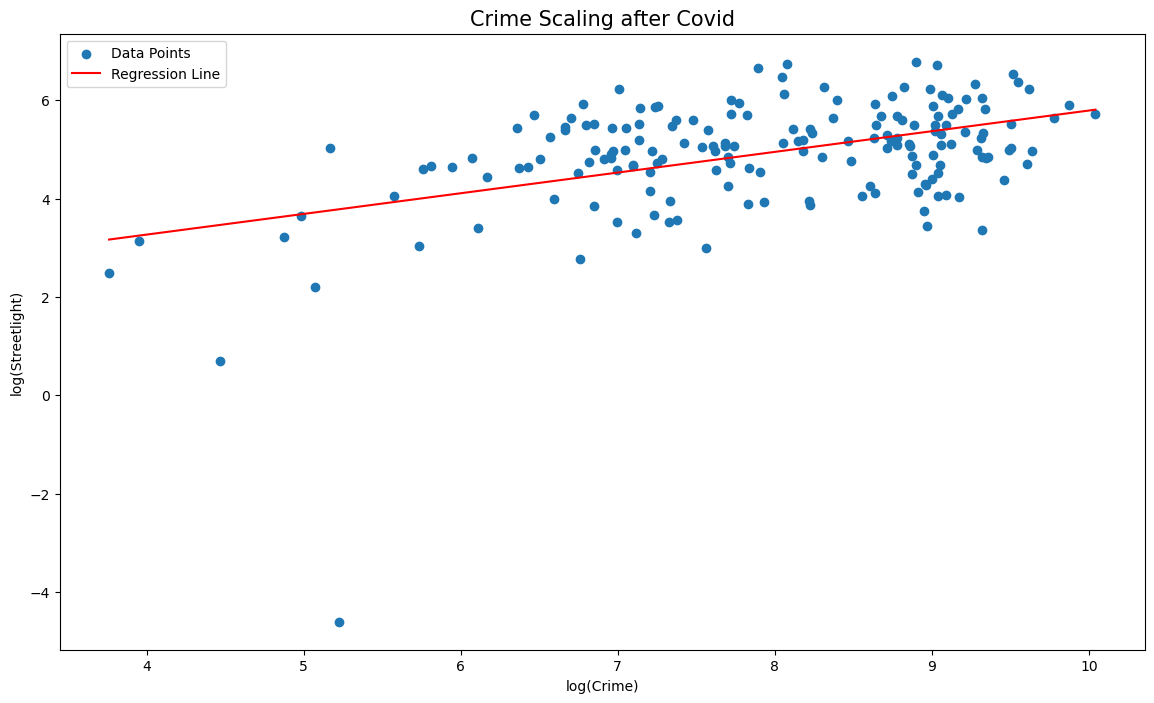

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define and fit the OLS regression model
lmCrime2 = smf.ols('logStrlight2 ~ logCrime2', data=dataLog).fit()

# Visualization
plt.figure(figsize=(14, 8))
plt.scatter(dataLog['logCrime2'], dataLog['logStrlight2'], label='Data Points')  # Display data points
plt.title('Crime Scaling after Covid', fontsize=15)
plt.xlabel('log(Crime)')
plt.ylabel('log(Streetlight)')

# Generate predicted values for the regression line
x_values = np.linspace(dataLog['logCrime2'].min(), dataLog['logCrime2'].max(), 100)  # 100 points across the range of logCrime2
y_values = lmCrime2.predict({'logCrime2': x_values})

# Add the regression line
plt.plot(x_values, y_values, '-r', label='Regression Line')  # Draw the regression line

plt.legend()  # Display legend
plt.show()

In [85]:
lmCrime2.conf_int(alpha=0.05) # 95% CI

0         1
Intercept  0.586930  2.583007
logCrime2  0.295881  0.545044

In [87]:
correlation_before = before_covid['prestreetlight'].corr(before_covid['precrime'])
print("Before COVID Correlation:", correlation_before)

correlation_after = after_covid['poststreetlight'].corr(after_covid['postcrime'])
print("After COVID Correlation:", correlation_after)

Before COVID Correlation: 0.11670675552252127
After COVID Correlation: 0.26631491999168244


## Top 10 Crimes Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
!pip install geopandas 

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

In [2]:
streetlight = pd.read_csv('311_Service_Requests_from_2010_to_Present_20231125.csv')

In [3]:
streetlight

Unique Key   Created Date    Closed Date Agency  \
0          54725341    7/8/22 8:46    7/8/22 8:46    DOT   
1          54725342    7/8/22 9:10    7/8/22 9:10    DOT   
2          15635587   1/1/10 17:47   1/4/10 23:00    DOT   
3          15635588   1/1/10 22:03   1/5/10 15:06    DOT   
4          15635866   1/1/10 12:24    1/4/10 8:20    DOT   
...             ...            ...            ...    ...   
1048570    36465617  6/16/17 14:13  6/16/17 17:30    DOT   
1048571    36465670  6/16/17 12:58  6/28/17 11:47    DOT   
1048572    36465691  6/16/17 10:05  6/16/17 10:05    DOT   
1048573    36465692  6/16/17 12:57  6/16/17 14:38    DOT   
1048574    36465776   6/16/17 8:47   6/16/17 8:47    DOT   

                          Agency Name            Complaint Type  \
0        Department of Transportation    Street Light Condition   
1        Department of Transportation    Street Light Condition   
2        Department of Transportation    Street Light Condition   
3        Department of Transportation    Street Light Condition   
4        Department of Transportation    Street Light Condition   
...                               ...                       ...   
1048570  Department of Transportation  Traffic Signal Condition   
1048571  Department of Transportation    Street Light Condition   
1048572  Department of Transportation    Street Light Condition   
1048573  Department of Transportation  Traffic Signal Condition   
1048574  Department of Transportation    Street Light Condition   

                            Descriptor  Location Type  Incident Zip  \
0          Fixture/Luminaire Door Open            NaN       10472.0   
1            Fixture/Luminaire Hanging            NaN           NaN   
2                     Street Light Out            NaN       10032.0   
3                     Lamppost Missing            NaN           NaN   
4                Lamppost Wire Exposed            NaN       11414.0   
...                                ...            ...           ...   
1048570                 Vehicle Signal            NaN           NaN   
1048571      Fixture/Luminaire Missing            NaN           NaN   
1048572  Lamppost Base Door/Cover Open            NaN       11358.0   
1048573                     Controller            NaN           NaN   
1048574               Street Light Out            NaN           NaN   

             Incident Address  ... Vehicle Type Taxi Company Borough  \
0                         NaN  ...          NaN                  NaN   
1           BKLYN QUEENS EXPY  ...          NaN                  NaN   
2        76 ST NICHOLAS PLACE  ...          NaN                  NaN   
3                  40 30 ST E  ...          NaN                  NaN   
4                         NaN  ...          NaN                  NaN   
...                       ...  ...          ...                  ...   
1048570                   NaN  ...          NaN                  NaN   
1048571          GOWANUS EXPY  ...          NaN                  NaN   
1048572                   NaN  ...          NaN                  NaN   
1048573                   NaN  ...          NaN                  NaN   
1048574    GRAND CENTRAL PKWY  ...          NaN                  NaN   

        Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction  \
0                         NaN                 NaN                      NaN   
1                         NaN                 NaN                      NaN   
2                         NaN                 NaN                      NaN   
3                         NaN                 NaN                      NaN   
4                         NaN                 NaN                      NaN   
...                       ...                 ...                      ...   
1048570                   NaN                 NaN                      NaN   
1048571                   NaN                 NaN                      NaN   
1048572                   NaN                 NaN              

In [4]:
boroughs = gpd.read_file('Borough Boundaries.geojson')

In [5]:
crime_data = pd.read_csv('NYPD_data.csv')

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_7266/1487368918.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('NYPD_data.csv')


In [6]:
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         10600119   01/01/2002     11:00:00   02/25/2006     11:00:00   
1         11052575   04/22/2005     02:00:00          NaN       (null)   
2         10832306   07/11/2005     20:00:00   03/29/2006     12:00:00   
3         10107192   10/19/2005     20:30:00          NaN       (null)   
4         23893731   12/04/2005     09:00:00   08/09/2006     17:00:00   
...            ...          ...          ...          ...          ...   
8353044  261171983   12/30/2022     12:31:00          NaN       (null)   
8353045  261175492   12/31/2022     11:56:00   12/31/2022     17:08:00   
8353046  261147482   12/30/2022     17:20:00   12/30/2022     17:28:00   
8353047  261179651   12/31/2022     20:20:00   12/31/2022     20:26:00   
8353048  261157928   12/31/2022     04:00:00          NaN       (null)   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0                NaN  03/06/2006    104                            RAPE   
1                NaN  04/22/2006    110  GRAND LARCENY OF MOTOR VEHICLE   
2                NaN  03/29/2006    353   UNAUTHORIZED USE OF A VEHICLE   
3                NaN  01/13/2006    126         MISCELLANEOUS PENAL LAW   
4                NaN  08/09/2006    109                   GRAND LARCENY   
...              ...         ...    ...                             ...   
8353044        106.0  12/31/2022    341                   PETIT LARCENY   
8353045         44.0  12/31/2022    359  OFFENSES AGAINST PUBLIC ADMINI   
8353046         17.0  12/30/2022    344    ASSAULT 3 & RELATED OFFENSES   
8353047        112.0  12/31/2022    348        VEHICLE AND TRAFFIC LAWS   
8353048         52.0  12/31/2022    106                  FELONY ASSAULT   

         PD_CD  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        157.0  ...        M              NaN        NaN        NaN   
1        441.0  ...   (null)              NaN        NaN        NaN   
2        462.0  ...        M              NaN        NaN        NaN   
3        461.0  ...        F              NaN        NaN        NaN   
4        405.0  ...   (null)              NaN        NaN        NaN   
...        ...  ...      ...              ...        ...        ...   
8353044  349.0  ...        U              NaN  40.675259 -73.854501   
8353045  759.0  ...        F              NaN  40.829632 -73.915209   
8353046  101.0  ...        M              NaN  40.761265 -73.968887   
8353047  916.0  ...   (null)              NaN  40.725681 -73.857270   
8353048  109.0  ...        M              NaN  40.870942 -73.891499   

                             Lat_Lon               PATROL_BORO STATION_NAME  \
0                                NaN                    (null)       (null)   
1                                NaN                    (null)       (null)   
2                                NaN                    (null)       (null)   
3                                NaN                    (null)       (null)   
4                                NaN                    (null)       (null)   
...                              ...                       ...          ...   
8353044  (40.67525903, -73.85450113)  PATROL BORO QUEENS SOUTH       (null)   
8353045      (40.829632, -73.915209)         PATROL BORO BRONX       (null)   
8353046      (40.761265, -73.968887)     PATROL BORO MAN SOUTH       (null)   
8353047   (40.72568117, -73.8572701)  PATROL BORO QUEENS NORTH       (null)   
8353048      (40.870942, -73.891499)         PATROL BORO BRONX       (null)   

         VIC_AGE_GROUP                  VIC_RACE VIC_SEX  
0                18-24                     WHITE       F  
1                25-44                     BLACK       M  
2                45-64                     WHITE       M  
3                25-44                     BLACK       F  
4                25-44                     WHITE       F  
...                ...                       ...     ...  
835

In [7]:
crime_data = crime_data.dropna()

In [8]:
crime_data['CMPLNT_FR_DT'] = pd.to_datetime(crime_data['CMPLNT_FR_DT'], errors='coerce')

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_7266/2129875780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['CMPLNT_FR_DT'] = pd.to_datetime(crime_data['CMPLNT_FR_DT'], errors='coerce')


In [9]:
crime_data_subset = crime_data[crime_data['CMPLNT_FR_DT'].dt.year.isin([2018, 2019, 2020, 2021])]

In [10]:
crime_data_subset

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
6038687  173169557   2018-01-01     05:00:00   01/01/2018     05:20:00   
6038744  173144889   2018-01-01     01:00:00   01/01/2018     07:56:00   
6038812  173262076   2018-01-01     00:15:00   01/01/2018     00:20:00   
6039496  173151514   2018-01-01     23:50:00   01/02/2018     00:00:00   
6039664  173175271   2018-01-01     14:00:00   01/01/2018     14:00:00   
...            ...          ...          ...          ...          ...   
7832939  238492658   2021-12-31     20:40:00   12/31/2021     20:49:00   
7832959  238428255   2021-12-29     23:20:00   12/29/2021     23:30:00   
7833066  238480034   2021-12-30     12:15:00   12/30/2021     13:00:00   
7833071  238413583   2021-12-28     12:45:00   12/28/2021     12:51:00   
7833127  238439870   2021-12-30     02:15:00   12/30/2021     02:20:00   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
6038687          1.0  01/02/2018    578                   HARRASSMENT 2   
6038744         60.0  01/01/2018    232   POSSESSION OF STOLEN PROPERTY   
6038812         78.0  01/01/2018    341                   PETIT LARCENY   
6039496         14.0  01/02/2018    340                          FRAUDS   
6039664         25.0  01/01/2018    113                         FORGERY   
...              ...         ...    ...                             ...   
7832939        108.0  12/31/2021    109                   GRAND LARCENY   
7832959         14.0  12/30/2021    109                   GRAND LARCENY   
7833066         81.0  12/30/2021    578                   HARRASSMENT 2   
7833071         90.0  12/29/2021    236               DANGEROUS WEAPONS   
7833127         13.0  12/30/2021    121  CRIMINAL MISCHIEF & RELATED OF   

         PD_CD  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
6038687  637.0  ...        M              2.0  40.720442 -74.006744   
6038744  490.0  ...        M             34.0  40.576646 -73.976480   
6038812  339.0  ...   (null)             32.0  40.680786 -73.974475   
6039496  707.0  ...        M              1.0  40.753533 -73.994537   
6039664  729.0  ...        M              4.0  40.800930 -73.941098   
...        ...  ...      ...              ...        ...        ...   
7832939  439.0  ...        U             20.0  40.748916 -73.937397   
7832959  439.0  ...        U              2.0  40.749788 -73.987769   
7833066  637.0  ...        M             33.0  40.678871 -73.921646   
7833071  782.0  ...   (null)             33.0  40.708426 -73.957904   
7833127  269.0  ...        M              4.0  40.743324 -73.984074   

                                       Lat_Lon               PATROL_BORO  \
6038687  (40.7204418884676, -74.0067439741913)     PATROL BORO MAN SOUTH   
6038744  (40.5766459780433, -73.9764803960699)   PATROL BORO BKLYN SOUTH   
6038812  (40.6807856126343, -73.9744751162161)   PATROL BORO BKLYN SOUTH   
6039496  (40.7535327012632, -73.9945368920152)     PATROL BORO MAN SOUTH   
6039664  (40.8009303727402, -73.9410982410066)     PATROL BORO MAN NORTH   
...                                        ...                       ...   
7832939            (40.74891559, -73.93739654)  PATROL BORO QUEENS NORTH   
7832959            (40.74978831, -73.98776859)     PATROL BORO MAN SOUTH   
7833066             (40.67887059, -73.9216458)   PATROL BORO BKLYN NORTH   
7833071            (40.70842603, -73.95790377)   PATROL BORO BKLYN NORTH   
7833127            (40.74332398, -73.98407437)     PATROL BORO MAN SOUTH   

                          STATION_NAME  VIC_AGE_GROUP  \
6038687                  BOWLING GREEN          25-44   
6038744  STILLWELL AVENUE-CONEY ISLAND          25-44   
6038812                ATLANTIC AVENUE          25-44   
6039496            42 ST.-TIMES SQUARE        UNKNOWN   
6039664                     125 STREET        UNKNOWN   
...                                ...            ...   
7832939                   QUEENS PLAZA          18-24

In [11]:
crime_data_subset.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

### 2018-2019

In [12]:
crime_data_subset_2018_2019 = crime_data_subset[crime_data_subset['CMPLNT_FR_DT'].dt.year.isin([2018, 2019])]


In [13]:
crime_data_subset_2018_2019

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
6038687  173169557   2018-01-01     05:00:00   01/01/2018     05:20:00   
6038744  173144889   2018-01-01     01:00:00   01/01/2018     07:56:00   
6038812  173262076   2018-01-01     00:15:00   01/01/2018     00:20:00   
6039496  173151514   2018-01-01     23:50:00   01/02/2018     00:00:00   
6039664  173175271   2018-01-01     14:00:00   01/01/2018     14:00:00   
...            ...          ...          ...          ...          ...   
6978364  206889363   2019-12-31     17:20:00   12/31/2019     17:25:00   
6978437  207611416   2019-12-31     12:43:00   12/31/2019     12:51:00   
6979247  206878546   2019-12-29     02:00:00   12/29/2019     03:30:00   
6979331  206871344   2019-12-29     04:00:00   12/29/2019     06:00:00   
6979545  206881102   2019-12-30     21:00:00   12/30/2019     21:05:00   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
6038687          1.0  01/02/2018    578                   HARRASSMENT 2   
6038744         60.0  01/01/2018    232   POSSESSION OF STOLEN PROPERTY   
6038812         78.0  01/01/2018    341                   PETIT LARCENY   
6039496         14.0  01/02/2018    340                          FRAUDS   
6039664         25.0  01/01/2018    113                         FORGERY   
...              ...         ...    ...                             ...   
6978364         52.0  12/31/2019    578                   HARRASSMENT 2   
6978437          1.0  01/08/2020    121  CRIMINAL MISCHIEF & RELATED OF   
6979247        112.0  12/29/2019    341                   PETIT LARCENY   
6979331         81.0  12/29/2019    109                   GRAND LARCENY   
6979545         70.0  12/30/2019    109                   GRAND LARCENY   

         PD_CD  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
6038687  637.0  ...        M              2.0  40.720442 -74.006744   
6038744  490.0  ...        M             34.0  40.576646 -73.976480   
6038812  339.0  ...   (null)             32.0  40.680786 -73.974475   
6039496  707.0  ...        M              1.0  40.753533 -73.994537   
6039664  729.0  ...        M              4.0  40.800930 -73.941098   
...        ...  ...      ...              ...        ...        ...   
6978364  637.0  ...        F             12.0  40.869470 -73.879861   
6978437  273.0  ...   (null)              2.0  40.720442 -74.006744   
6979247  339.0  ...        U             20.0  40.722641 -73.851542   
6979331  408.0  ...   (null)             33.0  40.689464 -73.924029   
6979545  417.0  ...        M             32.0  40.630600 -73.973705   

                                       Lat_Lon               PATROL_BORO  \
6038687  (40.7204418884676, -74.0067439741913)     PATROL BORO MAN SOUTH   
6038744  (40.5766459780433, -73.9764803960699)   PATROL BORO BKLYN SOUTH   
6038812  (40.6807856126343, -73.9744751162161)   PATROL BORO BKLYN SOUTH   
6039496  (40.7535327012632, -73.9945368920152)     PATROL BORO MAN SOUTH   
6039664  (40.8009303727402, -73.9410982410066)     PATROL BORO MAN NORTH   
...                                        ...                       ...   
6978364  (40.8694704770483, -73.8798608037303)         PATROL BORO BRONX   
6978437  (40.7204418884676, -74.0067439741913)     PATROL BORO MAN SOUTH   
6979247  (40.7226409964758, -73.8515418216779)  PATROL BORO QUEENS NORTH   
6979331  (40.6894642952604, -73.9240290899499)   PATROL BORO BKLYN NORTH   
6979545  (40.6305998504358, -73.9737053160275)   PATROL BORO BKLYN SOUTH   

                           STATION_NAME  VIC_AGE_GROUP        VIC_RACE VIC_SEX  
6038687                   BOWLING GREEN          25-44           BLACK       F  
6038744   STILLWELL AVENUE-CONEY ISLAND          25-44  WHITE HISPANIC       M  
6038812                 ATLANTIC AVENUE          25-44           WHITE       M  
6039496             42 ST.-TIMES SQUARE        UNKNOWN         UNKNOWN       E  
6039664                      125 STREET        

In [14]:

# Select columns 'VIC_RACE' and 'OFNS_DESC'
columns_of_interest = ['VIC_RACE', 'OFNS_DESC']
crime_data_subset_2018_2019_filtered = crime_data_subset_2018_2019[columns_of_interest]

# Group by 'VIC_RACE' and 'OFNS_DESC', and count the number of occurrences
crime_data_subset_2018_2019_grouped = crime_data_subset_2018_2019_filtered.groupby(['VIC_RACE', 'OFNS_DESC']).size().reset_index(name='Count of Crimes')
crime_data_subset_2018_2019_grouped = crime_data_subset_2018_2019_grouped[crime_data_subset_2018_2019_grouped.index != 'UNKNOWN']

# Print the results
print(crime_data_subset_2018_2019_grouped)

                           VIC_RACE                       OFNS_DESC  \
0    AMERICAN INDIAN/ALASKAN NATIVE    ASSAULT 3 & RELATED OFFENSES   
1    AMERICAN INDIAN/ALASKAN NATIVE  CRIMINAL MISCHIEF & RELATED OF   
2    AMERICAN INDIAN/ALASKAN NATIVE                  FELONY ASSAULT   
3    AMERICAN INDIAN/ALASKAN NATIVE                   GRAND LARCENY   
4    AMERICAN INDIAN/ALASKAN NATIVE                   HARRASSMENT 2   
..                              ...                             ...   
146                  WHITE HISPANIC                   PETIT LARCENY   
147                  WHITE HISPANIC   POSSESSION OF STOLEN PROPERTY   
148                  WHITE HISPANIC                            RAPE   
149                  WHITE HISPANIC                         ROBBERY   
150                  WHITE HISPANIC                      SEX CRIMES   

     Count of Crimes  
0                 14  
1                  1  
2                  3  
3                 20  
4                 14  
..       

In [15]:
# Sort by 'Count of Crimes' in descending order
top_crimes_2018_2019 = crime_data_subset_2018_2019_grouped.sort_values(by='Count of Crimes', ascending=False)

# Exclude data with 'UNKNOWN' victim race
top_crimes_2018_2019_filtered = top_crimes_2018_2019[top_crimes_2018_2019['VIC_RACE'] != 'UNKNOWN']

# Select the top 10 crime types
top_crimes_2018_2019_filtered = top_crimes_2018_2019_filtered.head(20)

# Print the results
print(top_crimes_2018_2019_filtered)

                     VIC_RACE                     OFNS_DESC  Count of Crimes
32                      BLACK  ASSAULT 3 & RELATED OFFENSES              910
115                     WHITE                 GRAND LARCENY              838
43                      BLACK                 HARRASSMENT 2              779
129            WHITE HISPANIC  ASSAULT 3 & RELATED OFFENSES              734
42                      BLACK                 GRAND LARCENY              715
139            WHITE HISPANIC                 GRAND LARCENY              701
106                     WHITE  ASSAULT 3 & RELATED OFFENSES              586
116                     WHITE                 HARRASSMENT 2              514
19   ASIAN / PACIFIC ISLANDER                 GRAND LARCENY              486
51                      BLACK                 PETIT LARCENY              481
140            WHITE HISPANIC                 HARRASSMENT 2              399
149            WHITE HISPANIC                       ROBBERY              328

In [16]:
# Define a function to strip whitespace
def strip_whitespace(x):
    return x.strip() if isinstance(x, str) else x

# Remove whitespace in the 'VIC_RACE' column
crime_data_subset_2018_2019_grouped['VIC_RACE'] = crime_data_subset_2018_2019_grouped['VIC_RACE'].apply(strip_whitespace)

# Create an empty list to store top crimes
top_crimes_by_race = []

# List of racial groups
racial_groups = ['BLACK', 'ASIAN / PACIFIC ISLANDER', 'WHITE', 'WHITE HISPANIC']

# Iterate over each racial group
for race in racial_groups:
    # Extract data for the current race
    data_subset = crime_data_subset_2018_2019_grouped[crime_data_subset_2018_2019_grouped['VIC_RACE'] == race]
    # Select top 20 crimes based on 'Count of Crimes'
    top_10_crimes = data_subset.nlargest(10, 'Count of Crimes')
    # Add the results to the list
    top_crimes_by_race.append(top_10_crimes)

# Combine the list into a single dictionary
top_crimes_dict_by_race = {race: crimes for race, crimes in zip(racial_groups, top_crimes_by_race)}

# Print the results
for race, top_crimes in top_crimes_dict_by_race.items():
    print(f"\nTop 10 Crimes for {race}:\n{top_crimes[['VIC_RACE', 'OFNS_DESC', 'Count of Crimes']]}")


Top 10 Crimes for BLACK:
   VIC_RACE                      OFNS_DESC  Count of Crimes
32    BLACK   ASSAULT 3 & RELATED OFFENSES              910
43    BLACK                  HARRASSMENT 2              779
42    BLACK                  GRAND LARCENY              715
51    BLACK                  PETIT LARCENY              481
55    BLACK                        ROBBERY              253
56    BLACK                     SEX CRIMES              240
38    BLACK                 FELONY ASSAULT              237
47    BLACK  OFF. AGNST PUB ORD SENSBLTY &              129
46    BLACK        MISCELLANEOUS PENAL LAW               42
36    BLACK              DANGEROUS WEAPONS               40

Top 10 Crimes for ASIAN / PACIFIC ISLANDER:
                    VIC_RACE                       OFNS_DESC  Count of Crimes
19  ASIAN / PACIFIC ISLANDER                   GRAND LARCENY              486
20  ASIAN / PACIFIC ISLANDER                   HARRASSMENT 2              216
12  ASIAN / PACIFIC ISLANDER    ASS

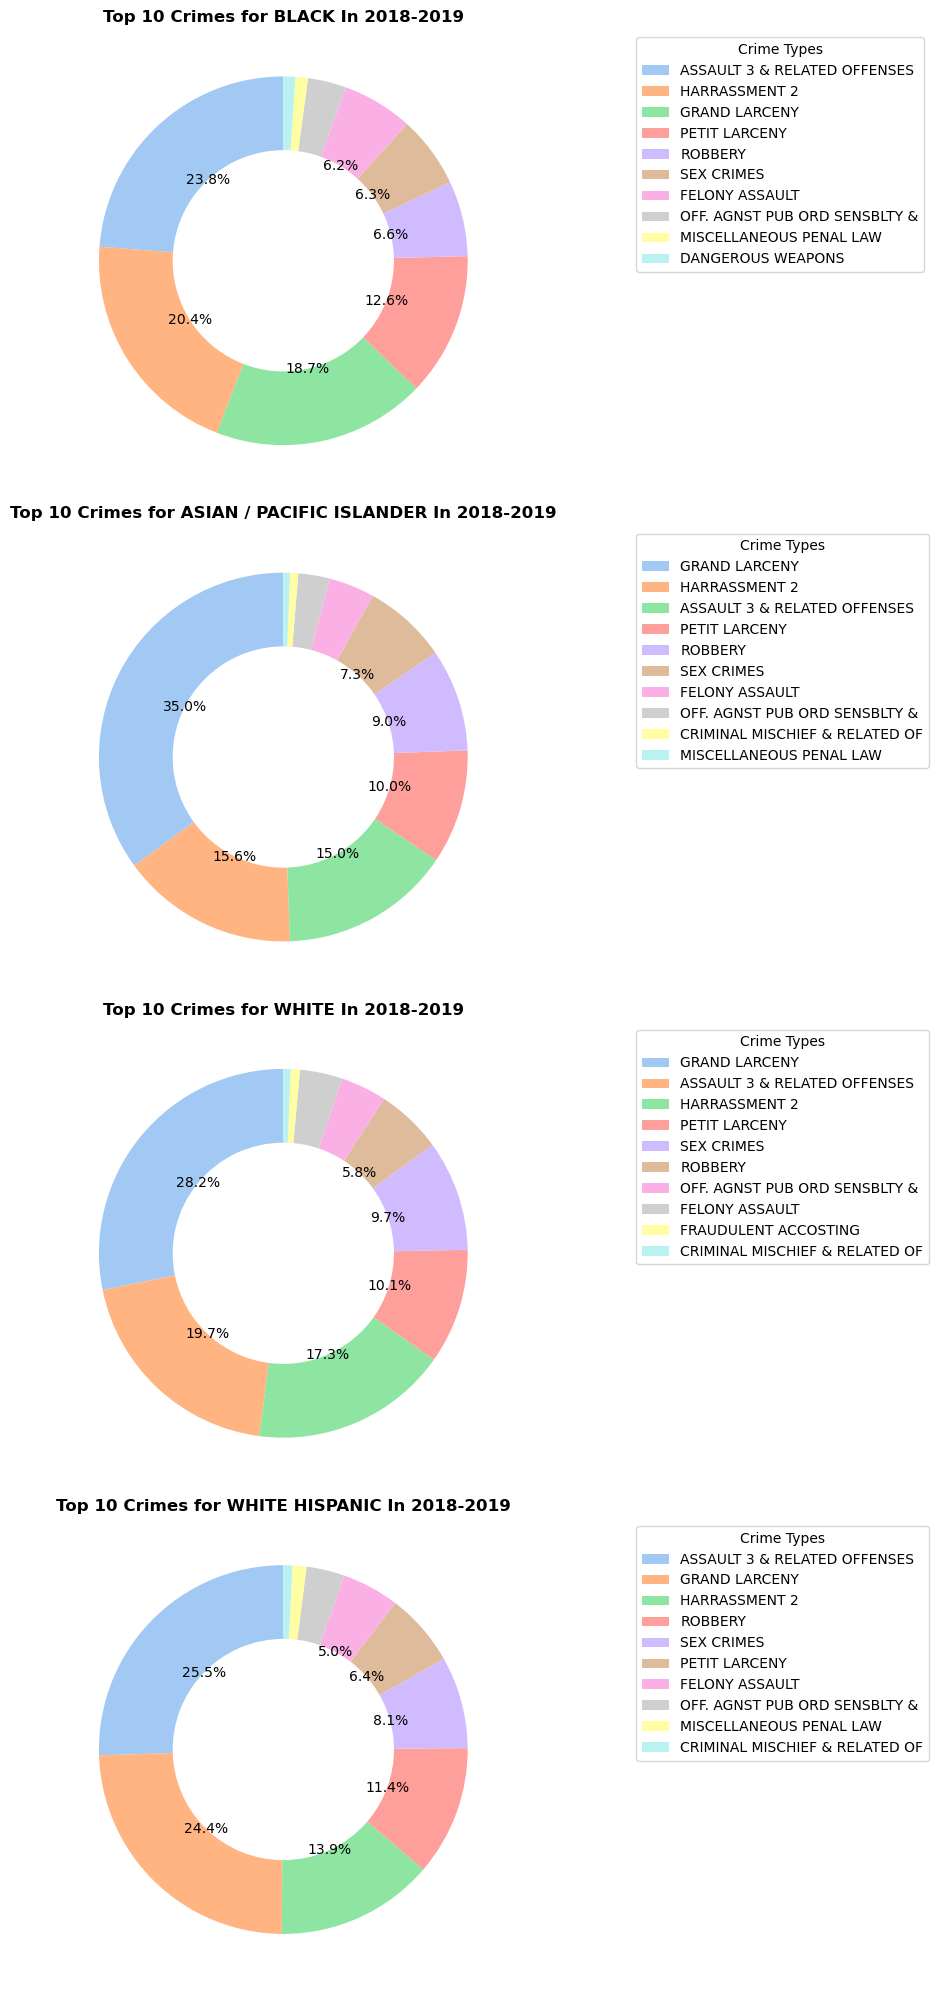

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))  
sns.set_palette("pastel")

for i, race in enumerate(racial_groups, 1):
    plt.subplot(len(racial_groups), 1, i)  
    subset = top_crimes_dict_by_race[race]
    plt.pie(subset['Count of Crimes'],autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '', startangle=90, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.4))
    plt.title(f'Top 10 Crimes for {race} In 2018-2019',fontweight='bold')

  
    plt.legend(subset['OFNS_DESC'], title="Crime Types", loc="upper left", bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

### more categories 

In [18]:

    # Select columns VIC_RACE, OFNS_DESC,VIC_SEX,Latitude,Longitude
#columns_of_interest = ['VIC_RACE', 'OFNS_DESC','STATION_NAME','VIC_SEX','Latitude','Longitude']
#crime_data_subset_2018_2019_filtered2 = crime_data_subset_2018_2019[columns_of_interest]

    # Group by 'VIC_RACE' and 'OFNS_DESC', and count the number of occurrences
#crime_data_subset_2018_2019_grouped2 = crime_data_subset_2018_2019_filtered2.groupby(['VIC_RACE', 'OFNS_DESC','STATION_NAME','VIC_SEX','Latitude','Longitude']).size().reset_index(name='Count of Crimes')
#crime_data_subset_2018_2019_grouped2 = crime_data_subset_2018_2019_grouped2[crime_data_subset_2018_2019_grouped2.index != 'UNKNOWN']

    # Print the results
#print(crime_data_subset_2018_2019_grouped2)

### 2020-2021

In [19]:
crime_data_subset_2020_2021 = crime_data_subset[crime_data_subset['CMPLNT_FR_DT'].dt.year.isin([2020, 2021])]


In [20]:
# Select columns related to 'Race' and 'Crime Type'.
columns_of_interest = ['VIC_RACE', 'OFNS_DESC']
crime_data_subset_2020_2021_filtered = crime_data_subset_2020_2021[columns_of_interest]

# Group the data by 'Race' and 'Crime Type' and calculate the count of crimes for each group.
crime_by_race_2020_2021_grouped = crime_data_subset_2020_2021_filtered.groupby(['VIC_RACE', 'OFNS_DESC']).size().reset_index(name='Count of Crimes')

# Exclude 'UNKNOWN' entries from the results.
crime_by_race_2020_2021_grouped = crime_by_race_2020_2021_grouped[crime_by_race_2020_2021_grouped.index != 'UNKNOWN']
# Print the results.
print(crime_by_race_2020_2021_grouped)

                           VIC_RACE                      OFNS_DESC  \
0    AMERICAN INDIAN/ALASKAN NATIVE   ASSAULT 3 & RELATED OFFENSES   
1    AMERICAN INDIAN/ALASKAN NATIVE                 FELONY ASSAULT   
2    AMERICAN INDIAN/ALASKAN NATIVE                  GRAND LARCENY   
3    AMERICAN INDIAN/ALASKAN NATIVE                  HARRASSMENT 2   
4    AMERICAN INDIAN/ALASKAN NATIVE        MISCELLANEOUS PENAL LAW   
..                              ...                            ...   
140                  WHITE HISPANIC  POSSESSION OF STOLEN PROPERTY   
141                  WHITE HISPANIC                           RAPE   
142                  WHITE HISPANIC                        ROBBERY   
143                  WHITE HISPANIC                     SEX CRIMES   
144                  WHITE HISPANIC              THEFT OF SERVICES   

     Count of Crimes  
0                 11  
1                  2  
2                  6  
3                 11  
4                  1  
..               ... 

In [21]:
# Define a function to strip whitespace.
def strip_whitespace(x):
    return x.strip() if isinstance(x, str) else x

# Remove whitespace from the 'VIC_RACE' column.
crime_by_race_2020_2021_grouped['VIC_RACE'] = crime_by_race_2020_2021_grouped['VIC_RACE'].apply(strip_whitespace)

# Create an empty list to store the top crimes.
top_crimes_by_race = []

# List of racial groups.
racial_groups = ['BLACK', 'ASIAN / PACIFIC ISLANDER', 'WHITE', 'WHITE HISPANIC']

# Iterate over each racial group.
for race in racial_groups:
    # Extract data for the current racial group.
    data_subset = crime_by_race_2020_2021_grouped[crime_by_race_2020_2021_grouped['VIC_RACE'] == race]
    # Select the top 20 crimes based on 'Count of Crimes'.
    top_10_crimes = data_subset.nlargest(10, 'Count of Crimes')
    # Add the results to the list.
    top_crimes_by_race.append(top_10_crimes)

# Combine the list into a single dictionary.
top_crimes_dict_by_race = {race: crimes for race, crimes in zip(racial_groups, top_crimes_by_race)}

# Print the results.
for race, top_crimes in top_crimes_dict_by_race.items():
    print(f"\nTop 10 Crimes for {race}:\n{top_crimes[['VIC_RACE', 'OFNS_DESC', 'Count of Crimes']]}")







Top 10 Crimes for BLACK:
   VIC_RACE                      OFNS_DESC  Count of Crimes
39    BLACK                  HARRASSMENT 2              673
28    BLACK   ASSAULT 3 & RELATED OFFENSES              636
38    BLACK                  GRAND LARCENY              365
46    BLACK                  PETIT LARCENY              285
35    BLACK                 FELONY ASSAULT              263
49    BLACK                        ROBBERY              234
50    BLACK                     SEX CRIMES              128
43    BLACK  OFF. AGNST PUB ORD SENSBLTY &               94
42    BLACK        MISCELLANEOUS PENAL LAW               29
34    BLACK              DANGEROUS WEAPONS               28

Top 10 Crimes for ASIAN / PACIFIC ISLANDER:
                    VIC_RACE                       OFNS_DESC  Count of Crimes
9   ASIAN / PACIFIC ISLANDER    ASSAULT 3 & RELATED OFFENSES              242
17  ASIAN / PACIFIC ISLANDER                   HARRASSMENT 2              221
16  ASIAN / PACIFIC ISLANDER       

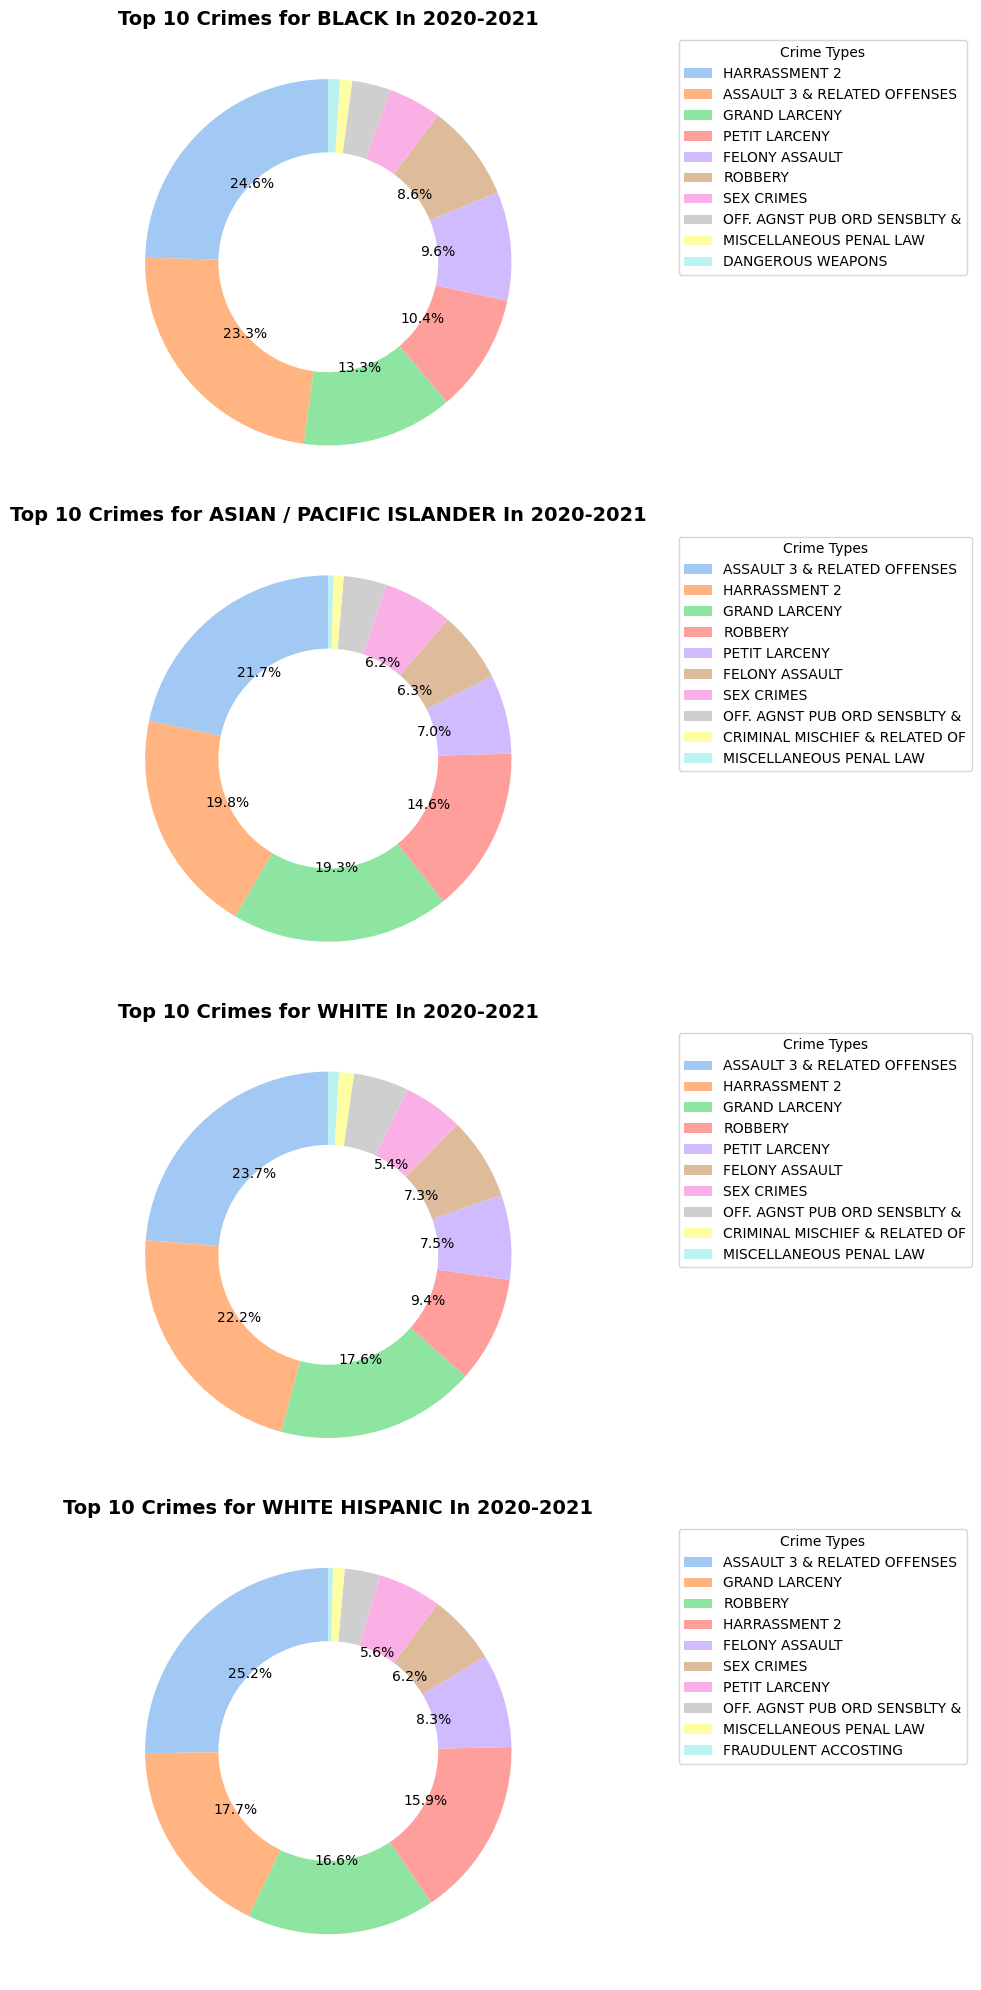

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the size
plt.figure(figsize=(15, 20))  # Adjust the size

# Set the color palette
sns.set_palette("pastel")

# Set up racial_groups and top_crimes_dict_by_race appropriately

for i, race in enumerate(racial_groups, 1):
    # Configure each chart to be displayed one per row
    plt.subplot(len(racial_groups), 1, i)
    subset = top_crimes_dict_by_race[race]
    plt.pie(subset['Count of Crimes'], autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '', startangle=90, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.4))
    plt.title(f'Top 10 Crimes for {race} In 2020-2021', fontsize=14, fontweight='bold')
    
    # Add and adjust the legend
    legend = plt.legend(subset['OFNS_DESC'], title="Crime Types", loc="upper left", bbox_to_anchor=(1.25, 1))
    legend.get_texts()[0].set_fontsize(10)  # Adjust the legend text size

# Adjust the graph layout
plt.tight_layout()

# Display the graph
plt.show()

### more categories 

In [23]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
!pip install geopandas 

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

In [24]:
strlights = pd.read_csv('strlights_cleaned.csv')

In [25]:
boroughs = gpd.read_file('Borough Boundaries.geojson')

In [26]:
crime_data = pd.read_csv('NYPD_data.csv')

/var/folders/87/1x2fw1vj1wj3dhs3_72y_1900000gn/T/ipykernel_7266/1487368918.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('NYPD_data.csv')


In [27]:
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         10600119   01/01/2002     11:00:00   02/25/2006     11:00:00   
1         11052575   04/22/2005     02:00:00          NaN       (null)   
2         10832306   07/11/2005     20:00:00   03/29/2006     12:00:00   
3         10107192   10/19/2005     20:30:00          NaN       (null)   
4         23893731   12/04/2005     09:00:00   08/09/2006     17:00:00   
...            ...          ...          ...          ...          ...   
8353044  261171983   12/30/2022     12:31:00          NaN       (null)   
8353045  261175492   12/31/2022     11:56:00   12/31/2022     17:08:00   
8353046  261147482   12/30/2022     17:20:00   12/30/2022     17:28:00   
8353047  261179651   12/31/2022     20:20:00   12/31/2022     20:26:00   
8353048  261157928   12/31/2022     04:00:00          NaN       (null)   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0                NaN  03/06/2006    104                            RAPE   
1                NaN  04/22/2006    110  GRAND LARCENY OF MOTOR VEHICLE   
2                NaN  03/29/2006    353   UNAUTHORIZED USE OF A VEHICLE   
3                NaN  01/13/2006    126         MISCELLANEOUS PENAL LAW   
4                NaN  08/09/2006    109                   GRAND LARCENY   
...              ...         ...    ...                             ...   
8353044        106.0  12/31/2022    341                   PETIT LARCENY   
8353045         44.0  12/31/2022    359  OFFENSES AGAINST PUBLIC ADMINI   
8353046         17.0  12/30/2022    344    ASSAULT 3 & RELATED OFFENSES   
8353047        112.0  12/31/2022    348        VEHICLE AND TRAFFIC LAWS   
8353048         52.0  12/31/2022    106                  FELONY ASSAULT   

         PD_CD  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        157.0  ...        M              NaN        NaN        NaN   
1        441.0  ...   (null)              NaN        NaN        NaN   
2        462.0  ...        M              NaN        NaN        NaN   
3        461.0  ...        F              NaN        NaN        NaN   
4        405.0  ...   (null)              NaN        NaN        NaN   
...        ...  ...      ...              ...        ...        ...   
8353044  349.0  ...        U              NaN  40.675259 -73.854501   
8353045  759.0  ...        F              NaN  40.829632 -73.915209   
8353046  101.0  ...        M              NaN  40.761265 -73.968887   
8353047  916.0  ...   (null)              NaN  40.725681 -73.857270   
8353048  109.0  ...        M              NaN  40.870942 -73.891499   

                             Lat_Lon               PATROL_BORO STATION_NAME  \
0                                NaN                    (null)       (null)   
1                                NaN                    (null)       (null)   
2                                NaN                    (null)       (null)   
3                                NaN                    (null)       (null)   
4                                NaN                    (null)       (null)   
...                              ...                       ...          ...   
8353044  (40.67525903, -73.85450113)  PATROL BORO QUEENS SOUTH       (null)   
8353045      (40.829632, -73.915209)         PATROL BORO BRONX       (null)   
8353046      (40.761265, -73.968887)     PATROL BORO MAN SOUTH       (null)   
8353047   (40.72568117, -73.8572701)  PATROL BORO QUEENS NORTH       (null)   
8353048      (40.870942, -73.891499)         PATROL BORO BRONX       (null)   

         VIC_AGE_GROUP                  VIC_RACE VIC_SEX  
0                18-24                     WHITE       F  
1                25-44                     BLACK       M  
2                45-64                     WHITE       M  
3                25-44                     BLACK       F  
4                25-44                     WHITE       F  
...                ...                       ...     ...  
835

In [28]:
crime_data['CMPLNT_FR_DT'] = pd.to_datetime(crime_data['CMPLNT_FR_DT'], errors='coerce')

In [29]:
crime_data_subset = crime_data[crime_data['CMPLNT_FR_DT'].dt.year.isin([2018, 2019, 2020, 2021])]

In [30]:
crime_data_subset_2018_2019 = crime_data_subset[crime_data_subset['CMPLNT_FR_DT'].dt.year.isin([2018, 2019])]

In [31]:
crime_data_subset_2020_2021 = crime_data_subset[crime_data_subset['CMPLNT_FR_DT'].dt.year.isin([2020, 2021])]

In [32]:
crime_data_subset_2018_2019_cleaned = crime_data_subset_2018_2019.replace({'VIC_RACE': '(null)', 'OFNS_DESC': '(null)'}, np.nan).dropna(subset=['VIC_RACE', 'OFNS_DESC'])
crime_data_subset_2020_2021_cleaned = crime_data_subset_2020_2021.replace({'VIC_RACE': '(null)', 'OFNS_DESC': '(null)'}, np.nan).dropna(subset=['VIC_RACE', 'OFNS_DESC'])


In [33]:
# 성별에 따른 데이터 분리 및 범죄유형 카운트
male_data_2018_2019 = crime_data_subset_2018_2019_cleaned[crime_data_subset_2018_2019_cleaned['VIC_SEX'] == 'M']
female_data_2018_2019 = crime_data_subset_2018_2019_cleaned[crime_data_subset_2018_2019_cleaned['VIC_SEX'] == 'F']
male_crime_counts = male_data_2018_2019['OFNS_DESC'].value_counts()
female_crime_counts = female_data_2018_2019['OFNS_DESC'].value_counts()


In [34]:
print("Crime Rates for Males 2018-2019:")
print(male_crime_counts)
print("\nCrime Rates for Females 2018-2019:")
print(female_crime_counts)

Crime Rates for Males 2018-2019:
OFNS_DESC
PETIT LARCENY                           56613
HARRASSMENT 2                           50295
ASSAULT 3 & RELATED OFFENSES            48970
GRAND LARCENY                           35387
CRIMINAL MISCHIEF & RELATED OF          30763
FELONY ASSAULT                          22479
ROBBERY                                 16656
OFF. AGNST PUB ORD SENSBLTY &           11436
BURGLARY                                 7830
VEHICLE AND TRAFFIC LAWS                 7314
GRAND LARCENY OF MOTOR VEHICLE           7063
MISCELLANEOUS PENAL LAW                  5502
THEFT-FRAUD                              3335
SEX CRIMES                               2648
OFFENSES AGAINST PUBLIC ADMINI           2392
CRIMINAL TRESPASS                        1550
OTHER OFFENSES RELATED TO THEF           1477
FRAUDS                                   1461
DANGEROUS WEAPONS                        1106
UNAUTHORIZED USE OF A VEHICLE            1032
POSSESSION OF STOLEN PROPERTY        

In [35]:
male_data_2020_2021 = crime_data_subset_2020_2021_cleaned[crime_data_subset_2020_2021_cleaned['VIC_SEX'] == 'M']
female_data_2020_2021 = crime_data_subset_2020_2021_cleaned[crime_data_subset_2020_2021_cleaned['VIC_SEX'] == 'F']
male_crime_counts2 = male_data_2020_2021['OFNS_DESC'].value_counts()
female_crime_counts2 = female_data_2020_2021['OFNS_DESC'].value_counts()


In [36]:
print("Crime Rates for Males 2020-2021:")
print(male_crime_counts2)
print("\nCrime Rates for Females 2020-2021:")
print(female_crime_counts2)

Crime Rates for Males 2020-2021:
OFNS_DESC
PETIT LARCENY                           53618
HARRASSMENT 2                           50447
ASSAULT 3 & RELATED OFFENSES            42595
GRAND LARCENY                           33233
CRIMINAL MISCHIEF & RELATED OF          29773
FELONY ASSAULT                          24250
ROBBERY                                 16140
GRAND LARCENY OF MOTOR VEHICLE          12968
OFF. AGNST PUB ORD SENSBLTY &            9277
VEHICLE AND TRAFFIC LAWS                 9184
BURGLARY                                 8164
MISCELLANEOUS PENAL LAW                  5182
THEFT-FRAUD                              2678
SEX CRIMES                               2135
OFFENSES AGAINST PUBLIC ADMINI           1902
FRAUDS                                   1521
CRIMINAL TRESPASS                        1189
UNAUTHORIZED USE OF A VEHICLE             888
DANGEROUS WEAPONS                         844
MURDER & NON-NEGL. MANSLAUGHTER           798
POSSESSION OF STOLEN PROPERTY        

In [37]:
import pandas as pd

# Calculate the total number of crimes committed by males and females in each period
total_male_crimes_2018_2019 = male_data_2018_2019.shape[0]  # Total crimes by males in 2018-2019
total_female_crimes_2018_2019 = female_data_2018_2019.shape[0]  # Total crimes by females in 2018-2019
total_male_crimes_2020_2021 = male_data_2020_2021.shape[0]  # Total crimes by males in 2020-2021
total_female_crimes_2020_2021 = female_data_2020_2021.shape[0]  # Total crimes by females in 2020-2021

# Create a DataFrame to store this information
total_crimes_df = pd.DataFrame({
    'Period': ['2018-2019', '2018-2019', '2020-2021', '2020-2021'],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Total Crimes': [total_male_crimes_2018_2019, total_female_crimes_2018_2019,
                     total_male_crimes_2020_2021, total_female_crimes_2020_2021]
})

total_crimes_df

Period  Gender  Total Crimes
0  2018-2019    Male        319795
1  2018-2019  Female        366111
2  2020-2021    Male        310808
3  2020-2021  Female        343699

/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jiyuncho/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

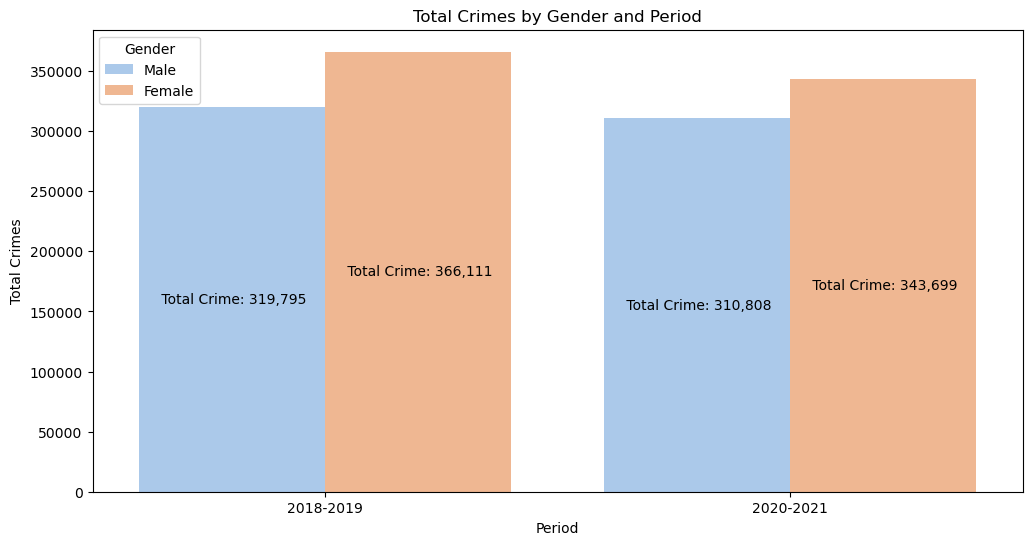

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Period', y='Total Crimes', hue='Gender', data=total_crimes_df)

# Add text in the middle of each bar (with number formatted with commas)
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f' Total Crime: {height:,.0f}', 
                     (p.get_x() + p.get_width() / 2, height / 2), 
                     ha='center', va='center', 
                     xytext=(0, 0), 
                     textcoords='offset points')

plt.title('Total Crimes by Gender and Period')
plt.xlabel('Period')
plt.ylabel('Total Crimes')
plt.show()


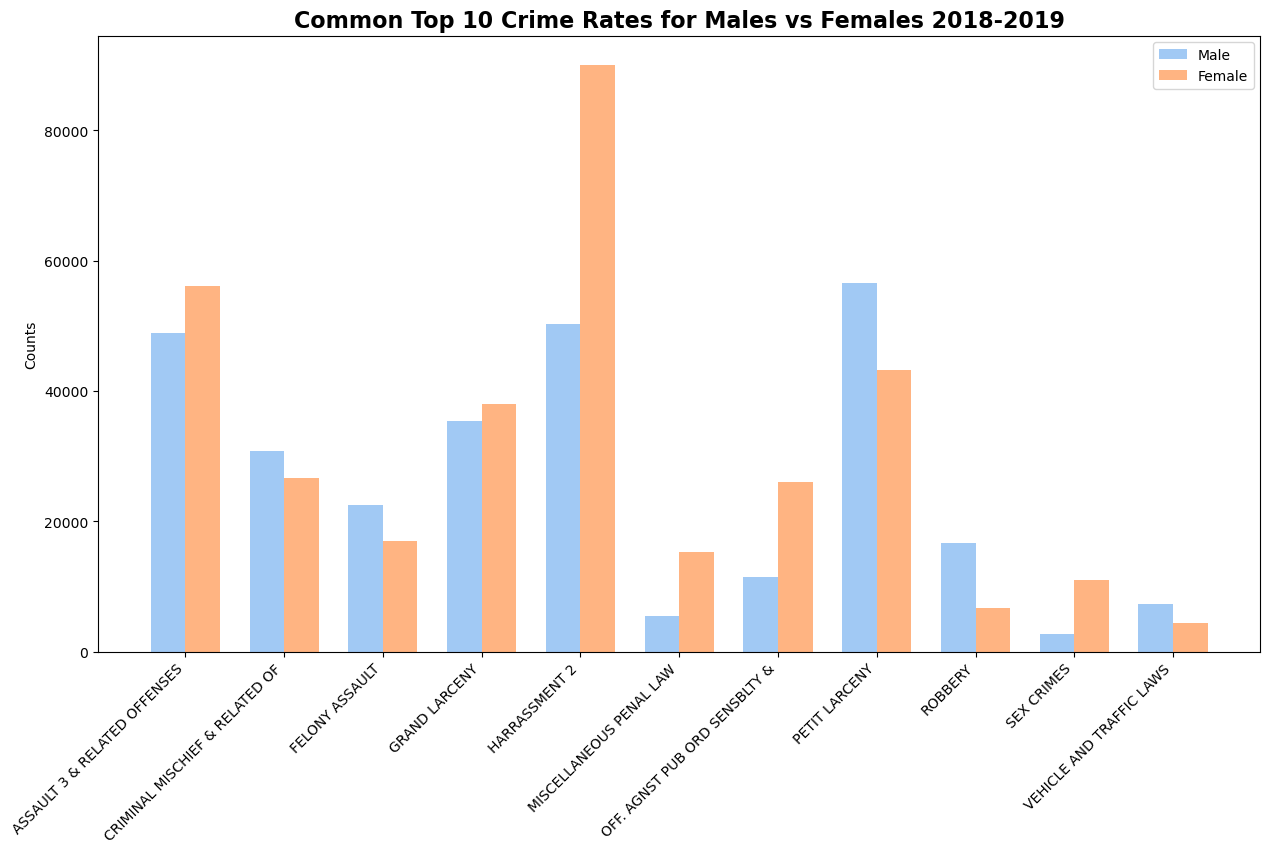

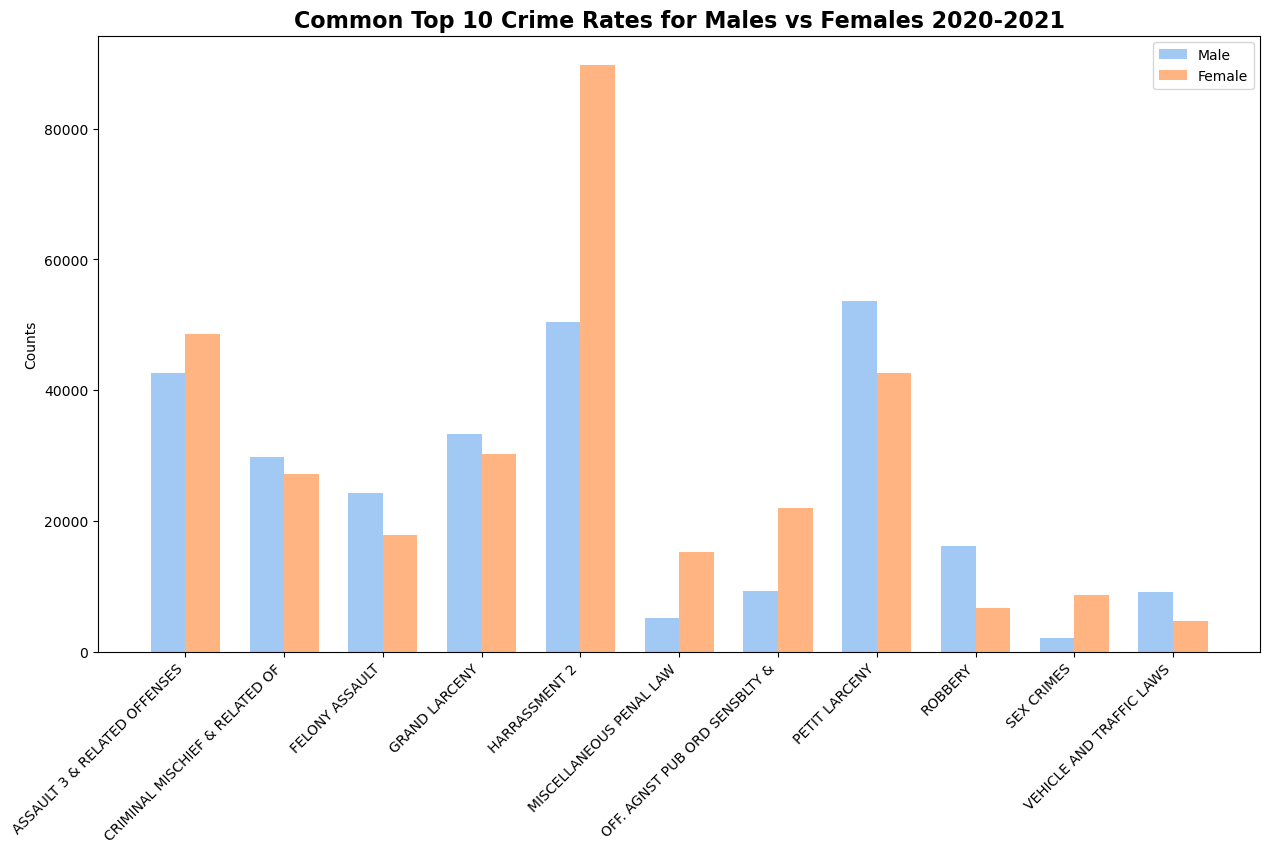

In [39]:
# Determine the common top 10 types of crimes across periods
top_10_crimes_2018_2019 = male_crime_counts.head(10).index.union(female_crime_counts.head(10).index)
top_10_crimes_2020_2021 = male_crime_counts2.head(10).index.union(female_crime_counts2.head(10).index)
common_top_crimes = top_10_crimes_2018_2019.intersection(top_10_crimes_2020_2021)

# Function to visualize crime rates with bar charts
def plot_crimes_with_common_categories(male_counts, female_counts, common_crimes, title):
    # Filter values for males and females based on common crime types
    male_values = male_counts.reindex(common_crimes).fillna(0)
    female_values = female_counts.reindex(common_crimes).fillna(0)

    # Set positions for the bar chart
    x = np.arange(len(common_crimes))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, male_values, width, label='Male')
    rects2 = ax.bar(x + width/2, female_values, width, label='Female')

    # Add title and labels
    ax.set_ylabel('Counts')
    ax.set_title(title,fontsize=16,fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(common_crimes, rotation=45, ha='right')
    ax.legend()

    plt.show()

# Visualize data for 2018-2019
plot_crimes_with_common_categories(male_crime_counts, female_crime_counts, common_top_crimes, 'Common Top 10 Crime Rates for Males vs Females 2018-2019')

# Visualize data for 2020-2021
plot_crimes_with_common_categories(male_crime_counts2, female_crime_counts2, common_top_crimes, 'Common Top 10 Crime Rates for Males vs Females 2020-2021')

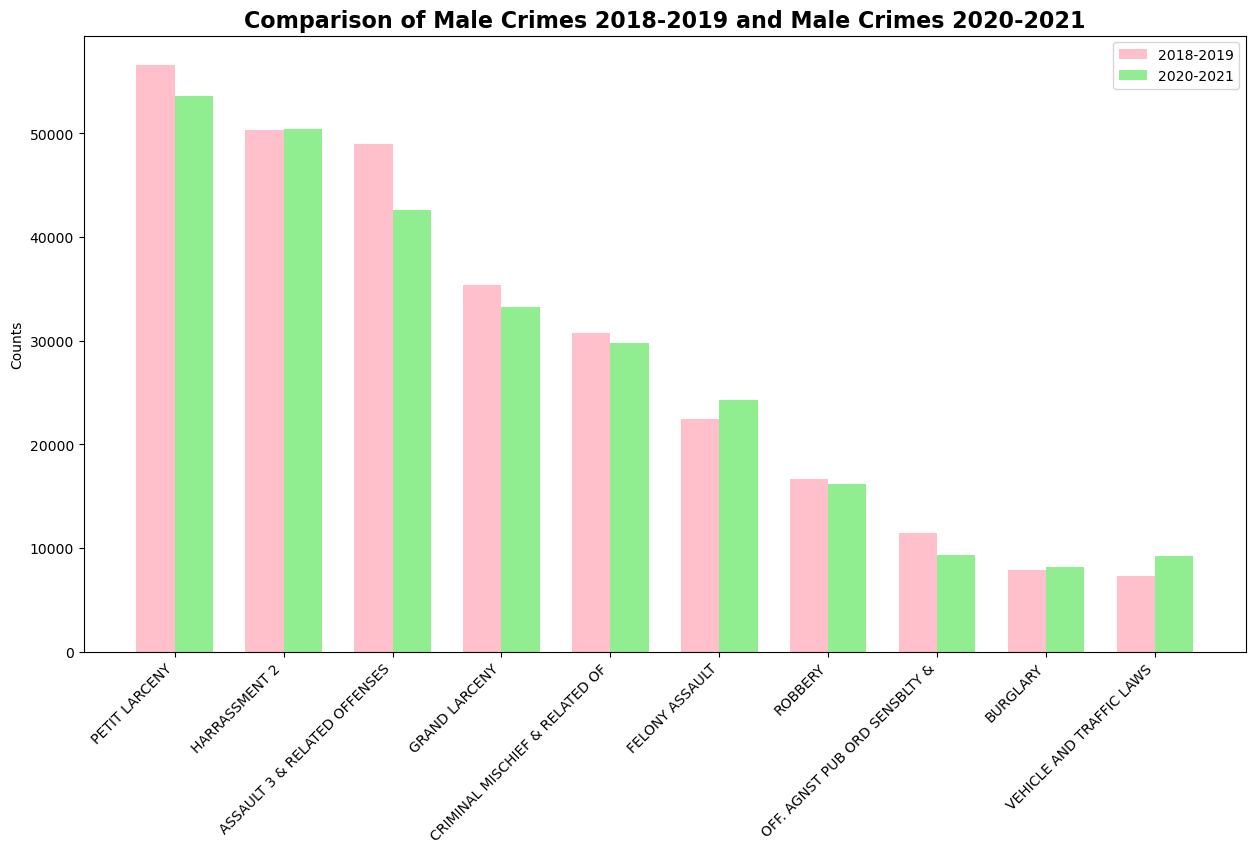

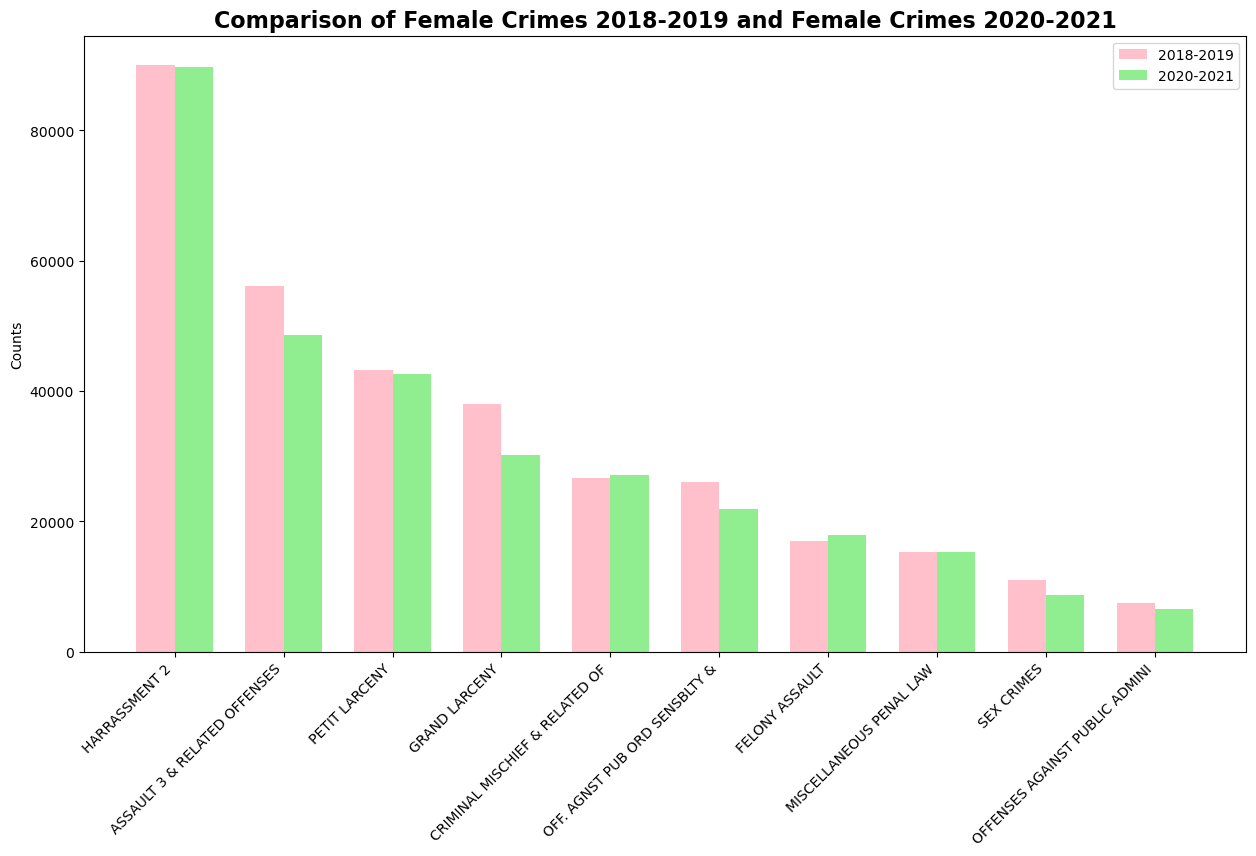

In [40]:
def plot_comparison_bar_chart(data1, data2, title1, title2, label1, label2):
    # Select the top 10 types of crimes
    top_crimes = data1.head(10).index

    # Set the positions for the bar chart
    x = np.arange(len(top_crimes))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, data1[top_crimes], width, label=label1, color='pink')
    rects2 = ax.bar(x + width/2, data2[top_crimes], width, label=label2, color='lightgreen')

    # Add title and labels
    ax.set_ylabel('Counts')
    ax.set_title('Comparison of ' + title1 + ' and ' + title2, fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(top_crimes, rotation=45, ha='right')
    ax.legend()

    plt.show()

# Visualize the change rate for male data
plot_comparison_bar_chart(male_crime_counts, male_crime_counts2, 'Male Crimes 2018-2019', 'Male Crimes 2020-2021', '2018-2019', '2020-2021')

# Visualize the change rate for female data
plot_comparison_bar_chart(female_crime_counts, female_crime_counts2, 'Female Crimes 2018-2019', 'Female Crimes 2020-2021', '2018-2019', '2020-2021')

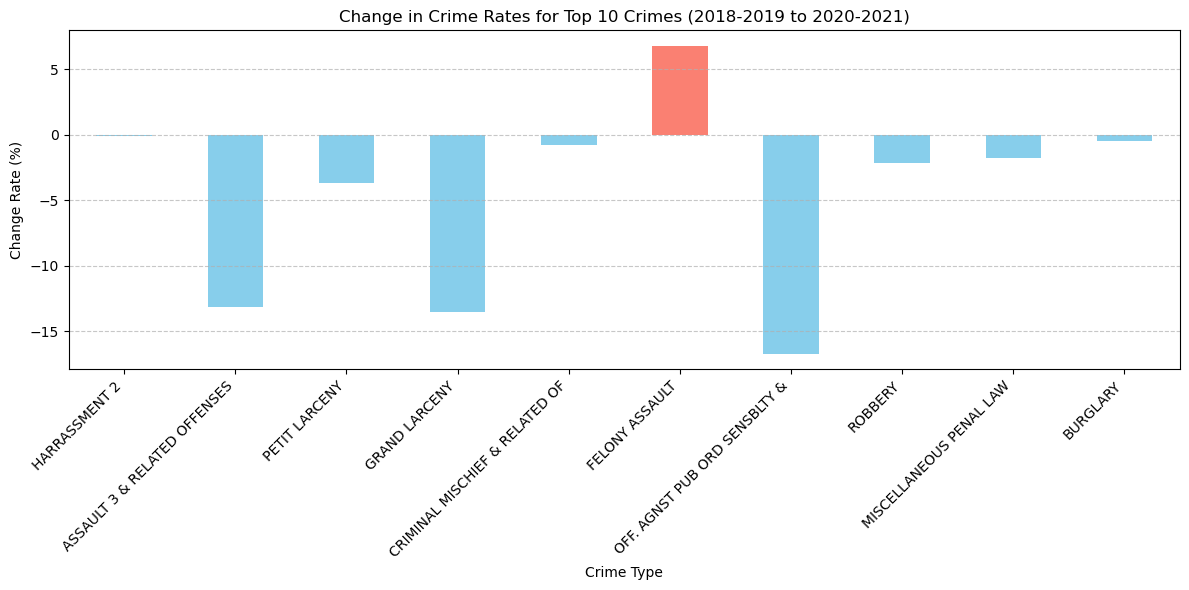

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total crime counts for 2018-2019 and 2020-2021
# Here, male_crime_counts, female_crime_counts represent data for 2018-2019,
# male_crime_counts2, female_crime_counts2 represent data for 2020-2021.
total_crimes_2018_2019 = male_crime_counts.add(female_crime_counts, fill_value=0)
total_crimes_2020_2021 = male_crime_counts2.add(female_crime_counts2, fill_value=0)

# Select the top 10 types of crimes
top_10_crimes = total_crimes_2018_2019.sort_values(ascending=False).head(10).index

# Calculate change rates for the top 10 types of crimes
change_rates = ((total_crimes_2020_2021 - total_crimes_2018_2019) / total_crimes_2018_2019).reindex(top_10_crimes) * 100

# Change colors: increase in red, decrease in blue
colors = ['salmon' if rate > 0 else 'skyblue' for rate in change_rates]

# Visualize with a bar chart
plt.figure(figsize=(12, 6))
change_rates.plot(kind='bar', color=colors)
plt.title('Change in Crime Rates for Top 10 Crimes (2018-2019 to 2020-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Change Rate (%)')

# Set x-axis labels and their positions
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xticks(range(len(top_10_crimes)), top_10_crimes)  # Set custom tick positions and labels

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

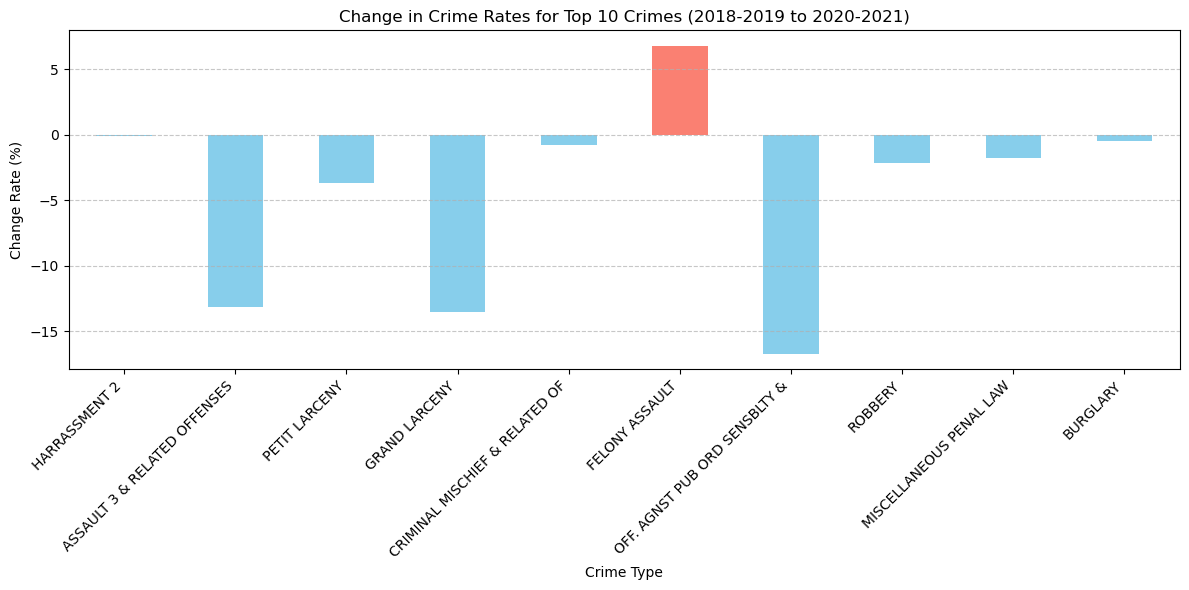

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total crime counts for 2018-2019 and 2020-2021
# Here, male_crime_counts, female_crime_counts represent data for 2018-2019,
# male_crime_counts2, female_crime_counts2 represent data for 2020-2021.
total_crimes_2018_2019 = male_crime_counts.add(female_crime_counts, fill_value=0)
total_crimes_2020_2021 = male_crime_counts2.add(female_crime_counts2, fill_value=0)

# Select the top 10 types of crimes
top_10_crimes = total_crimes_2018_2019.sort_values(ascending=False).head(10).index

# Calculate change rates for the top 10 types of crimes
change_rates = ((total_crimes_2020_2021 - total_crimes_2018_2019) / total_crimes_2018_2019).reindex(top_10_crimes) * 100

# Change colors: increase in red, decrease in blue
colors = ['salmon' if rate > 0 else 'skyblue' for rate in change_rates]

# Visualize with a bar chart
plt.figure(figsize=(12, 6))
ax = change_rates.plot(kind='bar', color=colors)

# Set x-axis labels and their positions
ax.set_xticks(range(len(top_10_crimes)))
ax.set_xticklabels(top_10_crimes, rotation=45, ha='right')  # Rotate and align x-axis labels

plt.title('Change in Crime Rates for Top 10 Crimes (2018-2019 to 2020-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Change Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the top 10 crime types for each gender in 2018-2019 and 2020-2021 data
top_10_crimes_male = male_crime_counts.head(10).index
top_10_crimes_female = female_crime_counts.head(10).index

# Calculate the change rate for male data
change_rates_male = ((male_crime_counts2[top_10_crimes_male] - male_crime_counts[top_10_crimes_male]) / male_crime_counts[top_10_crimes_male]) * 100

# Calculate the change rate for female data
change_rates_female = ((female_crime_counts2[top_10_crimes_female] - female_crime_counts[top_10_crimes_female]) / female_crime_counts[top_10_crimes_female]) * 100

# Handle missing values
change_rates_male = change_rates_male.fillna(0)
change_rates_female = change_rates_female.fillna(0)

# Determine the colors for the bar chart (increase: salmon, decrease: sky blue)
colors_male = ['salmon' if rate > 0 else 'skyblue' for rate in change_rates_male]
colors_female = ['salmon' if rate > 0 else 'skyblue' for rate in change_rates_female]

# Visualize the change rate for male data
plt.figure(figsize=(12, 6))
ax1 = change_rates_male.plot(kind='bar', color=colors_male)
ax1.set_xticks(range(len(top_10_crimes_male)))
ax1.set_xticklabels(top_10_crimes_male, rotation=45, ha='right')  # Rotate and align x-axis labels
plt.title('Change in Crime Rates for Top 10 Male Crimes (2018-2019 to 2020-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Change Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize the change rate for female data
plt.figure(figsize=(12, 6))
ax2 = change_rates_female.plot(kind='bar', color=colors_female)
ax2.set_xticks(range(len(top_10_crimes_female)))
ax2.set_xticklabels(top_10_crimes_female, rotation=45, ha='right')  # Rotate and align x-axis labels
plt.title('Change in Crime Rates for Top 10 Female Crimes (2018-2019 to 2020-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Change Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'male_crime_counts' is not defined

## Clustering

In [62]:
import pandas as pd
import numpy as np
import os
import urllib

#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

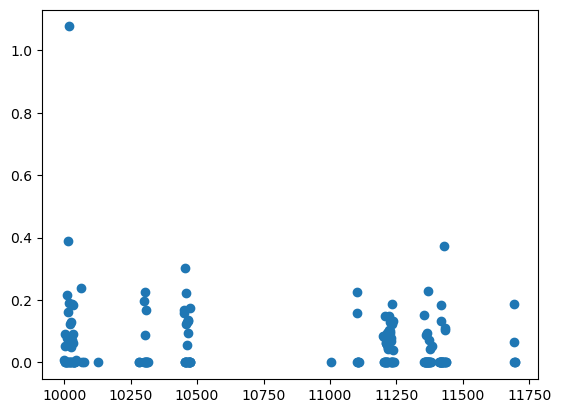

In [55]:
plt.scatter(Merged['zcta'], Merged['2018_normalized'])

In [147]:
def silhouette_score_plot(data,range_n_clusters):
    X=data.values
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [57]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

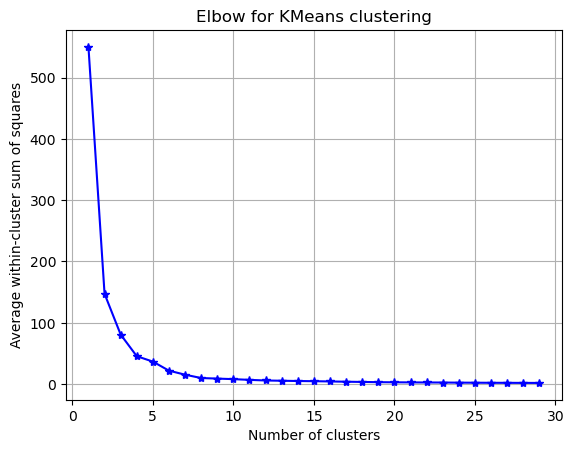

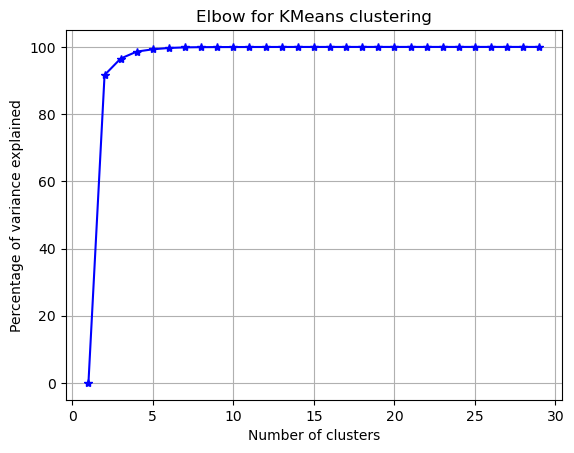

In [76]:
data = Merged[['zcta', '2018_normalized']].values

elbow(data, range(1, 30))

For n_clusters = 2 The average silhouette_score is : 0.8335855850188038


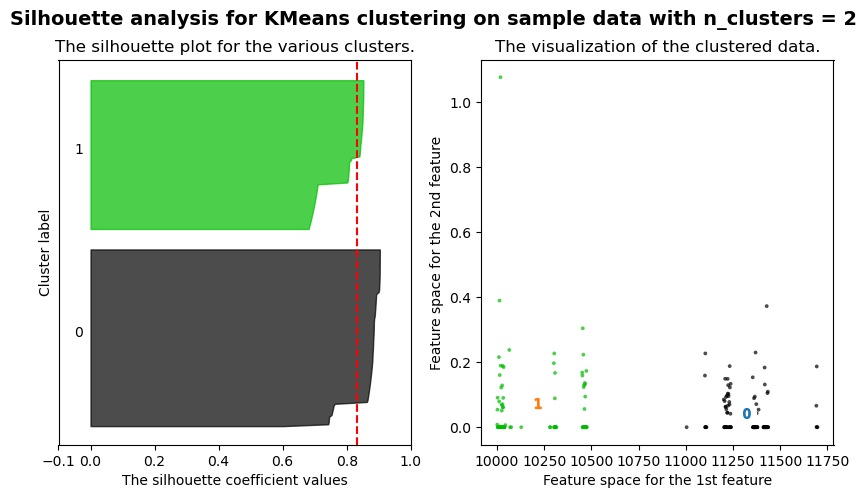

For n_clusters = 3 The average silhouette_score is : 0.8443333721475923


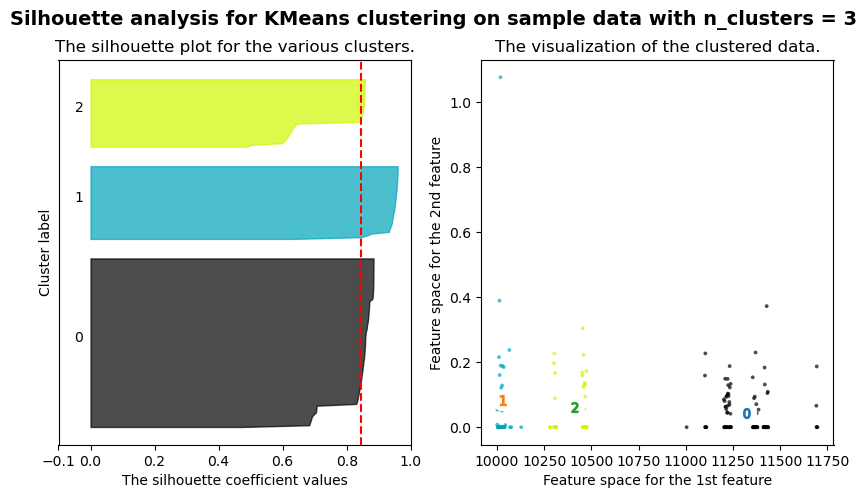

For n_clusters = 4 The average silhouette_score is : 0.7849039194441426


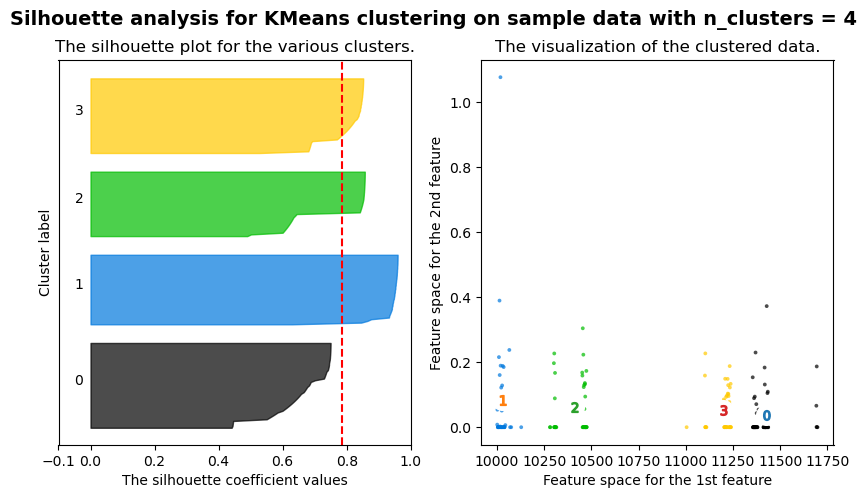

For n_clusters = 5 The average silhouette_score is : 0.8294902336502202


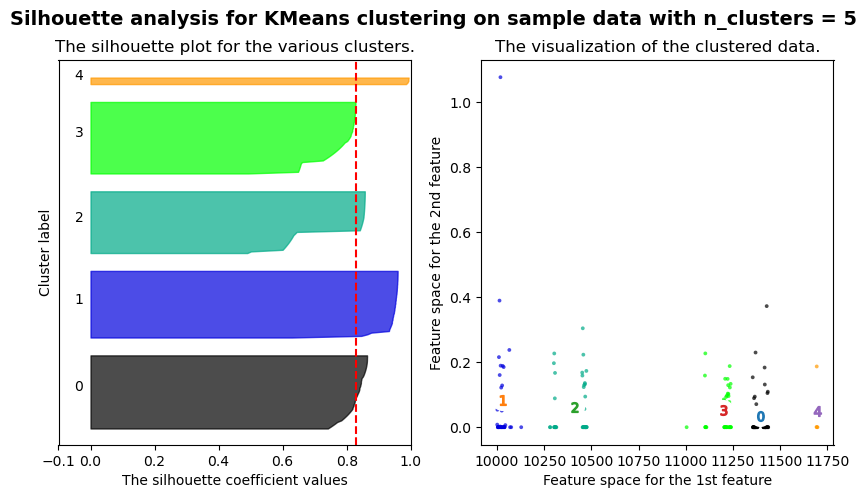

For n_clusters = 6 The average silhouette_score is : 0.8629101341261656


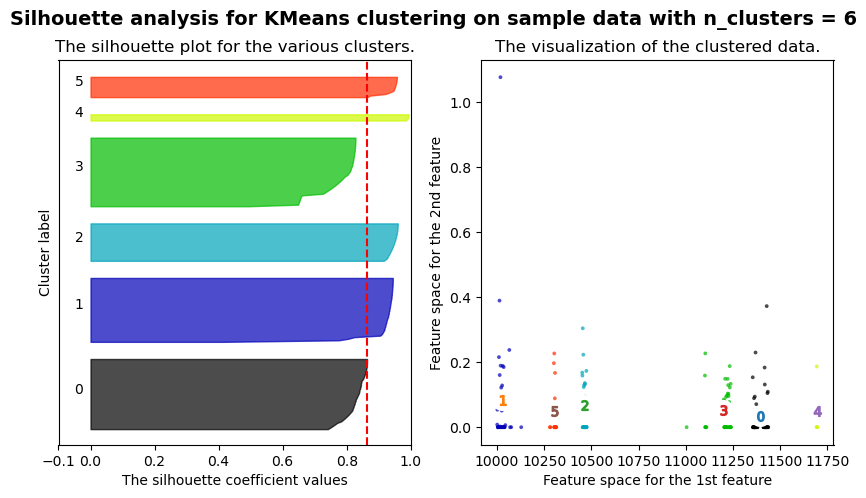

For n_clusters = 7 The average silhouette_score is : 0.8847253021485056


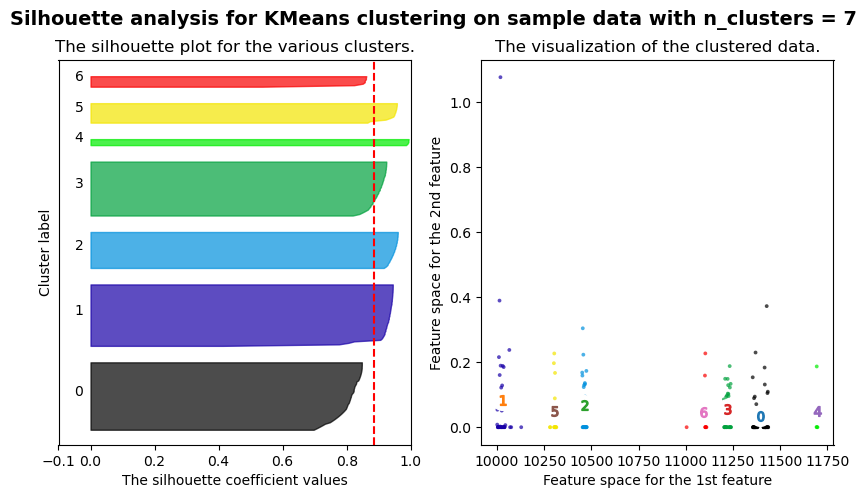

For n_clusters = 8 The average silhouette_score is : 0.8889700204920414


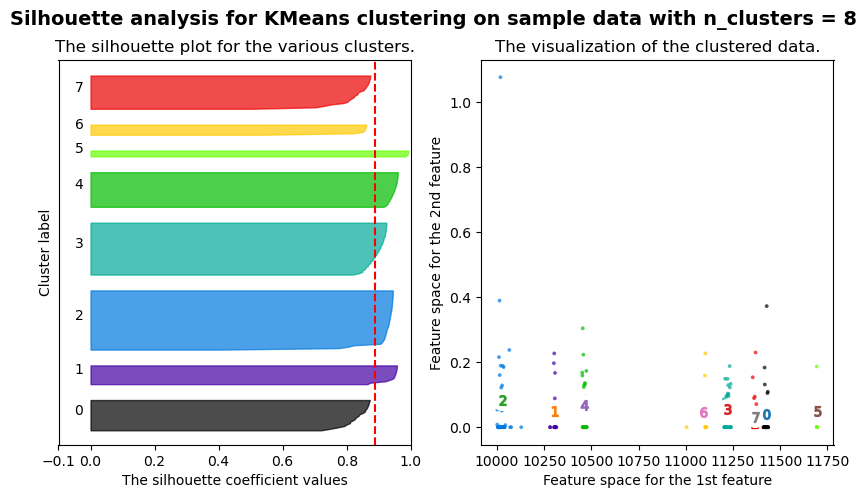

For n_clusters = 9 The average silhouette_score is : 0.8468942413686256


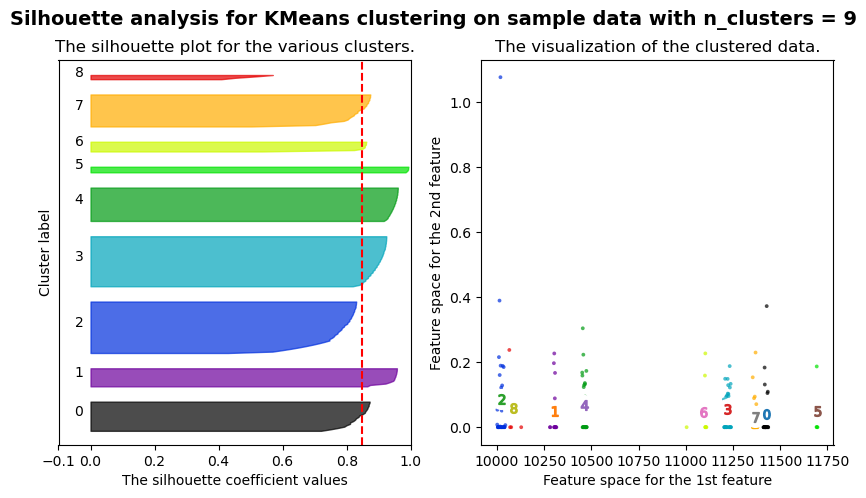

In [77]:
silhouette_score_plot(data,range(2,10))

In [113]:
import urllib.request
urllib.request.urlretrieve ("https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD", 
                            "NYPD_data.csv")
crime_data = pd.read_csv('NYPD_data.csv')
crime_data = crime_data.dropna()
crime_data = crime_data[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude', 'Longitude']]
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
567       49869920   08/04/2005     22:00:00  CRIMINAL MISCHIEF & RELATED OF   
1847      47520690   06/24/2000     14:25:00                   PETIT LARCENY   
2195      25959857   12/23/2003     03:15:00                 DANGEROUS DRUGS   
2207      10306245   01/25/2005     10:50:00    ASSAULT 3 & RELATED OFFENSES   
2265      25862057   07/01/2005     00:01:00  CRIMINAL MISCHIEF & RELATED OF   
...            ...          ...          ...                             ...   
8352911  261113149   12/30/2022     00:15:00               DANGEROUS WEAPONS   
8352915  261152586   12/31/2022     00:18:00             ADMINISTRATIVE CODE   
8352942  261168962   12/31/2022     12:50:00                   HARRASSMENT 2   
8353028  261173436   12/31/2022     17:27:00               DANGEROUS WEAPONS   
8353032  261161441   12/31/2022     03:00:00                   GRAND LARCENY   

           BORO_NM   Latitude  Longitude  
567         QUEENS  40.704435 -73.893781  
1847     MANHATTAN  40.753533 -73.994537  
2195     MANHATTAN  40.851213 -73.935216  
2207     MANHATTAN  40.756820 -73.971143  
2265      BROOKLYN  40.594019 -73.960854  
...            ...        ...        ...  
8352911     QUEENS  40.721453 -73.843978  
8352915   BROOKLYN  40.679516 -73.904570  
8352942  MANHATTAN  40.709556 -74.006435  
8353028   BROOKLYN  40.679516 -73.904570  
8353032  MANHATTAN  40.751442 -73.976049  

[141687 rows x 7 columns]

In [114]:
crime_data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], how='any', inplace=True)
crime_data.dropna(subset=['Latitude', 'Longitude'], how='any', inplace=True)
crime_data = crime_data.dropna(subset=['BORO_NM'])
crime_data = crime_data.drop_duplicates(subset=['CMPLNT_NUM'])
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
567       49869920   08/04/2005     22:00:00  CRIMINAL MISCHIEF & RELATED OF   
1847      47520690   06/24/2000     14:25:00                   PETIT LARCENY   
2195      25959857   12/23/2003     03:15:00                 DANGEROUS DRUGS   
2207      10306245   01/25/2005     10:50:00    ASSAULT 3 & RELATED OFFENSES   
2265      25862057   07/01/2005     00:01:00  CRIMINAL MISCHIEF & RELATED OF   
...            ...          ...          ...                             ...   
8352911  261113149   12/30/2022     00:15:00               DANGEROUS WEAPONS   
8352915  261152586   12/31/2022     00:18:00             ADMINISTRATIVE CODE   
8352942  261168962   12/31/2022     12:50:00                   HARRASSMENT 2   
8353028  261173436   12/31/2022     17:27:00               DANGEROUS WEAPONS   
8353032  261161441   12/31/2022     03:00:00                   GRAND LARCENY   

           BORO_NM   Latitude  Longitude  
567         QUEENS  40.704435 -73.893781  
1847     MANHATTAN  40.753533 -73.994537  
2195     MANHATTAN  40.851213 -73.935216  
2207     MANHATTAN  40.756820 -73.971143  
2265      BROOKLYN  40.594019 -73.960854  
...            ...        ...        ...  
8352911     QUEENS  40.721453 -73.843978  
8352915   BROOKLYN  40.679516 -73.904570  
8352942  MANHATTAN  40.709556 -74.006435  
8353028   BROOKLYN  40.679516 -73.904570  
8353032  MANHATTAN  40.751442 -73.976049  

[141687 rows x 7 columns]

In [119]:
crime_data['CMPLNT_FR_DT'] = pd.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
crime_data = crime_data[(crime_data['CMPLNT_FR_DT'].dt.year >= 2017) & (crime_data['CMPLNT_FR_DT'].dt.year < 2023)]
crime_data

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
5579078  159950166   2017-01-04     22:50:00  OFFENSES AGAINST PUBLIC ADMINI   
5579107  159904391   2017-01-02     23:45:00                   PETIT LARCENY   
5579130  159931394   2017-01-02     15:00:00    ASSAULT 3 & RELATED OFFENSES   
5579210  160043906   2017-01-07     15:40:00                         FORGERY   
5579224  160040168   2017-01-07     13:25:00    ASSAULT 3 & RELATED OFFENSES   
...            ...          ...          ...                             ...   
8352911  261113149   2022-12-30     00:15:00               DANGEROUS WEAPONS   
8352915  261152586   2022-12-31     00:18:00             ADMINISTRATIVE CODE   
8352942  261168962   2022-12-31     12:50:00                   HARRASSMENT 2   
8353028  261173436   2022-12-31     17:27:00               DANGEROUS WEAPONS   
8353032  261161441   2022-12-31     03:00:00                   GRAND LARCENY   

           BORO_NM   Latitude  Longitude  
5579078  MANHATTAN  40.737203 -73.983273  
5579107     QUEENS  40.730113 -73.810909  
5579130  MANHATTAN  40.784252 -73.974898  
5579210  MANHATTAN  40.753533 -73.994537  
5579224   BROOKLYN  40.671130 -73.913502  
...            ...        ...        ...  
8352911     QUEENS  40.721453 -73.843978  
8352915   BROOKLYN  40.679516 -73.904570  
8352942  MANHATTAN  40.709556 -74.006435  
8353028   BROOKLYN  40.679516 -73.904570  
8353032  MANHATTAN  40.751442 -73.976049  

[56625 rows x 7 columns]

In [116]:
zipcode = gpd.read_file('ZIPCODE.zip')
zipcode.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

In [132]:
zipcode = zipcode.to_crs("EPSG:4326")
zipcode_gpd = gpd.GeoDataFrame(crime_data, geometry=gpd.points_from_xy(crime_data['Longitude'], crime_data['Latitude']), crs = 'EPSG:4326')
data_nyc = gpd.sjoin(zipcode_gpd, zipcode[zipcode['COUNTY'].isin(['New York', 'Kings', 'Bronx', 'Queens', 'Richmond'])], how='inner', op='within')
data_nyc

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
5579078  159950166   2017-01-04     22:50:00  OFFENSES AGAINST PUBLIC ADMINI   
5579742  159894307   2017-01-03     16:15:00                         FORGERY   
5580525  159949973   2017-01-04     22:05:00  OTHER OFFENSES RELATED TO THEF   
5582029  159984784   2017-01-05     18:10:00               DANGEROUS WEAPONS   
5582482  159924257   2017-01-04     10:20:00               THEFT OF SERVICES   
...            ...          ...          ...                             ...   
8091057  247264009   2022-06-28     12:42:00    ASSAULT 3 & RELATED OFFENSES   
8253042  253202560   2022-10-27     06:50:00                   HARRASSMENT 2   
8272201  253378516   2022-10-31     18:40:00                   GRAND LARCENY   
8049626  246366205   2022-06-05     06:00:00                         ROBBERY   
8086158  247484616   2022-07-02     23:45:00    ASSAULT 3 & RELATED OFFENSES   

           BORO_NM   Latitude  Longitude                    geometry  \
5579078  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)   
5579742  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)   
5580525  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)   
5582029  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)   
5582482  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)   
...            ...        ...        ...                         ...   
8091057  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)   
8253042  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)   
8272201  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)   
8049626      BRONX  40.874638 -73.909736  POINT (-73.90974 40.87464)   
8086158      BRONX  40.874638 -73.909736  POINT (-73.90974 40.87464)   

         index_right ZIPCODE  ...   PO_NAME POPULATION          AREA  STATE  \
5579078           87   10010  ...  New York    29881.0  9.768396e+06     NY   
5579742           87   10010  ...  New York    29881.0  9.768396e+06     NY   
5580525           87   10010  ...  New York    29881.0  9.768396e+06     NY   
5582029           87   10010  ...  New York    29881.0  9.768396e+06     NY   
5582482           87   10010  ...  New York    29881.0  9.768396e+06     NY   
...              ...     ...  ...       ...        ...           ...    ...   
8091057          196   10075  ...  New York    25203.0  4.809654e+06     NY   
8253042          196   10075  ...  New York    25203.0  4.809654e+06     NY   
8272201          196   10075  ...  New York    25203.0  4.809654e+06     NY   
8049626           19   10463  ...     Bronx    70641.0  3.119702e+06     NY   
8086158           19   10463  ...     Bronx    70641.0  3.119702e+06     NY   

           COUNTY ST_FIPS CTY_FIPS                   URL SHAPE_AREA  SHAPE_LEN  
5579078  New York      36      061  http://www.usps.com/        0.0        0.0  
5579742  New York      36      061  http://www.usps.com/        0.0        0.0  
5580525  New York      36      061  http://www.usps.com/        0.0        0.0  
5582029  New York      36      061  http://www.usps.com/        0.0        0.0  
5582482  New York      36      061  http://www.usps.com/        0.0        0.0  
...           ...     ...      ...                   ...        ...        ...  
8091057  New York      36      061  http://www.usps.com/        0.0        0.0  
8253042  New York      36      061  http://www.usps.com/        0.0        0.0  
8272201  New York      36      061  http://www.usps.com/        0.0        0.0  
8049626  New York      36      061  http://www.usps.com/        0.0        0.0  
8086158  New York      36      061  http://www.usps.com/        0.0        0.0  

[56646 rows x 21 columns]

In [133]:
data_nyc['ZIPCODE'] = data_nyc['ZIPCODE'].astype(int)
data_nyc = data_nyc[data_nyc['ZIPCODE'] > 9999]
data_nyc = data_nyc[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'Latitude', 'Longitude', 'geometry' ,'ZIPCODE']]
data_nyc 

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
5579078  159950166   2017-01-04     22:50:00  OFFENSES AGAINST PUBLIC ADMINI   
5579742  159894307   2017-01-03     16:15:00                         FORGERY   
5580525  159949973   2017-01-04     22:05:00  OTHER OFFENSES RELATED TO THEF   
5582029  159984784   2017-01-05     18:10:00               DANGEROUS WEAPONS   
5582482  159924257   2017-01-04     10:20:00               THEFT OF SERVICES   
...            ...          ...          ...                             ...   
8091057  247264009   2022-06-28     12:42:00    ASSAULT 3 & RELATED OFFENSES   
8253042  253202560   2022-10-27     06:50:00                   HARRASSMENT 2   
8272201  253378516   2022-10-31     18:40:00                   GRAND LARCENY   
8049626  246366205   2022-06-05     06:00:00                         ROBBERY   
8086158  247484616   2022-07-02     23:45:00    ASSAULT 3 & RELATED OFFENSES   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  
5579078  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
5579742  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
5580525  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
5582029  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
5582482  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
...            ...        ...        ...                         ...      ...  
8091057  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)    10075  
8253042  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)    10075  
8272201  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)    10075  
8049626      BRONX  40.874638 -73.909736  POINT (-73.90974 40.87464)    10463  
8086158      BRONX  40.874638 -73.909736  POINT (-73.90974 40.87464)    10463  

[56607 rows x 9 columns]

In [134]:
data_nyc_1819 = data_nyc[data_nyc['CMPLNT_FR_DT'].dt.year.isin([2018, 2019])]
data_nyc_1819

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
6052566  173193731   2018-01-02     05:25:00    ASSAULT 3 & RELATED OFFENSES   
6053340  173496667   2018-01-11     10:48:00                 DANGEROUS DRUGS   
6054250  173335022   2018-01-03     12:00:00   OFF. AGNST PUB ORD SENSBLTY &   
6054985  173240583   2018-01-03     23:10:00        OFFENSES INVOLVING FRAUD   
6057108  173195562   2018-01-03     02:36:00                          FRAUDS   
...            ...          ...          ...                             ...   
6939022  206121830   2019-12-06     18:22:00  OFFENSES AGAINST PUBLIC ADMINI   
6356958  239918336   2018-08-26     13:40:00                   HARRASSMENT 2   
6582942  194495379   2019-03-09     21:50:00                   GRAND LARCENY   
6590247  194560041   2019-03-11     17:10:00                         ROBBERY   
6956273  237763338   2019-12-18     07:43:00  CRIMINAL MISCHIEF & RELATED OF   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  
6052566  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6053340  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6054250  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6054985  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6057108  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
...            ...        ...        ...                         ...      ...  
6939022   BROOKLYN  40.683651 -74.000304  POINT (-74.00030 40.68365)    11231  
6356958     QUEENS  40.776131 -73.910700  POINT (-73.91070 40.77613)    11105  
6582942   BROOKLYN  40.700725 -73.941932  POINT (-73.94193 40.70073)    11206  
6590247   BROOKLYN  40.704113 -73.947855  POINT (-73.94785 40.70411)    11206  
6956273   BROOKLYN  40.665227 -73.923183  POINT (-73.92318 40.66523)    11212  

[20774 rows x 9 columns]

In [123]:
data_nyc_1920 = data_nyc[data_nyc['CMPLNT_FR_DT'].dt.year.isin([2019, 2020])]
data_nyc_1920

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
6510389  191938874   2019-01-06     10:00:00                   HARRASSMENT 2   
6511154  191973403   2019-01-07     13:25:00                   GRAND LARCENY   
6512209  206926795   2019-01-05     08:34:00                 DANGEROUS DRUGS   
6512777  191884850   2019-01-04     17:33:00  OFFENSES AGAINST PUBLIC ADMINI   
6513399  191834769   2019-01-03     17:32:00                      SEX CRIMES   
...            ...          ...          ...                             ...   
7002627  237763339   2020-01-17     08:14:00  CRIMINAL MISCHIEF & RELATED OF   
7189211  216064093   2020-07-24     07:30:00                        BURGLARY   
7297344  219326810   2020-10-16     14:45:00                   GRAND LARCENY   
7286756  219164054   2020-10-13     23:10:00                         ROBBERY   
7369650  222218561   2020-12-24     02:00:00                   GRAND LARCENY   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  
6510389  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6511154  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6512209  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6512777  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6513399  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
...            ...        ...        ...                         ...      ...  
7002627   BROOKLYN  40.665227 -73.923183  POINT (-73.92318 40.66523)    11212  
7189211   BROOKLYN  40.671623 -73.962570  POINT (-73.96257 40.67162)    11238  
7297344   BROOKLYN  40.683039 -73.964778  POINT (-73.96478 40.68304)    11238  
7286756  MANHATTAN  40.711535 -74.010464  POINT (-74.01046 40.71153)    10007  
7369650     QUEENS  40.700582 -73.807742  POINT (-73.80774 40.70058)    11435  

[17076 rows x 9 columns]

In [124]:
data_nyc_2021 = data_nyc[data_nyc['CMPLNT_FR_DT'].dt.year.isin([2020, 2021])]
data_nyc_2021

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                     OFNS_DESC  \
6967867  207559207   2020-01-07     16:50:00  ASSAULT 3 & RELATED OFFENSES   
6970040  206907397   2020-01-02     14:05:00                 HARRASSMENT 2   
6973806  207492683   2020-01-06     19:45:00                 HARRASSMENT 2   
6978897  206923966   2020-01-04     11:55:00                 HARRASSMENT 2   
6980070  208036105   2020-01-16     14:00:00                 PETIT LARCENY   
...            ...          ...          ...                           ...   
7810996  238022549   2021-12-18     16:50:00                 HARRASSMENT 2   
7804746  237547670   2021-12-08     08:00:00                 PETIT LARCENY   
7811230  237963049   2021-12-16     05:10:00  ASSAULT 3 & RELATED OFFENSES   
7809108  238230227   2021-12-17     08:45:00                 HARRASSMENT 2   
7825439  238298459   2021-12-25     02:30:00                 GRAND LARCENY   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  
6967867  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6970040  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6973806  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6978897  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
6980070  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
...            ...        ...        ...                         ...      ...  
7810996   BROOKLYN  40.609131 -73.957405  POINT (-73.95740 40.60913)    11229  
7804746     QUEENS  40.579813 -73.837199  POINT (-73.83720 40.57981)    11694  
7811230     QUEENS  40.585475 -73.820149  POINT (-73.82015 40.58547)    11694  
7809108     QUEENS  40.766887 -73.921391  POINT (-73.92139 40.76689)    11102  
7825439  MANHATTAN  40.867692 -73.921214  POINT (-73.92121 40.86769)    10034  

[14920 rows x 9 columns]

In [125]:
data_nyc_2122 = data_nyc[data_nyc['CMPLNT_FR_DT'].dt.year.isin([2021, 2022])]
data_nyc_2122

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
7378833  222578998   2021-01-04     10:30:00   OFF. AGNST PUB ORD SENSBLTY &   
7391452  222789583   2021-01-08     09:11:00  CRIMINAL MISCHIEF & RELATED OF   
7394935  223039013   2021-01-13     20:41:00  OFFENSES AGAINST PUBLIC ADMINI   
7396015  223149589   2021-01-15     12:25:00                   GRAND LARCENY   
7396490  223133652   2021-01-15     15:00:00  CRIMINAL MISCHIEF & RELATED OF   
...            ...          ...          ...                             ...   
8091057  247264009   2022-06-28     12:42:00    ASSAULT 3 & RELATED OFFENSES   
8253042  253202560   2022-10-27     06:50:00                   HARRASSMENT 2   
8272201  253378516   2022-10-31     18:40:00                   GRAND LARCENY   
8049626  246366205   2022-06-05     06:00:00                         ROBBERY   
8086158  247484616   2022-07-02     23:45:00    ASSAULT 3 & RELATED OFFENSES   

           BORO_NM   Latitude  Longitude                    geometry  ZIPCODE  
7378833  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
7391452  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
7394935  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
7396015  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
7396490  MANHATTAN  40.737203 -73.983273  POINT (-73.98327 40.73720)    10010  
...            ...        ...        ...                         ...      ...  
8091057  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)    10075  
8253042  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)    10075  
8272201  MANHATTAN  40.773642 -73.959856  POINT (-73.95986 40.77364)    10075  
8049626      BRONX  40.874638 -73.909736  POINT (-73.90974 40.87464)    10463  
8086158      BRONX  40.874638 -73.909736  POINT (-73.90974 40.87464)    10463  

[18908 rows x 9 columns]

In [136]:
columns_of_interest = ['ZIPCODE', 'OFNS_DESC']
data_nyc = data_nyc[columns_of_interest]
data_nyc_1819 = data_nyc_1819[columns_of_interest]
data_nyc_1920 = data_nyc_1920[columns_of_interest]
data_nyc_2021 = data_nyc_2021[columns_of_interest]
data_nyc_2122 = data_nyc_2122[columns_of_interest]


### Cluster for Total Crimes von 2018 to 2022

In [141]:
pivot_nyc = pd.pivot_table(data_nyc, 
                             index='ZIPCODE', 
                             columns='OFNS_DESC', 
                             aggfunc='size', 
                             fill_value=0)
pivot_nyc

OFNS_DESC  ADMINISTRATIVE CODE  AGRICULTURE & MRKTS LAW-UNCLASSIFIED  \
ZIPCODE                                                                
10001                        2                                     0   
10002                        0                                     0   
10003                        2                                     0   
10004                        1                                     0   
10005                        0                                     0   
...                        ...                                   ...   
11435                        0                                     0   
11691                        0                                     0   
11692                        0                                     0   
11693                        1                                     0   
11694                        0                                     0   

OFNS_DESC  ANTICIPATORY OFFENSES  ARSON  ASSAULT 3 & RELATED OFFENSES  \
ZIPCODE                                                                 
10001                          0      0                            29   
10002                          0      0                            83   
10003                          0      0                            98   
10004                          0      0                            10   
10005                          0      0                             4   
...                          ...    ...                           ...   
11435                          0      0                            11   
11691                          0      0                            38   
11692                          0      0                             2   
11693                          0      1                            37   
11694                          0      0                             1   

OFNS_DESC  BURGLAR'S TOOLS  BURGLARY  CHILD ABANDONMENT/NON SUPPORT  \
ZIPCODE                                                               
10001                    5         0                              0   
10002                    8         1                              0   
10003                    7         0                              0   
10004                    0         0                              0   
10005                    0         0                              0   
...                    ...       ...                            ...   
11435                    1         0                              0   
11691                    0         1                              0   
11692                    0         0                              0   
11693                    0         0                              0   
11694                    0         0                              0   

OFNS_DESC  CRIMINAL MISCHIEF & RELATED OF  CRIMINAL TRESPASS  ...  \
ZIPCODE                                                       ...   
10001                                  46                  1  ...   
10002                                 138                  0  ...   
10003                                  70                  3  ...   
10004                                   6                  0  ...   
10005                                   3                  0  ...   
...                                   ...                ...  ...   
11435                                   5                  1  ...   
11691                                  11                  0  ...   
11692                                   3                  0  ...   
11693                                  45                  0  ...   
11694                                   2                  0  ...   

OFNS_DESC  OTHER STATE LAWS (NON PENAL LA  PETIT LARCENY  \
ZIPCODE                                                    
10001                                   0             12   
10002                                   0             43   
10003                                   0          

In [153]:
#normalize complaints of each type within each zip code by total zip code activity to get size-independent complaints profiles
TotalCrime=pivot_nyc.sum(axis=1) #total crime activity per zip code
pivot_nycNormalized=pivot_nyc.div(pivot_nyc.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
pivot_nycNormalized=pivot_nycNormalized.loc[TotalCrime>10]
pivot_nycNormalized

OFNS_DESC  ADMINISTRATIVE CODE  AGRICULTURE & MRKTS LAW-UNCLASSIFIED  \
ZIPCODE                                                                
10001                 0.006623                                   0.0   
10002                 0.000000                                   0.0   
10003                 0.003663                                   0.0   
10004                 0.018519                                   0.0   
10005                 0.000000                                   0.0   
...                        ...                                   ...   
11433                 0.000000                                   0.0   
11435                 0.000000                                   0.0   
11691                 0.000000                                   0.0   
11692                 0.000000                                   0.0   
11693                 0.003953                                   0.0   

OFNS_DESC  ANTICIPATORY OFFENSES     ARSON  ASSAULT 3 & RELATED OFFENSES  \
ZIPCODE                                                                    
10001                        0.0  0.000000                      0.096026   
10002                        0.0  0.000000                      0.114958   
10003                        0.0  0.000000                      0.179487   
10004                        0.0  0.000000                      0.185185   
10005                        0.0  0.000000                      0.210526   
...                          ...       ...                           ...   
11433                        0.0  0.000000                      0.129630   
11435                        0.0  0.000000                      0.152778   
11691                        0.0  0.000000                      0.172727   
11692                        0.0  0.000000                      0.166667   
11693                        0.0  0.003953                      0.146245   

OFNS_DESC  BURGLAR'S TOOLS  BURGLARY  CHILD ABANDONMENT/NON SUPPORT  \
ZIPCODE                                                               
10001             0.016556  0.000000                            0.0   
10002             0.011080  0.001385                            0.0   
10003             0.012821  0.000000                            0.0   
10004             0.000000  0.000000                            0.0   
10005             0.000000  0.000000                            0.0   
...                    ...       ...                            ...   
11433             0.018519  0.000000                            0.0   
11435             0.013889  0.000000                            0.0   
11691             0.000000  0.004545                            0.0   
11692             0.000000  0.000000                            0.0   
11693             0.000000  0.000000                            0.0   

OFNS_DESC  CRIMINAL MISCHIEF & RELATED OF  CRIMINAL TRESPASS  ...  \
ZIPCODE                                                       ...   
10001                            0.152318           0.003311  ...   
10002                            0.191136           0.000000  ...   
10003                            0.128205           0.005495  ...   
10004                            0.111111           0.000000  ...   
10005                            0.157895           0.000000  ...   
...                                   ...                ...  ...   
11433                            0.092593           0.000000  ...   
11435                            0.069444           0.013889  ...   
11691                            0.050000           0.000000  ...   
11692                            0.250000           0.000000  ...   
11693                            0.177866           0.000000  ...   

OFNS_DESC  OTHER STATE LAWS (NON PENAL LA  PETIT LARCENY  \
ZIPCODE                                                    
10001                                 0.0       0.039735   
10002                                 0.0       0.059557   
10003       

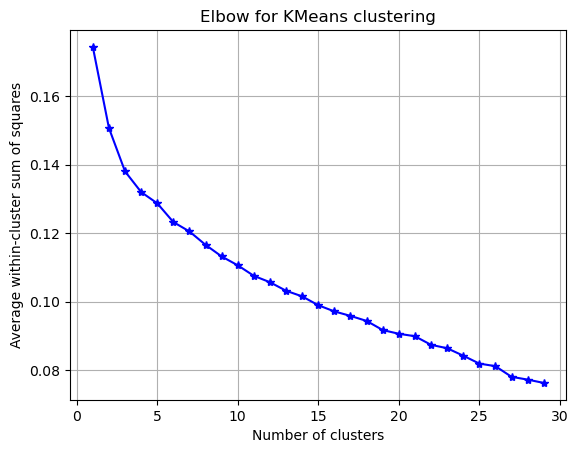

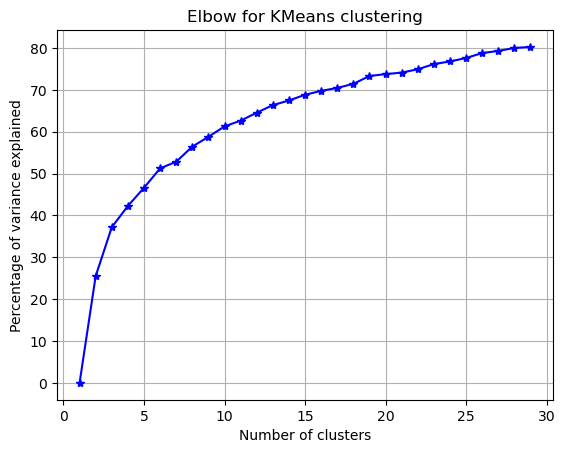

In [155]:
elbow(pivot_nycNormalized,range(1,30))

For n_clusters = 2 The average silhouette_score is : 0.26131712369744975


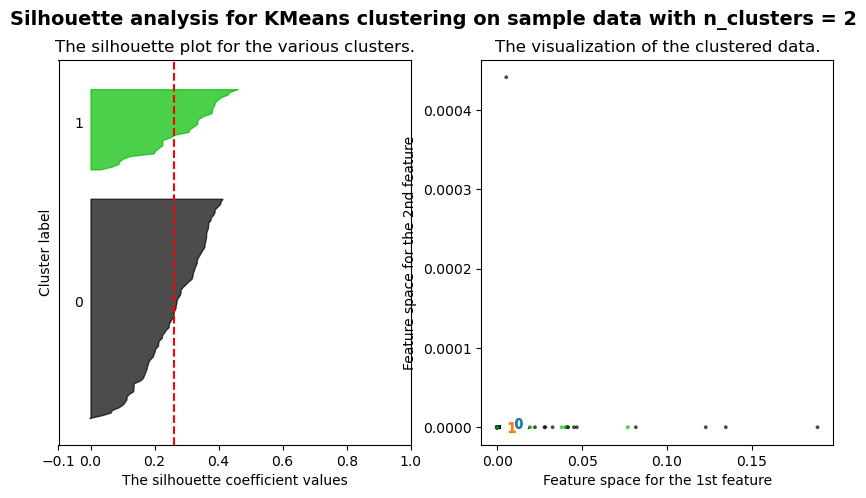

For n_clusters = 3 The average silhouette_score is : 0.20235708462714194


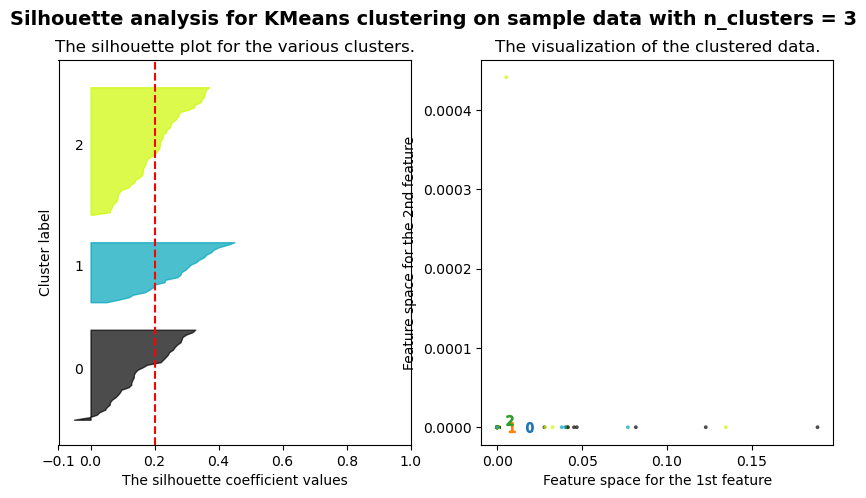

For n_clusters = 4 The average silhouette_score is : 0.20401284711174925


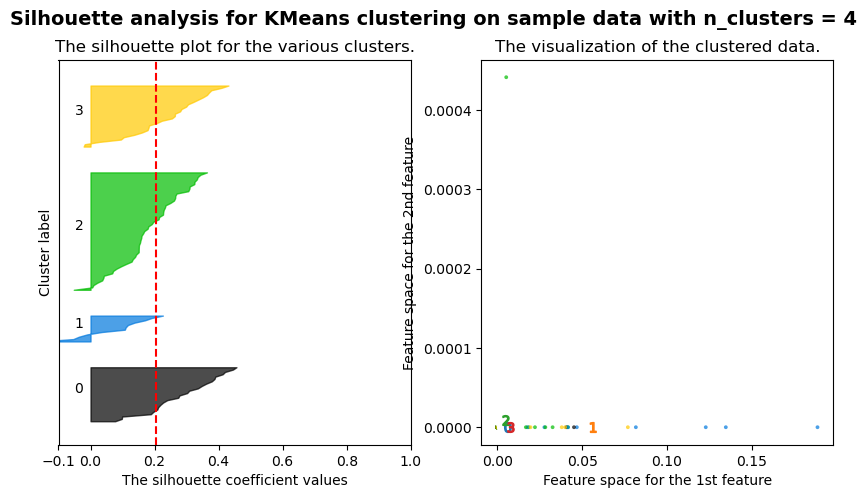

For n_clusters = 5 The average silhouette_score is : 0.203469564190377


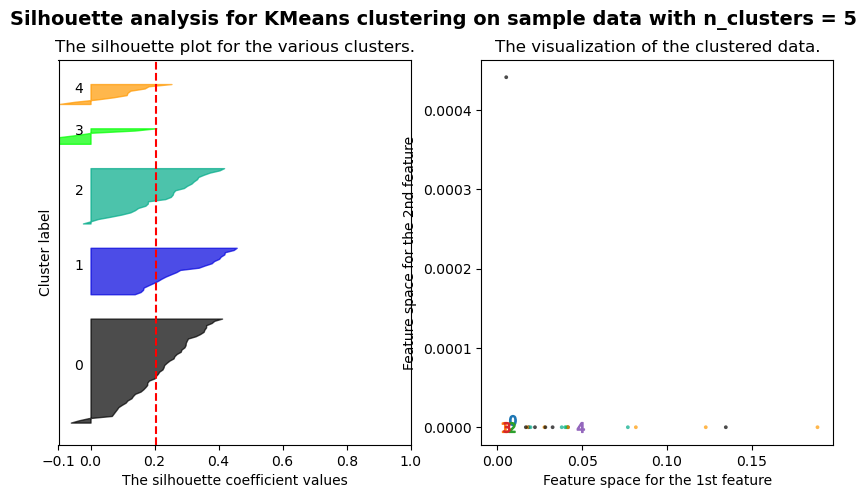

For n_clusters = 6 The average silhouette_score is : 0.15390112636179154


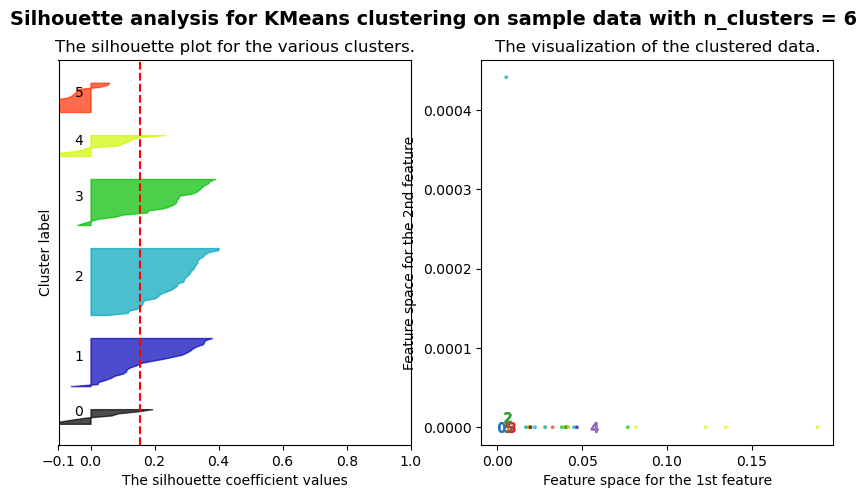

For n_clusters = 7 The average silhouette_score is : 0.1877273827170039


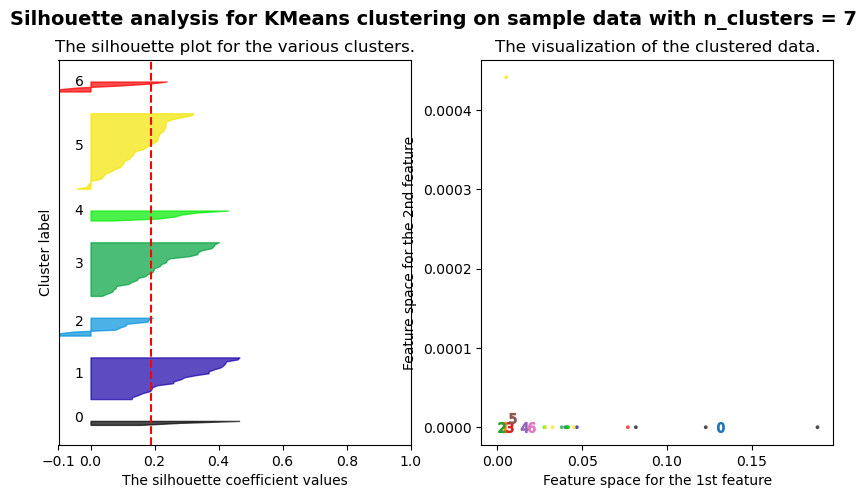

For n_clusters = 8 The average silhouette_score is : 0.16477784973340925


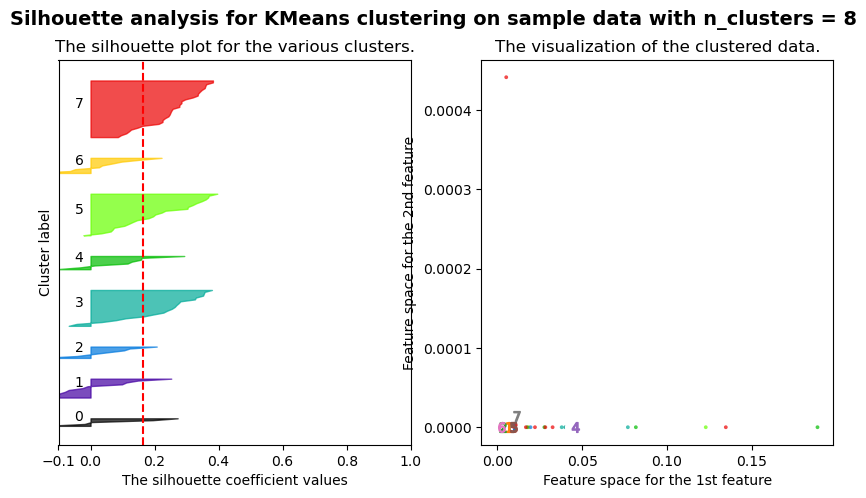

For n_clusters = 9 The average silhouette_score is : 0.16218188873583037


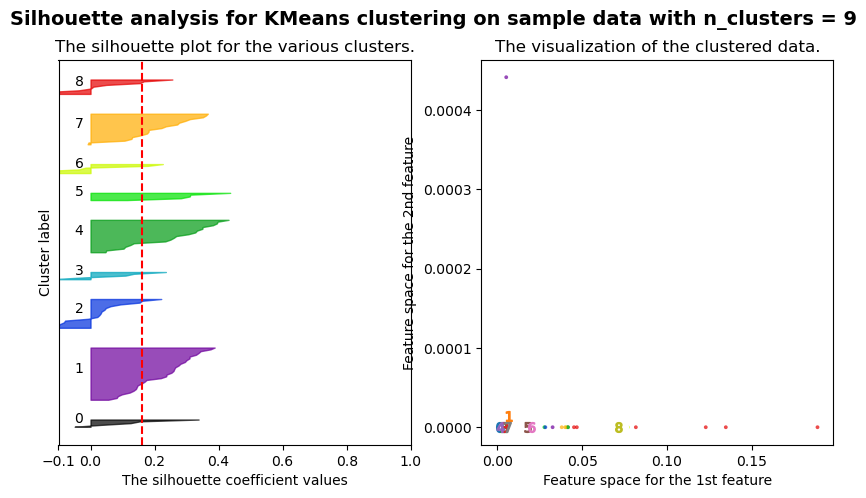

In [156]:
silhouette_score_plot(pivot_nycNormalized,range(2,10))

In [158]:
from sklearn.mixture import GaussianMixture 

In [160]:
rr = GaussianMixture(n_components = 3, random_state = 0).fit(pivot_nycNormalized)
rr.labels_ = rr.predict(pivot_nycNormalized)

In [161]:
clust={pivot_nycNormalized.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}
res=pd.DataFrame({'zipcode':pivot_nycNormalized.index, 'label':rr.labels_})

In [163]:
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")

In [165]:
clusterChar = pivot_nyc.reset_index().merge(res,left_on='ZIPCODE',right_on='zipcode').\
                groupby(['label']).sum().reset_index()

In [167]:
clusterChar = clusterChar[[col for col in clusterChar.columns if col not in ['label','ZIPCODE','zipcode']]]
clusterChar = clusterChar.div(clusterChar.sum(axis=1), axis=0)
clusterChar['label'] = [0,1,2]

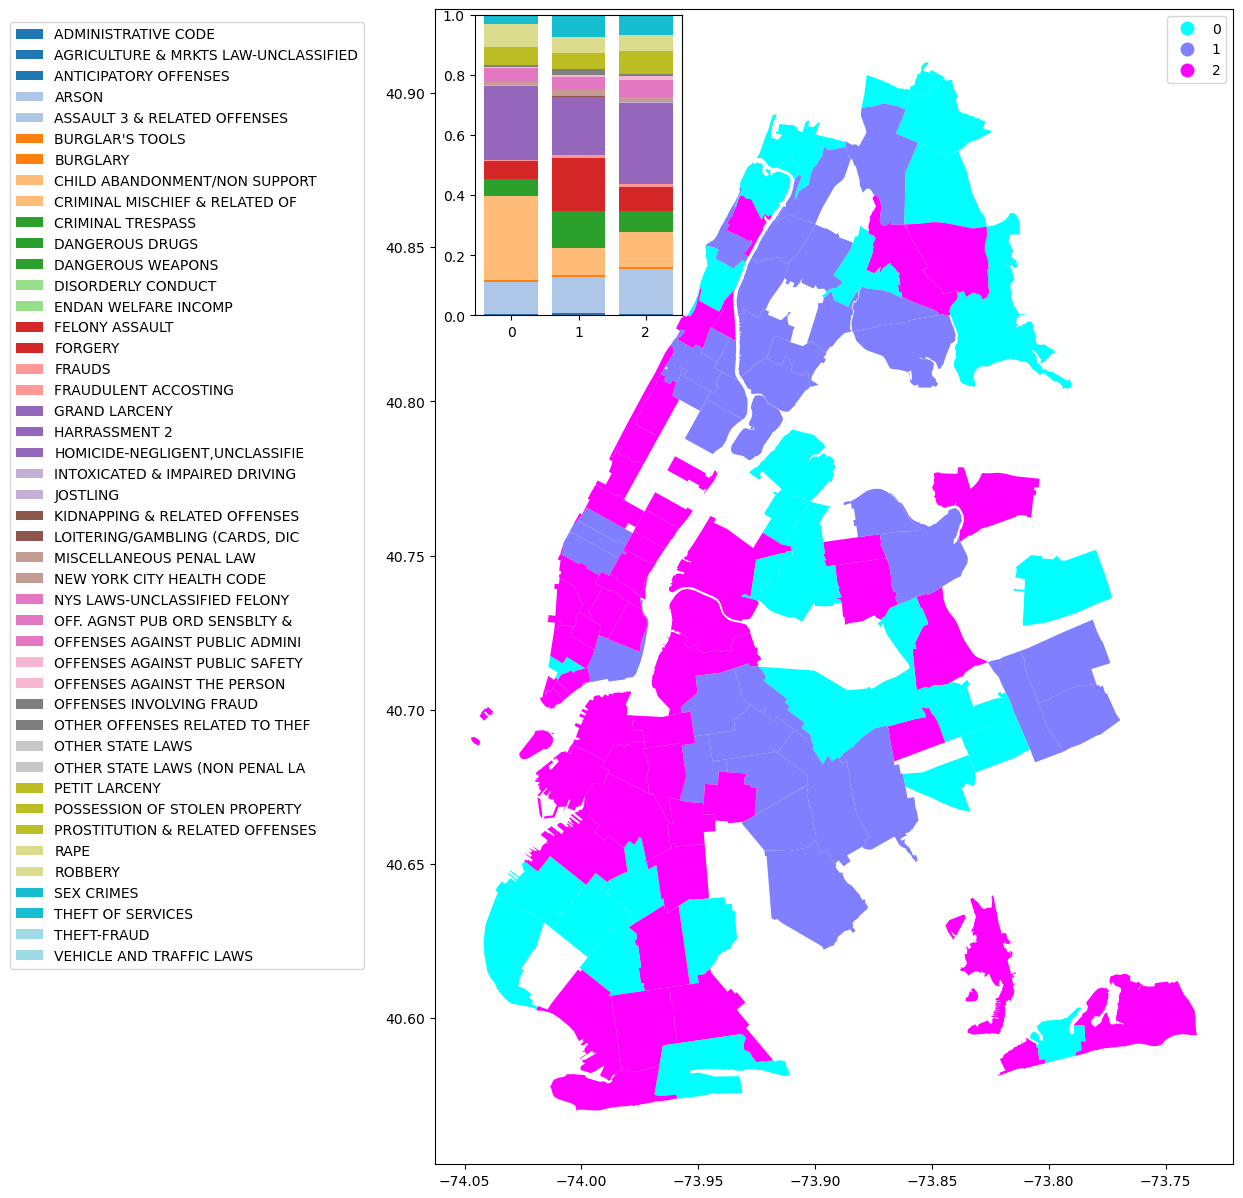

In [192]:
res['label'] = res['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(60,15))
NYCzip.merge(res,on='zipcode').plot(column='label',cmap='cool', 
                                    legend=True,ax=ax)
ins = ax.inset_axes([0.05,0.735,0.26,0.26])
NUM_COLORS = len(clusterChar.columns)
cm = plt.cm.get_cmap('tab20', NUM_COLORS)

ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(3)


for col in clusterChar.columns:
    if col!= 'label' and col!='ZIPCODE' and col!='zipcode':
        values = clusterChar[col].values
        ins.bar([0,1,2], values, bottom = bot, label=col)
        bot = bot + values
ins.set_xticks([0,1,2])    
ins.legend(bbox_to_anchor=(-0.5, 1))   

### Cluster for Total Crimes each Year (2018 to 2022)

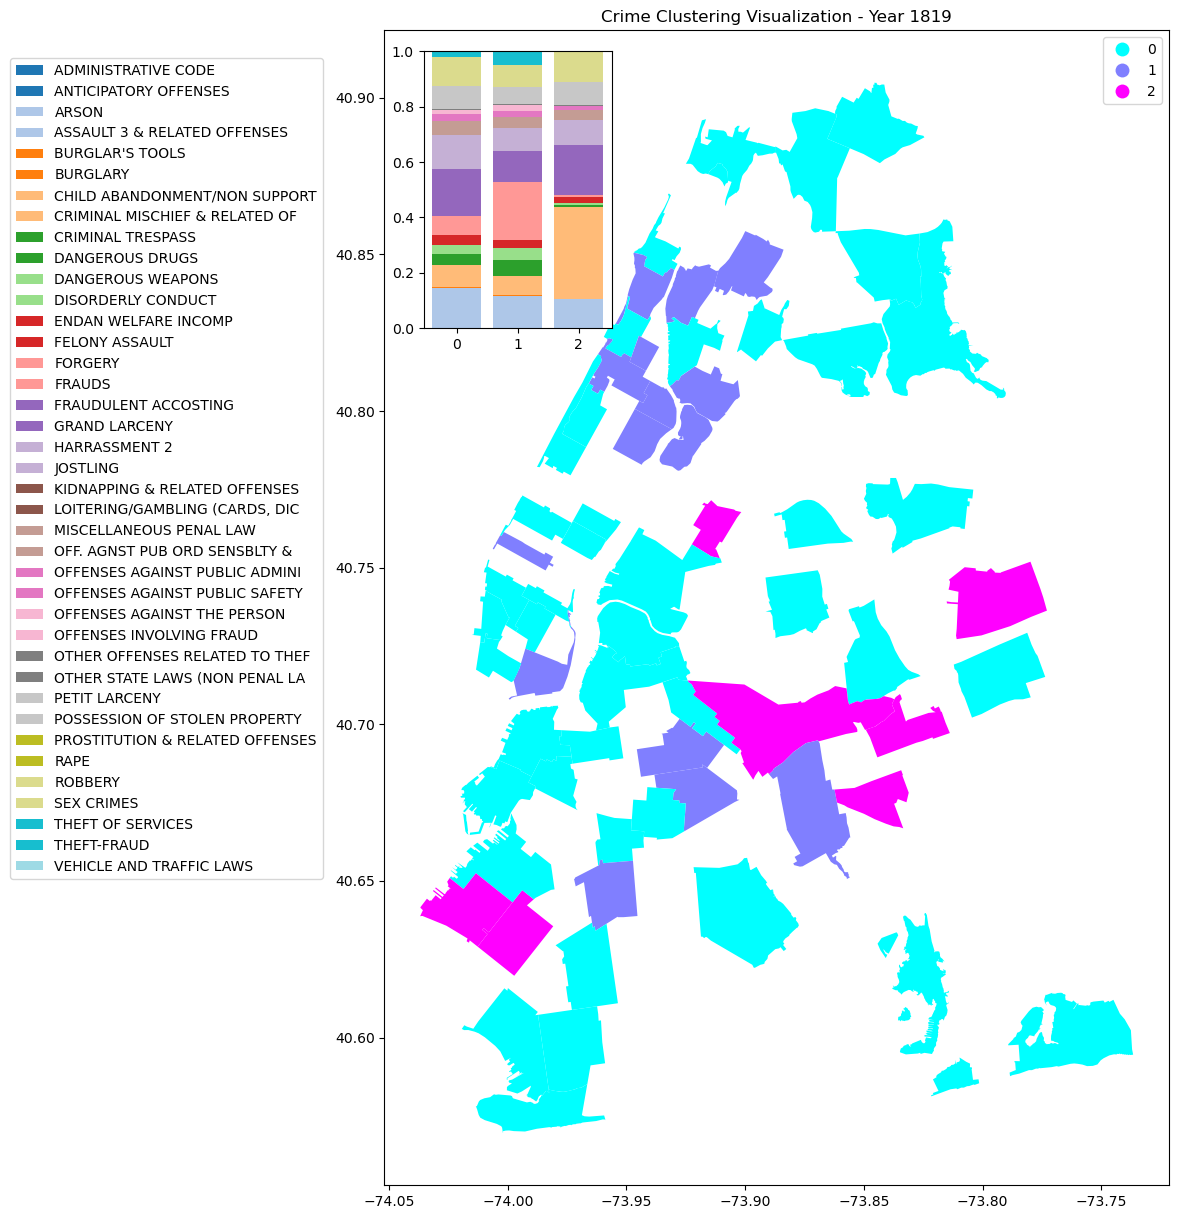

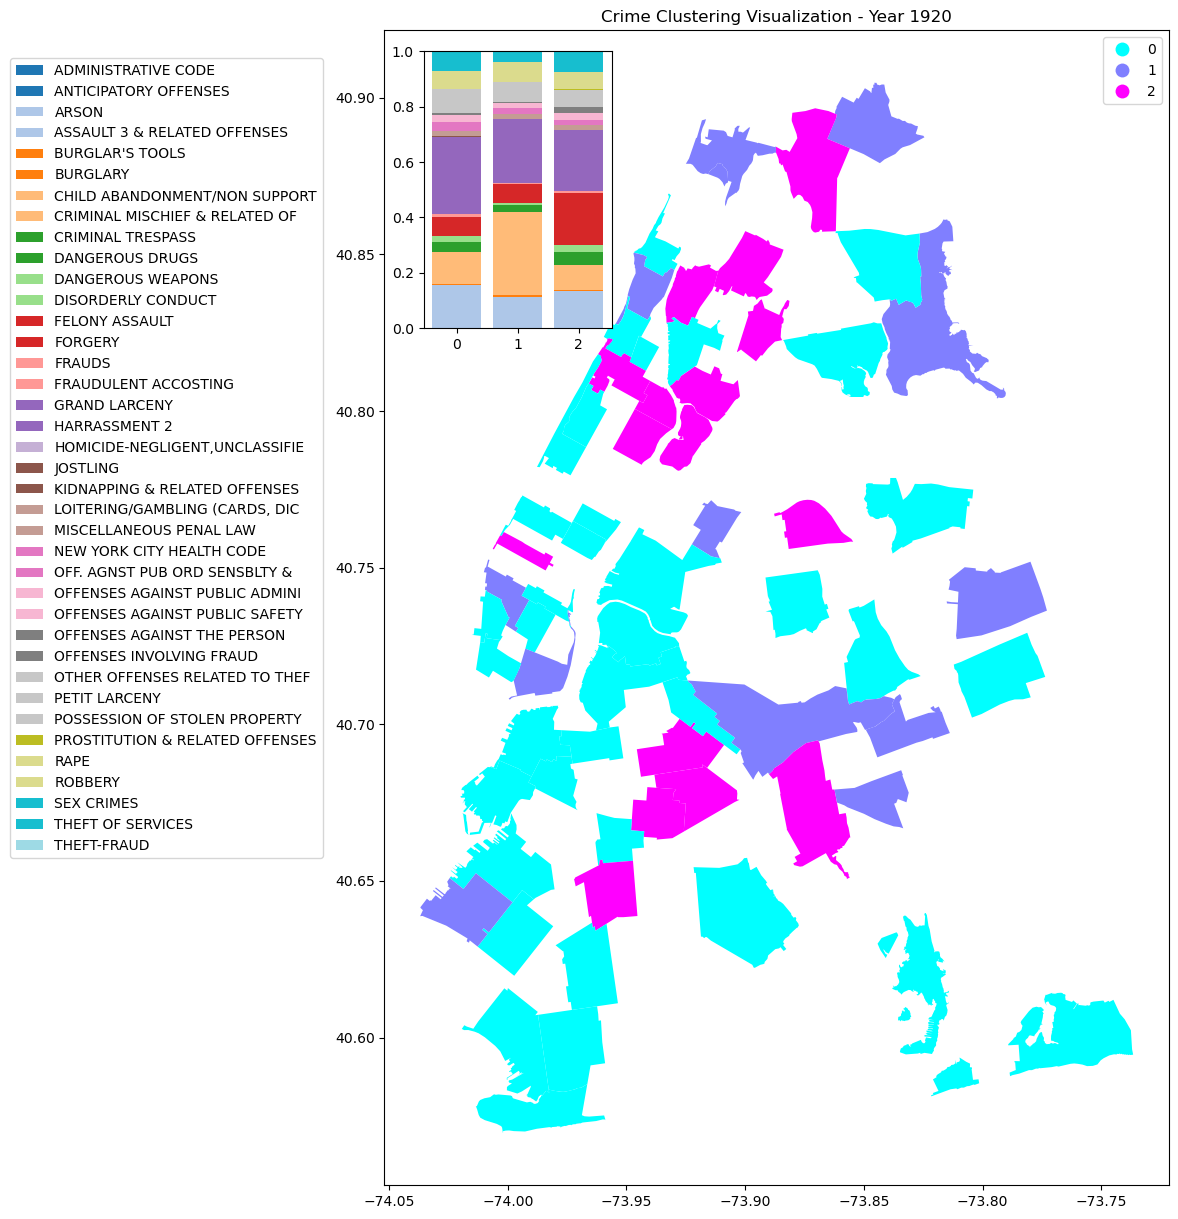

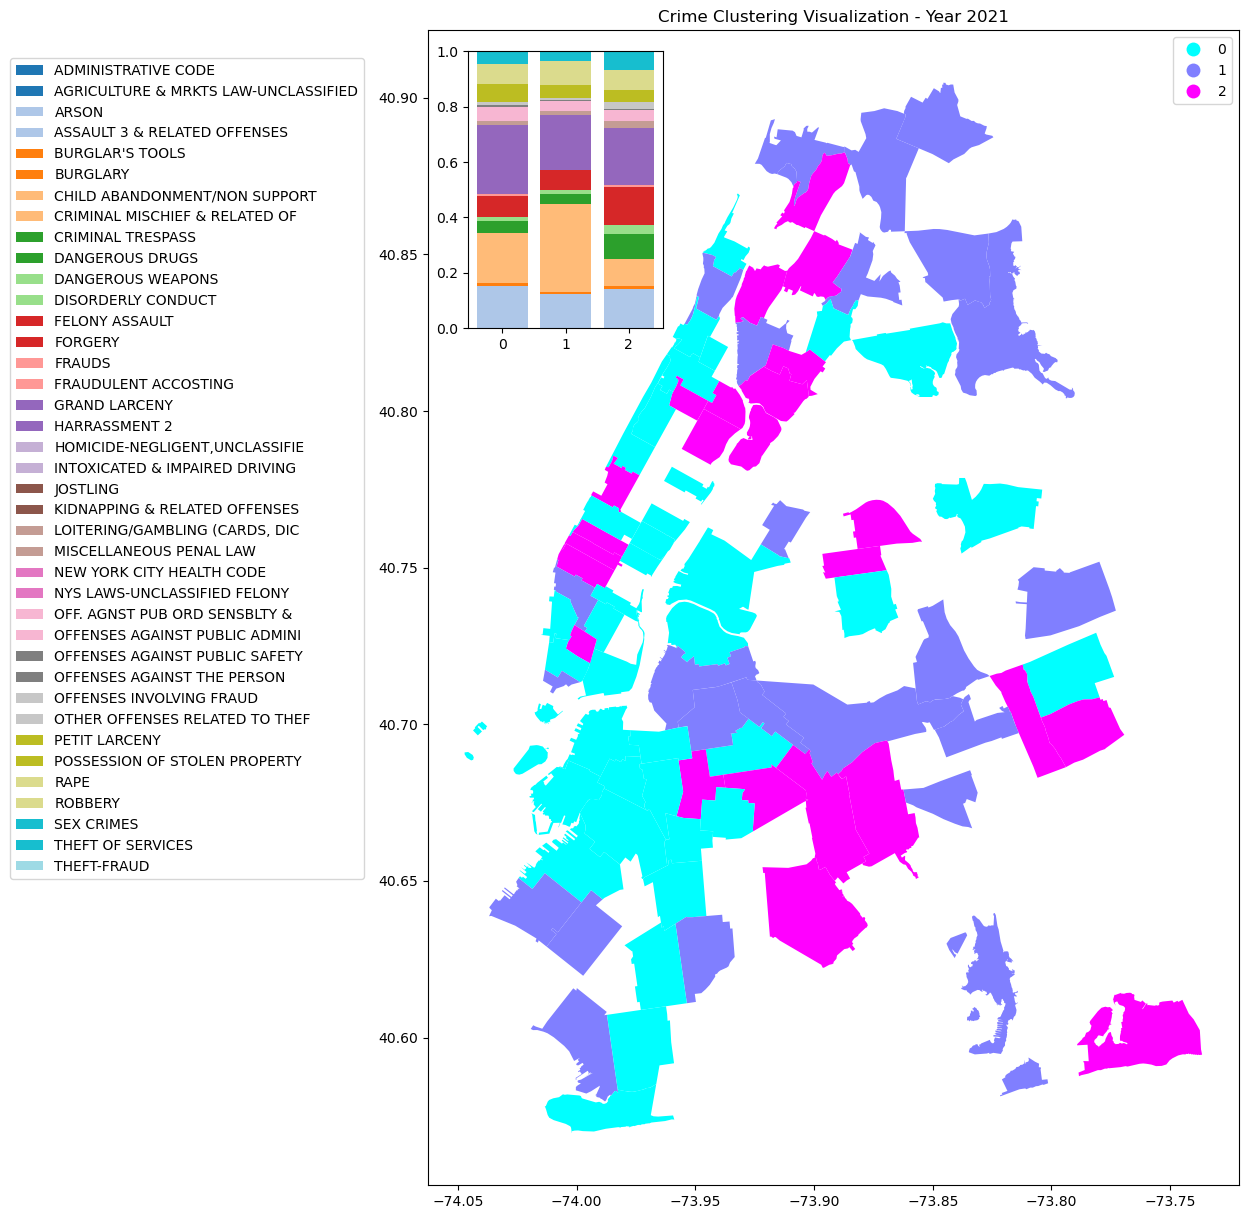

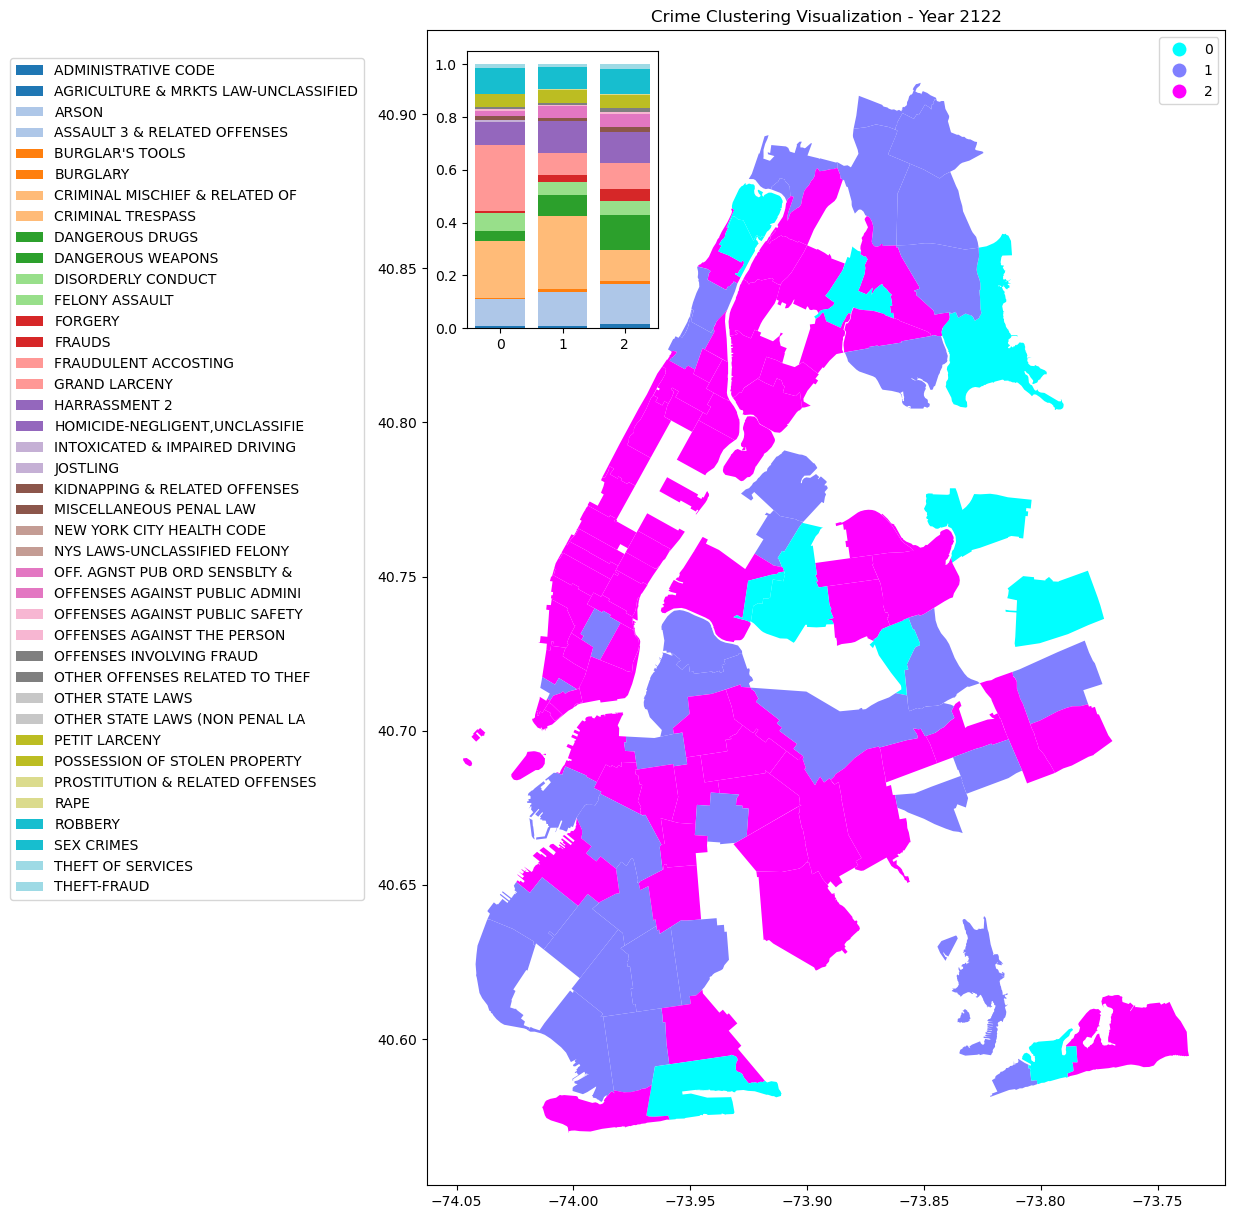

In [203]:
crime_data_years = [data_nyc_1819, data_nyc_1920, data_nyc_2021, data_nyc_2122]

for year, crime_data_year in zip(['1819', '1920', '2021', '2122'], crime_data_years):
    pivot_nyc = pd.pivot_table(crime_data_year,  # Fix variable name here
                             index='ZIPCODE', 
                             columns='OFNS_DESC', 
                             aggfunc='size', 
                             fill_value=0)
    
    TotalCrime = pivot_nyc.sum(axis=1)  # total crime activity per zip code
    pivot_nycNormalized = pivot_nyc.div(pivot_nyc.sum(axis=1), axis=0)  # normalize activity within zip code by total
    pivot_nycNormalized = pivot_nycNormalized.loc[TotalCrime > 10]
    pivot_nycNormalized
    rr = GaussianMixture(n_components = 3, random_state = 0).fit(pivot_nycNormalized)
    rr.labels_ = rr.predict(pivot_nycNormalized)
    clust={pivot_nycNormalized.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}
    res=pd.DataFrame({'zipcode':pivot_nycNormalized.index, 'label':rr.labels_})
    clusterChar = pivot_nyc.reset_index().merge(res,left_on='ZIPCODE',right_on='zipcode').\
                groupby(['label']).sum().reset_index()
    clusterChar = clusterChar[[col for col in clusterChar.columns if col not in ['label','ZIPCODE','zipcode']]]
    clusterChar = clusterChar.div(clusterChar.sum(axis=1), axis=0)
    clusterChar['label'] = [0,1,2]
    res['label'] = res['label'].astype(str)
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(60,15))
    NYCzip.merge(res,on='zipcode').plot(column='label',cmap='cool', 
                                        legend=True,ax=ax)
    ins = ax.inset_axes([0.05,0.742,0.24,0.24])
    NUM_COLORS = len(clusterChar.columns)
    cm = plt.cm.get_cmap('tab20', NUM_COLORS)
    ax.set_title(f"Crime Clustering Visualization - Year {year}")
    
    ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    bot = np.zeros(3)


    for col in clusterChar.columns:
        if col!= 'label' and col!='ZIPCODE' and col!='zipcode':
            values = clusterChar[col].values
            ins.bar([0,1,2], values, bottom = bot, label=col)
            bot = bot + values
    ins.set_xticks([0,1,2])    
    ins.legend(bbox_to_anchor=(-0.5, 1))   